# create machine learning model

In [5]:
import pickle as pkl
import tensorflow as tf
speed_limit = pkl.load(open("speed_limit_ml_data_set.pkl", "rb"))
X = speed_limit['data']
y = speed_limit['target']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
def build_model(n_hidden=1, n_neurons=25, optimizer="sgd", learning_rate=0.00001, momentum=0): 
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]))
    
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    
    model.add(tf.keras.layers.Dense(1))
    opt = None
    
    #optimizers
    if optimizer == "sgd":
        opt = tf.keras.optimizers.get("sgd")
        opt.learning_rate = learning_rate
    elif optimizer == "nesterov":
        opt = tf.keras.optimizers.get("sgd")
        opt.learning_rate = learning_rate
        opt.nesterov = True
    elif optimizer == "momentum":
        opt = tf.keras.optimizers.get("sgd")
        opt.learning_rate = learning_rate
        opt.momentum = momentum
    elif optimizer == "adam":
        opt = tf.keras.optimizers.get("adam")
        opt.learning_rate = learning_rate
    
    model.compile(loss="mean_squared_error",
              optimizer=opt,
              metrics=["mean_absolute_error"])

    return model

In [8]:
import scikeras
from scikeras.wrappers import KerasRegressor

param_distribs = {
"model__n_hidden": [0,1,2,3],
"model__n_neurons": [5,25,125],
"model__learning_rate": [0.000001,0.00001,0.0001],
"model__optimizer": ['sgd', 'nesterov', 'momentum', 'adam'],
"model__momentum": [0.1,0.5,0.9]
}

#es = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=1.0, verbose=1)

keras_reg = KerasRegressor(build_model)



from sklearn.model_selection import RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(keras_reg,
param_distribs,
n_iter=30,
cv=3,
verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_split=0.1)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Epoch 1/100
9/9 [==============================] - 3s 25ms/step - loss: 2423.4329 - mean_absolute_error: 42.8516 - val_loss: 2399.0469 - val_mean_absolute_error: 41.6157
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1893.5574 - mean_absolute_error: 36.8021 - val_loss: 1755.6125 - val_mean_absolute_error: 34.6165
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 1372.9563 - mean_absolute_error: 30.5187 - val_loss: 1445.2206 - val_mean_absolute_error: 30.9249
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 1075.5854 - mean_absolute_error: 27.0179 - val_loss: 1310.6919 - val_mean_absolute_error: 29.3226
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 908.4580 - mean_absolute_error: 25.0074 - val_loss: 1253.6393 - val_mean_absolute_error: 28.7668
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 801.0149 - mean_absolut

9/9 [==============================] - 0s 9ms/step - loss: 605.3265 - mean_absolute_error: 20.4418 - val_loss: 747.7642 - val_mean_absolute_error: 23.3563
Epoch 50/100
9/9 [==============================] - 0s 8ms/step - loss: 604.8694 - mean_absolute_error: 20.4523 - val_loss: 745.1032 - val_mean_absolute_error: 23.3072
Epoch 51/100
9/9 [==============================] - 0s 6ms/step - loss: 604.7534 - mean_absolute_error: 20.4448 - val_loss: 745.4044 - val_mean_absolute_error: 23.3106
Epoch 52/100
9/9 [==============================] - 0s 6ms/step - loss: 605.5067 - mean_absolute_error: 20.4500 - val_loss: 742.2009 - val_mean_absolute_error: 23.2668
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 604.9694 - mean_absolute_error: 20.4480 - val_loss: 741.0038 - val_mean_absolute_error: 23.2490
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: 604.2798 - mean_absolute_error: 20.4355 - val_loss: 738.5788 - val_mean_absolute_error: 23.2113
Epoch

Epoch 98/100
9/9 [==============================] - 0s 6ms/step - loss: 602.5083 - mean_absolute_error: 20.3506 - val_loss: 707.9872 - val_mean_absolute_error: 22.6024
Epoch 99/100
9/9 [==============================] - 0s 8ms/step - loss: 602.2731 - mean_absolute_error: 20.3460 - val_loss: 706.5739 - val_mean_absolute_error: 22.5522
Epoch 100/100
5/5 [==============================] - 0s 3ms/step
[CV] END model__learning_rate=1e-06, model__momentum=0.1, model__n_hidden=2, model__n_neurons=5, model__optimizer=sgd; total time=  13.3s
Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 1037.5094 - mean_absolute_error: 26.4142 - val_loss: 1094.9414 - val_mean_absolute_error: 27.1193
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 752.2715 - mean_absolute_error: 22.6743 - val_loss: 1039.1281 - val_mean_absolute_error: 27.0801
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 680.7440 - mean_absolute_error: 21.6914 - val_loss: 

9/9 [==============================] - 0s 7ms/step - loss: 579.0545 - mean_absolute_error: 20.1367 - val_loss: 759.9418 - val_mean_absolute_error: 23.7920
Epoch 46/100
9/9 [==============================] - 0s 7ms/step - loss: 579.2319 - mean_absolute_error: 20.1950 - val_loss: 765.4371 - val_mean_absolute_error: 23.8161
Epoch 47/100
9/9 [==============================] - 0s 6ms/step - loss: 578.0980 - mean_absolute_error: 20.1550 - val_loss: 762.3488 - val_mean_absolute_error: 23.8013
Epoch 48/100
9/9 [==============================] - 0s 6ms/step - loss: 578.3138 - mean_absolute_error: 20.1586 - val_loss: 768.1752 - val_mean_absolute_error: 23.8255
Epoch 49/100
9/9 [==============================] - 0s 6ms/step - loss: 579.3458 - mean_absolute_error: 20.1883 - val_loss: 762.9982 - val_mean_absolute_error: 23.7920
Epoch 50/100
9/9 [==============================] - 0s 6ms/step - loss: 579.3091 - mean_absolute_error: 20.1585 - val_loss: 752.6431 - val_mean_absolute_error: 23.7088
Epoch

Epoch 94/100
9/9 [==============================] - 0s 7ms/step - loss: 575.6710 - mean_absolute_error: 20.1474 - val_loss: 727.4284 - val_mean_absolute_error: 23.4107
Epoch 95/100
9/9 [==============================] - 0s 6ms/step - loss: 574.7890 - mean_absolute_error: 20.1626 - val_loss: 732.3607 - val_mean_absolute_error: 23.4174
Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 575.3763 - mean_absolute_error: 20.1534 - val_loss: 739.6698 - val_mean_absolute_error: 23.4493
Epoch 97/100
9/9 [==============================] - 0s 6ms/step - loss: 576.2179 - mean_absolute_error: 20.1668 - val_loss: 738.6872 - val_mean_absolute_error: 23.4118
Epoch 98/100
9/9 [==============================] - 0s 7ms/step - loss: 575.2690 - mean_absolute_error: 20.1263 - val_loss: 740.1321 - val_mean_absolute_error: 23.3972
Epoch 99/100
9/9 [==============================] - 0s 7ms/step - loss: 574.9967 - mean_absolute_error: 20.0781 - val_loss: 723.3195 - val_mean_absolute_error: 

Epoch 42/100
9/9 [==============================] - 0s 7ms/step - loss: 601.9307 - mean_absolute_error: 20.3738 - val_loss: 631.9794 - val_mean_absolute_error: 20.4038
Epoch 43/100
9/9 [==============================] - 0s 7ms/step - loss: 600.7018 - mean_absolute_error: 20.3409 - val_loss: 630.2066 - val_mean_absolute_error: 20.3805
Epoch 44/100
9/9 [==============================] - 0s 7ms/step - loss: 600.9263 - mean_absolute_error: 20.3648 - val_loss: 629.1432 - val_mean_absolute_error: 20.3535
Epoch 45/100
9/9 [==============================] - 0s 7ms/step - loss: 599.3565 - mean_absolute_error: 20.3405 - val_loss: 630.2488 - val_mean_absolute_error: 20.3176
Epoch 46/100
9/9 [==============================] - 0s 7ms/step - loss: 598.6430 - mean_absolute_error: 20.3130 - val_loss: 629.2507 - val_mean_absolute_error: 20.3015
Epoch 47/100
9/9 [==============================] - 0s 7ms/step - loss: 598.1303 - mean_absolute_error: 20.3176 - val_loss: 627.1425 - val_mean_absolute_error: 

Epoch 91/100
9/9 [==============================] - 0s 5ms/step - loss: 588.0535 - mean_absolute_error: 20.2522 - val_loss: 598.9451 - val_mean_absolute_error: 19.7980
Epoch 92/100
9/9 [==============================] - 0s 6ms/step - loss: 588.2858 - mean_absolute_error: 20.2707 - val_loss: 598.5357 - val_mean_absolute_error: 19.7884
Epoch 93/100
9/9 [==============================] - 0s 6ms/step - loss: 587.8950 - mean_absolute_error: 20.2571 - val_loss: 598.4127 - val_mean_absolute_error: 19.7828
Epoch 94/100
9/9 [==============================] - 0s 6ms/step - loss: 587.7991 - mean_absolute_error: 20.2607 - val_loss: 596.5325 - val_mean_absolute_error: 19.7907
Epoch 95/100
9/9 [==============================] - 0s 6ms/step - loss: 588.2185 - mean_absolute_error: 20.2782 - val_loss: 597.5280 - val_mean_absolute_error: 19.7830
Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 587.5414 - mean_absolute_error: 20.2637 - val_loss: 597.3664 - val_mean_absolute_error: 

Epoch 39/100
9/9 [==============================] - 0s 5ms/step - loss: 601.9886 - mean_absolute_error: 20.3607 - val_loss: 738.1472 - val_mean_absolute_error: 23.6184
Epoch 40/100
9/9 [==============================] - 0s 7ms/step - loss: 609.3990 - mean_absolute_error: 20.5016 - val_loss: 647.4667 - val_mean_absolute_error: 20.6413
Epoch 41/100
9/9 [==============================] - 0s 7ms/step - loss: 612.4192 - mean_absolute_error: 20.4085 - val_loss: 638.0867 - val_mean_absolute_error: 20.6904
Epoch 42/100
9/9 [==============================] - 0s 8ms/step - loss: 608.0825 - mean_absolute_error: 20.4362 - val_loss: 663.6837 - val_mean_absolute_error: 21.7989
Epoch 43/100
9/9 [==============================] - 0s 7ms/step - loss: 605.0850 - mean_absolute_error: 20.4203 - val_loss: 658.1398 - val_mean_absolute_error: 21.6403
Epoch 44/100
9/9 [==============================] - 0s 7ms/step - loss: 605.7576 - mean_absolute_error: 20.3747 - val_loss: 668.3525 - val_mean_absolute_error: 

Epoch 88/100
9/9 [==============================] - 0s 6ms/step - loss: 602.1957 - mean_absolute_error: 20.3407 - val_loss: 766.6129 - val_mean_absolute_error: 24.1549
Epoch 89/100
9/9 [==============================] - 0s 6ms/step - loss: 610.1502 - mean_absolute_error: 20.4250 - val_loss: 737.4127 - val_mean_absolute_error: 23.6126
Epoch 90/100
9/9 [==============================] - 0s 5ms/step - loss: 603.3602 - mean_absolute_error: 20.3624 - val_loss: 783.2227 - val_mean_absolute_error: 24.4185
Epoch 91/100
9/9 [==============================] - 0s 6ms/step - loss: 601.2213 - mean_absolute_error: 20.3544 - val_loss: 641.3619 - val_mean_absolute_error: 20.6121
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 609.3178 - mean_absolute_error: 20.3478 - val_loss: 650.6401 - val_mean_absolute_error: 21.1705
Epoch 93/100
9/9 [==============================] - 0s 7ms/step - loss: 605.5793 - mean_absolute_error: 20.3006 - val_loss: 669.0164 - val_mean_absolute_error: 

Epoch 36/100
9/9 [==============================] - 0s 6ms/step - loss: 578.8640 - mean_absolute_error: 20.1781 - val_loss: 696.9723 - val_mean_absolute_error: 22.1965
Epoch 37/100
9/9 [==============================] - 0s 6ms/step - loss: 581.0013 - mean_absolute_error: 20.0762 - val_loss: 695.0995 - val_mean_absolute_error: 21.9316
Epoch 38/100
9/9 [==============================] - 0s 6ms/step - loss: 602.4573 - mean_absolute_error: 20.5014 - val_loss: 826.4449 - val_mean_absolute_error: 24.0212
Epoch 39/100
9/9 [==============================] - 0s 6ms/step - loss: 582.1725 - mean_absolute_error: 20.3125 - val_loss: 728.1283 - val_mean_absolute_error: 22.6766
Epoch 40/100
9/9 [==============================] - 0s 6ms/step - loss: 575.5773 - mean_absolute_error: 20.0977 - val_loss: 921.6430 - val_mean_absolute_error: 25.3775
Epoch 41/100
9/9 [==============================] - 0s 7ms/step - loss: 590.7762 - mean_absolute_error: 20.3659 - val_loss: 689.3213 - val_mean_absolute_error: 

Epoch 85/100
9/9 [==============================] - 0s 6ms/step - loss: 582.1611 - mean_absolute_error: 20.2443 - val_loss: 697.7867 - val_mean_absolute_error: 22.1695
Epoch 86/100
9/9 [==============================] - 0s 8ms/step - loss: 586.6920 - mean_absolute_error: 20.3807 - val_loss: 751.7991 - val_mean_absolute_error: 22.8655
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 570.0031 - mean_absolute_error: 20.0655 - val_loss: 705.2645 - val_mean_absolute_error: 22.1394
Epoch 88/100
9/9 [==============================] - 0s 6ms/step - loss: 599.4570 - mean_absolute_error: 20.4735 - val_loss: 714.7130 - val_mean_absolute_error: 22.3857
Epoch 89/100
9/9 [==============================] - 0s 6ms/step - loss: 587.6277 - mean_absolute_error: 20.2946 - val_loss: 776.1651 - val_mean_absolute_error: 23.3570
Epoch 90/100
9/9 [==============================] - 0s 6ms/step - loss: 586.3238 - mean_absolute_error: 20.3434 - val_loss: 820.5980 - val_mean_absolute_error: 

Epoch 33/100
9/9 [==============================] - 0s 7ms/step - loss: 607.9534 - mean_absolute_error: 20.5189 - val_loss: 595.6268 - val_mean_absolute_error: 20.1590
Epoch 34/100
9/9 [==============================] - 0s 6ms/step - loss: 602.8661 - mean_absolute_error: 20.5903 - val_loss: 606.0953 - val_mean_absolute_error: 19.8458
Epoch 35/100
9/9 [==============================] - 0s 6ms/step - loss: 612.9650 - mean_absolute_error: 20.7179 - val_loss: 680.9122 - val_mean_absolute_error: 20.9526
Epoch 36/100
9/9 [==============================] - 0s 6ms/step - loss: 591.4955 - mean_absolute_error: 20.1259 - val_loss: 608.9208 - val_mean_absolute_error: 20.0385
Epoch 37/100
9/9 [==============================] - 0s 7ms/step - loss: 587.6823 - mean_absolute_error: 20.1008 - val_loss: 601.6155 - val_mean_absolute_error: 20.0422
Epoch 38/100
9/9 [==============================] - 0s 6ms/step - loss: 589.5747 - mean_absolute_error: 20.2944 - val_loss: 601.0901 - val_mean_absolute_error: 

Epoch 82/100
9/9 [==============================] - 0s 6ms/step - loss: 588.6993 - mean_absolute_error: 20.2197 - val_loss: 600.2101 - val_mean_absolute_error: 19.7620
Epoch 83/100
9/9 [==============================] - 0s 6ms/step - loss: 587.9127 - mean_absolute_error: 20.2643 - val_loss: 596.0639 - val_mean_absolute_error: 20.0577
Epoch 84/100
9/9 [==============================] - 0s 6ms/step - loss: 591.2717 - mean_absolute_error: 20.4707 - val_loss: 627.7284 - val_mean_absolute_error: 20.1173
Epoch 85/100
9/9 [==============================] - 0s 7ms/step - loss: 585.9677 - mean_absolute_error: 20.0978 - val_loss: 589.4199 - val_mean_absolute_error: 19.9238
Epoch 86/100
9/9 [==============================] - 0s 6ms/step - loss: 598.3339 - mean_absolute_error: 20.4828 - val_loss: 633.1326 - val_mean_absolute_error: 20.1875
Epoch 87/100
9/9 [==============================] - 0s 7ms/step - loss: 596.9816 - mean_absolute_error: 20.3562 - val_loss: 614.4704 - val_mean_absolute_error: 

Epoch 30/100
9/9 [==============================] - 0s 7ms/step - loss: 601.1888 - mean_absolute_error: 20.3060 - val_loss: 722.6003 - val_mean_absolute_error: 23.0080
Epoch 31/100
9/9 [==============================] - 0s 6ms/step - loss: 632.8212 - mean_absolute_error: 20.9419 - val_loss: 748.3026 - val_mean_absolute_error: 23.5128
Epoch 32/100
9/9 [==============================] - 0s 7ms/step - loss: 627.2307 - mean_absolute_error: 20.7290 - val_loss: 662.8831 - val_mean_absolute_error: 21.0099
Epoch 33/100
9/9 [==============================] - 0s 8ms/step - loss: 622.1749 - mean_absolute_error: 20.7280 - val_loss: 674.3203 - val_mean_absolute_error: 21.2045
Epoch 34/100
9/9 [==============================] - 0s 7ms/step - loss: 604.3892 - mean_absolute_error: 20.4123 - val_loss: 631.6805 - val_mean_absolute_error: 20.5074
Epoch 35/100
9/9 [==============================] - 0s 6ms/step - loss: 614.1661 - mean_absolute_error: 20.4254 - val_loss: 910.2830 - val_mean_absolute_error: 

Epoch 79/100
9/9 [==============================] - 0s 7ms/step - loss: 616.2951 - mean_absolute_error: 20.5823 - val_loss: 640.4160 - val_mean_absolute_error: 20.6870
Epoch 80/100
9/9 [==============================] - 0s 6ms/step - loss: 610.0315 - mean_absolute_error: 20.2792 - val_loss: 656.5696 - val_mean_absolute_error: 20.8893
Epoch 81/100
9/9 [==============================] - 0s 6ms/step - loss: 598.3739 - mean_absolute_error: 20.3028 - val_loss: 654.6960 - val_mean_absolute_error: 21.1238
Epoch 82/100
9/9 [==============================] - 0s 6ms/step - loss: 605.3159 - mean_absolute_error: 20.4290 - val_loss: 729.2617 - val_mean_absolute_error: 23.1514
Epoch 83/100
9/9 [==============================] - 0s 7ms/step - loss: 620.0626 - mean_absolute_error: 20.5283 - val_loss: 711.3763 - val_mean_absolute_error: 22.7569
Epoch 84/100
9/9 [==============================] - 0s 6ms/step - loss: 605.3414 - mean_absolute_error: 20.4550 - val_loss: 652.1851 - val_mean_absolute_error: 

9/9 [==============================] - 0s 7ms/step - loss: 586.0090 - mean_absolute_error: 20.3470 - val_loss: 753.4685 - val_mean_absolute_error: 23.3911
Epoch 27/100
9/9 [==============================] - 0s 7ms/step - loss: 578.1229 - mean_absolute_error: 20.2187 - val_loss: 793.6707 - val_mean_absolute_error: 23.1738
Epoch 28/100
9/9 [==============================] - 0s 7ms/step - loss: 580.6622 - mean_absolute_error: 20.2024 - val_loss: 741.5361 - val_mean_absolute_error: 23.2110
Epoch 29/100
9/9 [==============================] - 0s 6ms/step - loss: 579.0728 - mean_absolute_error: 20.1085 - val_loss: 734.5374 - val_mean_absolute_error: 23.4262
Epoch 30/100
9/9 [==============================] - 0s 7ms/step - loss: 576.8324 - mean_absolute_error: 20.2523 - val_loss: 742.6848 - val_mean_absolute_error: 23.3918
Epoch 31/100
9/9 [==============================] - 0s 7ms/step - loss: 571.8329 - mean_absolute_error: 20.1419 - val_loss: 732.6334 - val_mean_absolute_error: 23.4342
Epoch

Epoch 75/100
9/9 [==============================] - 0s 7ms/step - loss: 576.6080 - mean_absolute_error: 20.2508 - val_loss: 801.7881 - val_mean_absolute_error: 23.5271
Epoch 76/100
9/9 [==============================] - 0s 8ms/step - loss: 588.1444 - mean_absolute_error: 20.2946 - val_loss: 763.8345 - val_mean_absolute_error: 23.2263
Epoch 77/100
9/9 [==============================] - 0s 9ms/step - loss: 584.1014 - mean_absolute_error: 20.2890 - val_loss: 736.9862 - val_mean_absolute_error: 23.3551
Epoch 78/100
9/9 [==============================] - 0s 7ms/step - loss: 578.5119 - mean_absolute_error: 20.2466 - val_loss: 722.9686 - val_mean_absolute_error: 23.2131
Epoch 79/100
9/9 [==============================] - 0s 7ms/step - loss: 573.9423 - mean_absolute_error: 20.1202 - val_loss: 731.5336 - val_mean_absolute_error: 23.1642
Epoch 80/100
9/9 [==============================] - 0s 6ms/step - loss: 576.5375 - mean_absolute_error: 20.1812 - val_loss: 726.6160 - val_mean_absolute_error: 

9/9 [==============================] - 0s 7ms/step - loss: 2903.9236 - mean_absolute_error: 48.0213 - val_loss: 2553.8130 - val_mean_absolute_error: 44.6658
Epoch 23/100
9/9 [==============================] - 0s 7ms/step - loss: 2903.0657 - mean_absolute_error: 48.0127 - val_loss: 2553.0557 - val_mean_absolute_error: 44.6573
Epoch 24/100
9/9 [==============================] - 0s 9ms/step - loss: 2902.2349 - mean_absolute_error: 48.0040 - val_loss: 2552.2751 - val_mean_absolute_error: 44.6486
Epoch 25/100
9/9 [==============================] - 0s 9ms/step - loss: 2901.3494 - mean_absolute_error: 47.9950 - val_loss: 2551.5193 - val_mean_absolute_error: 44.6401
Epoch 26/100
9/9 [==============================] - 0s 9ms/step - loss: 2900.5017 - mean_absolute_error: 47.9865 - val_loss: 2550.7454 - val_mean_absolute_error: 44.6314
Epoch 27/100
9/9 [==============================] - 0s 9ms/step - loss: 2899.6350 - mean_absolute_error: 47.9778 - val_loss: 2549.9709 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2863.8140 - mean_absolute_error: 47.6078 - val_loss: 2517.0833 - val_mean_absolute_error: 44.2527
Epoch 71/100
9/9 [==============================] - 0s 7ms/step - loss: 2862.9832 - mean_absolute_error: 47.5991 - val_loss: 2516.3328 - val_mean_absolute_error: 44.2443
Epoch 72/100
9/9 [==============================] - 0s 6ms/step - loss: 2862.1763 - mean_absolute_error: 47.5908 - val_loss: 2515.5854 - val_mean_absolute_error: 44.2358
Epoch 73/100
9/9 [==============================] - 0s 7ms/step - loss: 2861.3711 - mean_absolute_error: 47.5824 - val_loss: 2514.8181 - val_mean_absolute_error: 44.2271
Epoch 74/100
9/9 [==============================] - 0s 6ms/step - loss: 2860.5464 - mean_absolute_error: 47.5738 - val_loss: 2514.0522 - val_mean_absolute_error: 44.2185
Epoch 75/100
9/9 [==============================] - 0s 6ms/step - loss: 2859.7229 - mean_absolute_error: 47.5651 - val_loss: 2513.2969 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 17/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 18/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 19/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 20/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 21/100
9/9 [==============================] - 0s 5ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 22/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss

Epoch 71/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 72/100
9/9 [==============================] - 0s 5ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 73/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 74/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 75/100
9/9 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 76/100
9/9 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 77/100
9/9 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: n

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1100, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1697, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_regression.py", lin

9/9 [==============================] - 1s 28ms/step - loss: 2478437826560.0000 - mean_absolute_error: 587904.0000 - val_loss: 1003824454041600.0000 - val_mean_absolute_error: 28198020.0000
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 134195298327831230021632.0000 - mean_absolute_error: 135916544000.0000 - val_loss: 35680278071493355013931008.0000 - val_mean_absolute_error: 5621708488704.0000
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 5210824488132792272414774071918592.0000 - mean_absolute_error: 24410257648254976.0000 - val_loss: 2585964441257830276310974025233858560.0000 - val_mean_absolute_error: 1432290229355544576.0000
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: inf - mean_absolute_error: 5595292443243427397632.0000 - val_loss: inf - val_mean_absolute_error: 471570872146851086204928.0000
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: inf - mean_absolute_error: 20074468537638897

Epoch 53/100
9/9 [==============================] - 0s 10ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 54/100
9/9 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 55/100
9/9 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 56/100
9/9 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 57/100
9/9 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 58/100
9/9 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 59/100
9/9 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: 

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1100, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1697, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_regression.py", lin

9/9 [==============================] - 0s 19ms/step - loss: 478446.8750 - mean_absolute_error: 231.9451 - val_loss: 196599632.0000 - val_mean_absolute_error: 13591.1309
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 54520856021303296.0000 - mean_absolute_error: 84623328.0000 - val_loss: 12992035002475610112.0000 - val_mean_absolute_error: 3551610112.0000
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 2668553811663462791928348672.0000 - mean_absolute_error: 18081780858880.0000 - val_loss: 617145259454777443581828268032.0000 - val_mean_absolute_error: 776944618569728.0000
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: inf - mean_absolute_error: 4513724205316964352.0000 - val_loss: inf - val_mean_absolute_error: 210275511915788632064.0000
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: inf - mean_absolute_error: 1200397587187458289696768.0000 - val_loss: inf - val_mean_absolute_error: 5582220413

Epoch 53/100
9/9 [==============================] - 0s 5ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 56/100
9/9 [==============================] - 0s 5ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 58/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 59/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: n

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1100, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1697, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_regression.py", lin

9/9 [==============================] - 0s 21ms/step - loss: 686.2504 - mean_absolute_error: 21.6897 - val_loss: 734.7406 - val_mean_absolute_error: 23.0919
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 643.0486 - mean_absolute_error: 21.0869 - val_loss: 620.4523 - val_mean_absolute_error: 21.0357
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 626.0355 - mean_absolute_error: 20.8424 - val_loss: 663.5480 - val_mean_absolute_error: 21.6430
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 607.2389 - mean_absolute_error: 20.3373 - val_loss: 641.2551 - val_mean_absolute_error: 20.9569
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 613.6074 - mean_absolute_error: 20.3818 - val_loss: 651.6119 - val_mean_absolute_error: 21.0508
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 597.2790 - mean_absolute_error: 20.2169 - val_loss: 652.8867 - val_mean_absolute_error: 20.9184
Epoch 7/1

Epoch 50/100
9/9 [==============================] - 0s 7ms/step - loss: 638.8997 - mean_absolute_error: 21.0359 - val_loss: 779.0118 - val_mean_absolute_error: 23.8143
Epoch 51/100
9/9 [==============================] - 0s 6ms/step - loss: 613.4897 - mean_absolute_error: 20.7085 - val_loss: 888.1204 - val_mean_absolute_error: 25.2360
Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 606.1464 - mean_absolute_error: 20.4711 - val_loss: 848.8817 - val_mean_absolute_error: 24.8196
Epoch 53/100
9/9 [==============================] - 0s 6ms/step - loss: 620.6338 - mean_absolute_error: 20.5843 - val_loss: 710.1630 - val_mean_absolute_error: 22.2704
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: 619.8903 - mean_absolute_error: 20.6328 - val_loss: 682.2265 - val_mean_absolute_error: 21.1296
Epoch 55/100
9/9 [==============================] - 0s 7ms/step - loss: 629.1497 - mean_absolute_error: 20.6511 - val_loss: 656.8581 - val_mean_absolute_error: 

Epoch 99/100
9/9 [==============================] - 0s 7ms/step - loss: 599.2269 - mean_absolute_error: 20.3614 - val_loss: 727.7293 - val_mean_absolute_error: 22.8448
Epoch 100/100
5/5 [==============================] - 0s 2ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.1, model__n_hidden=1, model__n_neurons=5, model__optimizer=sgd; total time=   6.5s
Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 2963.8394 - mean_absolute_error: 48.8886 - val_loss: 3532.9431 - val_mean_absolute_error: 53.0189
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 2894.1858 - mean_absolute_error: 48.1635 - val_loss: 3510.1208 - val_mean_absolute_error: 52.7251
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 2869.8462 - mean_absolute_error: 47.9139 - val_loss: 3503.2400 - val_mean_absolute_error: 52.6294
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 2865.0403 - mean_absolute_error: 47.8628 - val_los

9/9 [==============================] - 0s 7ms/step - loss: 2830.2537 - mean_absolute_error: 47.5006 - val_loss: 3464.5188 - val_mean_absolute_error: 52.2571
Epoch 47/100
9/9 [==============================] - 0s 6ms/step - loss: 2829.4385 - mean_absolute_error: 47.4919 - val_loss: 3463.6145 - val_mean_absolute_error: 52.2485
Epoch 48/100
9/9 [==============================] - 0s 7ms/step - loss: 2828.6167 - mean_absolute_error: 47.4834 - val_loss: 3462.7234 - val_mean_absolute_error: 52.2399
Epoch 49/100
9/9 [==============================] - 0s 7ms/step - loss: 2827.8062 - mean_absolute_error: 47.4749 - val_loss: 3461.8110 - val_mean_absolute_error: 52.2312
Epoch 50/100
9/9 [==============================] - 0s 6ms/step - loss: 2826.9771 - mean_absolute_error: 47.4663 - val_loss: 3460.8918 - val_mean_absolute_error: 52.2224
Epoch 51/100
9/9 [==============================] - 0s 5ms/step - loss: 2826.1414 - mean_absolute_error: 47.4575 - val_loss: 3459.9851 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 6ms/step - loss: 2791.4775 - mean_absolute_error: 47.0933 - val_loss: 3421.8540 - val_mean_absolute_error: 51.8473
Epoch 95/100
9/9 [==============================] - 0s 6ms/step - loss: 2790.6765 - mean_absolute_error: 47.0851 - val_loss: 3420.9709 - val_mean_absolute_error: 51.8388
Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 2789.8743 - mean_absolute_error: 47.0765 - val_loss: 3420.0754 - val_mean_absolute_error: 51.8301
Epoch 97/100
9/9 [==============================] - 0s 6ms/step - loss: 2789.0623 - mean_absolute_error: 47.0678 - val_loss: 3419.2002 - val_mean_absolute_error: 51.8217
Epoch 98/100
9/9 [==============================] - 0s 6ms/step - loss: 2788.2671 - mean_absolute_error: 47.0596 - val_loss: 3418.3337 - val_mean_absolute_error: 51.8133
Epoch 99/100
9/9 [==============================] - 0s 7ms/step - loss: 2787.4810 - mean_absolute_error: 47.0513 - val_loss: 3417.4595 - val_mean_absolute_error: 5

Epoch 42/100
9/9 [==============================] - 0s 6ms/step - loss: 598.3143 - mean_absolute_error: 20.5027 - val_loss: 646.7577 - val_mean_absolute_error: 20.3844
Epoch 43/100
9/9 [==============================] - 0s 6ms/step - loss: 602.5939 - mean_absolute_error: 20.5083 - val_loss: 594.6096 - val_mean_absolute_error: 19.6954
Epoch 44/100
9/9 [==============================] - 0s 7ms/step - loss: 601.4055 - mean_absolute_error: 20.4567 - val_loss: 657.1186 - val_mean_absolute_error: 20.5149
Epoch 45/100
9/9 [==============================] - 0s 6ms/step - loss: 586.2702 - mean_absolute_error: 20.2794 - val_loss: 592.2603 - val_mean_absolute_error: 20.1705
Epoch 46/100
9/9 [==============================] - 0s 7ms/step - loss: 613.8215 - mean_absolute_error: 20.6440 - val_loss: 619.0938 - val_mean_absolute_error: 19.9648
Epoch 47/100
9/9 [==============================] - 0s 7ms/step - loss: 591.1353 - mean_absolute_error: 20.3399 - val_loss: 591.7916 - val_mean_absolute_error: 

Epoch 91/100
9/9 [==============================] - 0s 7ms/step - loss: 618.8383 - mean_absolute_error: 20.9016 - val_loss: 587.5184 - val_mean_absolute_error: 19.7074
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 599.8683 - mean_absolute_error: 20.6152 - val_loss: 586.5170 - val_mean_absolute_error: 19.5795
Epoch 93/100
9/9 [==============================] - 0s 6ms/step - loss: 590.9438 - mean_absolute_error: 20.2014 - val_loss: 737.8636 - val_mean_absolute_error: 22.1551
Epoch 94/100
9/9 [==============================] - 0s 6ms/step - loss: 602.8809 - mean_absolute_error: 20.3857 - val_loss: 589.7170 - val_mean_absolute_error: 19.6117
Epoch 95/100
9/9 [==============================] - 0s 6ms/step - loss: 585.5168 - mean_absolute_error: 20.2624 - val_loss: 591.1981 - val_mean_absolute_error: 20.2284
Epoch 96/100
9/9 [==============================] - 0s 7ms/step - loss: 598.4199 - mean_absolute_error: 20.4856 - val_loss: 594.3358 - val_mean_absolute_error: 

Epoch 39/100
9/9 [==============================] - 0s 7ms/step - loss: 600.5700 - mean_absolute_error: 20.3401 - val_loss: 689.3630 - val_mean_absolute_error: 21.4246
Epoch 40/100
9/9 [==============================] - 0s 5ms/step - loss: 602.9088 - mean_absolute_error: 20.3982 - val_loss: 868.0112 - val_mean_absolute_error: 24.7599
Epoch 41/100
9/9 [==============================] - 0s 7ms/step - loss: 611.4133 - mean_absolute_error: 20.4907 - val_loss: 752.3603 - val_mean_absolute_error: 22.6435
Epoch 42/100
9/9 [==============================] - 0s 6ms/step - loss: 608.2966 - mean_absolute_error: 20.3742 - val_loss: 775.1871 - val_mean_absolute_error: 23.1725
Epoch 43/100
9/9 [==============================] - 0s 6ms/step - loss: 604.9886 - mean_absolute_error: 20.3931 - val_loss: 859.4899 - val_mean_absolute_error: 24.8203
Epoch 44/100
9/9 [==============================] - 0s 5ms/step - loss: 613.1458 - mean_absolute_error: 20.6966 - val_loss: 771.6203 - val_mean_absolute_error: 

Epoch 88/100
9/9 [==============================] - 0s 8ms/step - loss: 603.5564 - mean_absolute_error: 20.3115 - val_loss: 861.1754 - val_mean_absolute_error: 24.7559
Epoch 89/100
9/9 [==============================] - 0s 8ms/step - loss: 606.5234 - mean_absolute_error: 20.4850 - val_loss: 801.8725 - val_mean_absolute_error: 23.8149
Epoch 90/100
9/9 [==============================] - 0s 6ms/step - loss: 608.1642 - mean_absolute_error: 20.5091 - val_loss: 709.5392 - val_mean_absolute_error: 21.8300
Epoch 91/100
9/9 [==============================] - 0s 8ms/step - loss: 601.8792 - mean_absolute_error: 20.3052 - val_loss: 707.9134 - val_mean_absolute_error: 21.5327
Epoch 92/100
9/9 [==============================] - 0s 5ms/step - loss: 603.5477 - mean_absolute_error: 20.1959 - val_loss: 967.3478 - val_mean_absolute_error: 26.1815
Epoch 93/100
9/9 [==============================] - 0s 7ms/step - loss: 610.2379 - mean_absolute_error: 20.5531 - val_loss: 672.3261 - val_mean_absolute_error: 

Epoch 36/100
9/9 [==============================] - 0s 6ms/step - loss: 574.7495 - mean_absolute_error: 20.1772 - val_loss: 675.2091 - val_mean_absolute_error: 21.9628
Epoch 37/100
9/9 [==============================] - 0s 7ms/step - loss: 584.5655 - mean_absolute_error: 20.2115 - val_loss: 736.7280 - val_mean_absolute_error: 23.2793
Epoch 38/100
9/9 [==============================] - 0s 7ms/step - loss: 572.0343 - mean_absolute_error: 20.0871 - val_loss: 661.9363 - val_mean_absolute_error: 21.7452
Epoch 39/100
9/9 [==============================] - 0s 7ms/step - loss: 572.8458 - mean_absolute_error: 20.1205 - val_loss: 702.0042 - val_mean_absolute_error: 22.4620
Epoch 40/100
9/9 [==============================] - 0s 6ms/step - loss: 583.4207 - mean_absolute_error: 20.3657 - val_loss: 748.9548 - val_mean_absolute_error: 23.4901
Epoch 41/100
9/9 [==============================] - 0s 6ms/step - loss: 569.7709 - mean_absolute_error: 20.0721 - val_loss: 884.4443 - val_mean_absolute_error: 

Epoch 85/100
9/9 [==============================] - 0s 7ms/step - loss: 590.2579 - mean_absolute_error: 20.3896 - val_loss: 655.2795 - val_mean_absolute_error: 21.3416
Epoch 86/100
9/9 [==============================] - 0s 7ms/step - loss: 579.2430 - mean_absolute_error: 20.1856 - val_loss: 673.6329 - val_mean_absolute_error: 21.8835
Epoch 87/100
9/9 [==============================] - 0s 7ms/step - loss: 589.4232 - mean_absolute_error: 20.3757 - val_loss: 712.7061 - val_mean_absolute_error: 22.6993
Epoch 88/100
9/9 [==============================] - 0s 6ms/step - loss: 578.9586 - mean_absolute_error: 20.2823 - val_loss: 710.3591 - val_mean_absolute_error: 22.5266
Epoch 89/100
9/9 [==============================] - 0s 5ms/step - loss: 578.5964 - mean_absolute_error: 20.2837 - val_loss: 664.3664 - val_mean_absolute_error: 21.8357
Epoch 90/100
9/9 [==============================] - 0s 7ms/step - loss: 576.4605 - mean_absolute_error: 20.1867 - val_loss: 681.8547 - val_mean_absolute_error: 

Epoch 33/100
9/9 [==============================] - 0s 6ms/step - loss: 589.0433 - mean_absolute_error: 20.3224 - val_loss: 605.5753 - val_mean_absolute_error: 19.7506
Epoch 34/100
9/9 [==============================] - 0s 6ms/step - loss: 583.6249 - mean_absolute_error: 20.0052 - val_loss: 588.0605 - val_mean_absolute_error: 20.2124
Epoch 35/100
9/9 [==============================] - 0s 7ms/step - loss: 617.2284 - mean_absolute_error: 20.9060 - val_loss: 596.3870 - val_mean_absolute_error: 19.7441
Epoch 36/100
9/9 [==============================] - 0s 7ms/step - loss: 596.6957 - mean_absolute_error: 20.4217 - val_loss: 584.1638 - val_mean_absolute_error: 20.0545
Epoch 37/100
9/9 [==============================] - 0s 5ms/step - loss: 600.2833 - mean_absolute_error: 20.5789 - val_loss: 593.7437 - val_mean_absolute_error: 19.8098
Epoch 38/100
9/9 [==============================] - 0s 6ms/step - loss: 593.4390 - mean_absolute_error: 20.3372 - val_loss: 583.1186 - val_mean_absolute_error: 

Epoch 82/100
9/9 [==============================] - 0s 9ms/step - loss: 589.3429 - mean_absolute_error: 20.3326 - val_loss: 597.0862 - val_mean_absolute_error: 19.7227
Epoch 83/100
9/9 [==============================] - 0s 7ms/step - loss: 588.2918 - mean_absolute_error: 20.3329 - val_loss: 579.1855 - val_mean_absolute_error: 19.9113
Epoch 84/100
9/9 [==============================] - 0s 7ms/step - loss: 599.3254 - mean_absolute_error: 20.3874 - val_loss: 577.3093 - val_mean_absolute_error: 19.9825
Epoch 85/100
9/9 [==============================] - 0s 7ms/step - loss: 613.6484 - mean_absolute_error: 20.7281 - val_loss: 604.0561 - val_mean_absolute_error: 19.6986
Epoch 86/100
9/9 [==============================] - 0s 6ms/step - loss: 593.2427 - mean_absolute_error: 20.4401 - val_loss: 651.6547 - val_mean_absolute_error: 20.4301
Epoch 87/100
9/9 [==============================] - 0s 6ms/step - loss: 596.2662 - mean_absolute_error: 20.3032 - val_loss: 599.8401 - val_mean_absolute_error: 

Epoch 30/100
9/9 [==============================] - 0s 6ms/step - loss: 599.9846 - mean_absolute_error: 20.2402 - val_loss: 945.5554 - val_mean_absolute_error: 26.3590
Epoch 31/100
9/9 [==============================] - 0s 7ms/step - loss: 617.9057 - mean_absolute_error: 20.6714 - val_loss: 746.3324 - val_mean_absolute_error: 23.3621
Epoch 32/100
9/9 [==============================] - 0s 6ms/step - loss: 621.0428 - mean_absolute_error: 20.8344 - val_loss: 667.2640 - val_mean_absolute_error: 21.1884
Epoch 33/100
9/9 [==============================] - 0s 6ms/step - loss: 594.3649 - mean_absolute_error: 20.0206 - val_loss: 936.2855 - val_mean_absolute_error: 26.1127
Epoch 34/100
9/9 [==============================] - 0s 6ms/step - loss: 611.2709 - mean_absolute_error: 20.4128 - val_loss: 799.8113 - val_mean_absolute_error: 24.2173
Epoch 35/100
9/9 [==============================] - 0s 6ms/step - loss: 600.8519 - mean_absolute_error: 20.3407 - val_loss: 808.2466 - val_mean_absolute_error: 

Epoch 79/100
9/9 [==============================] - 0s 6ms/step - loss: 600.5183 - mean_absolute_error: 20.3593 - val_loss: 729.2214 - val_mean_absolute_error: 22.5586
Epoch 80/100
9/9 [==============================] - 0s 7ms/step - loss: 609.9529 - mean_absolute_error: 20.5059 - val_loss: 727.9135 - val_mean_absolute_error: 22.4068
Epoch 81/100
9/9 [==============================] - 0s 7ms/step - loss: 602.8180 - mean_absolute_error: 20.2490 - val_loss: 750.6713 - val_mean_absolute_error: 22.9254
Epoch 82/100
9/9 [==============================] - 0s 9ms/step - loss: 597.5748 - mean_absolute_error: 20.2320 - val_loss: 694.6837 - val_mean_absolute_error: 21.3257
Epoch 83/100
9/9 [==============================] - 0s 9ms/step - loss: 605.3112 - mean_absolute_error: 20.3731 - val_loss: 786.1699 - val_mean_absolute_error: 23.8174
Epoch 84/100
9/9 [==============================] - 0s 8ms/step - loss: 602.8202 - mean_absolute_error: 20.3930 - val_loss: 864.1580 - val_mean_absolute_error: 

9/9 [==============================] - 0s 7ms/step - loss: 580.6917 - mean_absolute_error: 20.2452 - val_loss: 650.0566 - val_mean_absolute_error: 21.2949
Epoch 27/100
9/9 [==============================] - 0s 6ms/step - loss: 582.2957 - mean_absolute_error: 20.1915 - val_loss: 805.0977 - val_mean_absolute_error: 24.5122
Epoch 28/100
9/9 [==============================] - 0s 5ms/step - loss: 578.7901 - mean_absolute_error: 20.2425 - val_loss: 712.6766 - val_mean_absolute_error: 22.7757
Epoch 29/100
9/9 [==============================] - 0s 6ms/step - loss: 581.3282 - mean_absolute_error: 20.3425 - val_loss: 667.3254 - val_mean_absolute_error: 21.7342
Epoch 30/100
9/9 [==============================] - 0s 6ms/step - loss: 577.5054 - mean_absolute_error: 20.2206 - val_loss: 700.9205 - val_mean_absolute_error: 22.4771
Epoch 31/100
9/9 [==============================] - 0s 6ms/step - loss: 579.8139 - mean_absolute_error: 20.2749 - val_loss: 664.2317 - val_mean_absolute_error: 21.7299
Epoch

Epoch 75/100
9/9 [==============================] - 0s 6ms/step - loss: 598.4058 - mean_absolute_error: 20.4308 - val_loss: 731.6862 - val_mean_absolute_error: 23.1851
Epoch 76/100
9/9 [==============================] - 0s 7ms/step - loss: 581.9763 - mean_absolute_error: 20.3430 - val_loss: 638.1745 - val_mean_absolute_error: 21.2392
Epoch 77/100
9/9 [==============================] - 0s 7ms/step - loss: 590.0093 - mean_absolute_error: 20.3478 - val_loss: 659.2974 - val_mean_absolute_error: 21.8541
Epoch 78/100
9/9 [==============================] - 0s 6ms/step - loss: 577.0330 - mean_absolute_error: 20.0830 - val_loss: 764.5790 - val_mean_absolute_error: 23.8725
Epoch 79/100
9/9 [==============================] - 0s 7ms/step - loss: 584.1534 - mean_absolute_error: 20.3175 - val_loss: 707.0900 - val_mean_absolute_error: 22.5371
Epoch 80/100
9/9 [==============================] - 0s 7ms/step - loss: 588.2985 - mean_absolute_error: 20.4375 - val_loss: 649.4780 - val_mean_absolute_error: 

Epoch 23/100
9/9 [==============================] - 0s 6ms/step - loss: 582.7029 - mean_absolute_error: 20.2250 - val_loss: 571.3220 - val_mean_absolute_error: 19.6763
Epoch 24/100
9/9 [==============================] - 0s 6ms/step - loss: 577.1014 - mean_absolute_error: 20.1829 - val_loss: 628.6290 - val_mean_absolute_error: 20.0780
Epoch 25/100
9/9 [==============================] - 0s 7ms/step - loss: 595.1900 - mean_absolute_error: 20.3503 - val_loss: 585.5846 - val_mean_absolute_error: 19.6978
Epoch 26/100
9/9 [==============================] - 0s 7ms/step - loss: 587.0142 - mean_absolute_error: 20.2827 - val_loss: 633.4792 - val_mean_absolute_error: 20.1368
Epoch 27/100
9/9 [==============================] - 0s 7ms/step - loss: 602.9598 - mean_absolute_error: 20.6822 - val_loss: 622.5010 - val_mean_absolute_error: 20.0145
Epoch 28/100
9/9 [==============================] - 0s 7ms/step - loss: 590.9691 - mean_absolute_error: 20.2752 - val_loss: 580.5574 - val_mean_absolute_error: 

Epoch 72/100
9/9 [==============================] - 0s 9ms/step - loss: 588.9836 - mean_absolute_error: 20.2990 - val_loss: 585.8240 - val_mean_absolute_error: 19.7317
Epoch 73/100
9/9 [==============================] - 0s 8ms/step - loss: 588.8976 - mean_absolute_error: 20.3500 - val_loss: 635.1830 - val_mean_absolute_error: 20.1558
Epoch 74/100
9/9 [==============================] - 0s 7ms/step - loss: 585.4089 - mean_absolute_error: 20.1200 - val_loss: 576.1165 - val_mean_absolute_error: 19.6793
Epoch 75/100
9/9 [==============================] - 0s 8ms/step - loss: 590.3814 - mean_absolute_error: 20.3771 - val_loss: 570.3471 - val_mean_absolute_error: 19.6436
Epoch 76/100
9/9 [==============================] - 0s 7ms/step - loss: 590.2271 - mean_absolute_error: 20.3506 - val_loss: 590.5263 - val_mean_absolute_error: 19.7228
Epoch 77/100
9/9 [==============================] - 0s 7ms/step - loss: 586.6448 - mean_absolute_error: 20.1867 - val_loss: 576.1302 - val_mean_absolute_error: 

Epoch 20/100
9/9 [==============================] - 0s 6ms/step - loss: 622.0563 - mean_absolute_error: 20.6716 - val_loss: 649.1752 - val_mean_absolute_error: 20.9554
Epoch 21/100
9/9 [==============================] - 0s 6ms/step - loss: 598.6559 - mean_absolute_error: 20.1969 - val_loss: 735.2258 - val_mean_absolute_error: 23.4151
Epoch 22/100
9/9 [==============================] - 0s 7ms/step - loss: 609.3328 - mean_absolute_error: 20.5056 - val_loss: 648.5351 - val_mean_absolute_error: 21.2589
Epoch 23/100
9/9 [==============================] - 0s 6ms/step - loss: 604.8569 - mean_absolute_error: 20.4592 - val_loss: 651.1405 - val_mean_absolute_error: 21.0739
Epoch 24/100
9/9 [==============================] - 0s 7ms/step - loss: 612.4144 - mean_absolute_error: 20.5648 - val_loss: 932.5853 - val_mean_absolute_error: 26.3283
Epoch 25/100
9/9 [==============================] - 0s 7ms/step - loss: 649.4662 - mean_absolute_error: 21.0723 - val_loss: 656.5684 - val_mean_absolute_error: 

Epoch 69/100
9/9 [==============================] - 0s 6ms/step - loss: 598.8709 - mean_absolute_error: 20.3508 - val_loss: 666.9706 - val_mean_absolute_error: 21.2795
Epoch 70/100
9/9 [==============================] - 0s 7ms/step - loss: 607.7981 - mean_absolute_error: 20.3401 - val_loss: 699.1754 - val_mean_absolute_error: 22.4505
Epoch 71/100
9/9 [==============================] - 0s 6ms/step - loss: 604.1641 - mean_absolute_error: 20.4759 - val_loss: 668.9844 - val_mean_absolute_error: 21.5355
Epoch 72/100
9/9 [==============================] - 0s 6ms/step - loss: 601.0745 - mean_absolute_error: 20.2201 - val_loss: 685.9996 - val_mean_absolute_error: 22.0927
Epoch 73/100
9/9 [==============================] - 0s 6ms/step - loss: 593.7976 - mean_absolute_error: 20.1531 - val_loss: 885.2663 - val_mean_absolute_error: 25.7780
Epoch 74/100
9/9 [==============================] - 0s 6ms/step - loss: 639.2496 - mean_absolute_error: 20.9354 - val_loss: 947.9357 - val_mean_absolute_error: 

9/9 [==============================] - 0s 7ms/step - loss: 588.5031 - mean_absolute_error: 20.3592 - val_loss: 701.8652 - val_mean_absolute_error: 22.6467
Epoch 17/100
9/9 [==============================] - 0s 6ms/step - loss: 574.3455 - mean_absolute_error: 20.2241 - val_loss: 689.5320 - val_mean_absolute_error: 22.1784
Epoch 18/100
9/9 [==============================] - 0s 6ms/step - loss: 580.6617 - mean_absolute_error: 20.2973 - val_loss: 674.8632 - val_mean_absolute_error: 22.0372
Epoch 19/100
9/9 [==============================] - 0s 7ms/step - loss: 591.0828 - mean_absolute_error: 20.5113 - val_loss: 855.0595 - val_mean_absolute_error: 24.0882
Epoch 20/100
9/9 [==============================] - 0s 6ms/step - loss: 596.7050 - mean_absolute_error: 20.4089 - val_loss: 652.3980 - val_mean_absolute_error: 21.5446
Epoch 21/100
9/9 [==============================] - 0s 7ms/step - loss: 582.9912 - mean_absolute_error: 20.2703 - val_loss: 655.2941 - val_mean_absolute_error: 21.6915
Epoch

Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 579.1815 - mean_absolute_error: 20.2453 - val_loss: 693.7309 - val_mean_absolute_error: 22.4026
Epoch 66/100
9/9 [==============================] - 0s 6ms/step - loss: 579.2555 - mean_absolute_error: 20.3064 - val_loss: 656.7330 - val_mean_absolute_error: 21.7844
Epoch 67/100
9/9 [==============================] - 0s 7ms/step - loss: 599.1859 - mean_absolute_error: 20.5359 - val_loss: 757.3402 - val_mean_absolute_error: 23.8561
Epoch 68/100
9/9 [==============================] - 0s 6ms/step - loss: 588.4329 - mean_absolute_error: 20.3071 - val_loss: 656.3891 - val_mean_absolute_error: 21.7220
Epoch 69/100
9/9 [==============================] - 0s 8ms/step - loss: 591.5057 - mean_absolute_error: 20.4351 - val_loss: 769.4849 - val_mean_absolute_error: 23.7762
Epoch 70/100
9/9 [==============================] - 0s 6ms/step - loss: 590.5458 - mean_absolute_error: 20.5178 - val_loss: 671.7822 - val_mean_absolute_error: 

9/9 [==============================] - 0s 6ms/step - loss: 625.9707 - mean_absolute_error: 20.7561 - val_loss: 597.6807 - val_mean_absolute_error: 20.2522
Epoch 13/100
9/9 [==============================] - 0s 7ms/step - loss: 627.3862 - mean_absolute_error: 20.9638 - val_loss: 576.0477 - val_mean_absolute_error: 19.7245
Epoch 14/100
9/9 [==============================] - 0s 7ms/step - loss: 590.5374 - mean_absolute_error: 20.2526 - val_loss: 632.8835 - val_mean_absolute_error: 20.1460
Epoch 15/100
9/9 [==============================] - 0s 6ms/step - loss: 580.5692 - mean_absolute_error: 20.2258 - val_loss: 578.7682 - val_mean_absolute_error: 19.9047
Epoch 16/100
9/9 [==============================] - 0s 6ms/step - loss: 606.0030 - mean_absolute_error: 20.5320 - val_loss: 592.7324 - val_mean_absolute_error: 19.5896
Epoch 17/100
9/9 [==============================] - 0s 7ms/step - loss: 600.2442 - mean_absolute_error: 20.6363 - val_loss: 579.0361 - val_mean_absolute_error: 19.4786
Epoch

Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 596.0739 - mean_absolute_error: 20.3645 - val_loss: 571.4630 - val_mean_absolute_error: 19.3837
Epoch 62/100
9/9 [==============================] - 0s 6ms/step - loss: 587.4882 - mean_absolute_error: 20.3185 - val_loss: 575.8334 - val_mean_absolute_error: 19.7245
Epoch 63/100
9/9 [==============================] - 0s 8ms/step - loss: 594.9965 - mean_absolute_error: 20.5533 - val_loss: 632.9711 - val_mean_absolute_error: 20.2639
Epoch 64/100
9/9 [==============================] - 0s 7ms/step - loss: 579.8810 - mean_absolute_error: 20.2202 - val_loss: 596.3143 - val_mean_absolute_error: 19.6290
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 578.5118 - mean_absolute_error: 20.1618 - val_loss: 639.0342 - val_mean_absolute_error: 20.4204
Epoch 66/100
9/9 [==============================] - 0s 7ms/step - loss: 590.6443 - mean_absolute_error: 20.3664 - val_loss: 564.3997 - val_mean_absolute_error: 

9/9 [==============================] - 0s 5ms/step - loss: 2913.6711 - mean_absolute_error: 48.1284 - val_loss: 3351.1040 - val_mean_absolute_error: 51.5111
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 2902.1418 - mean_absolute_error: 48.0108 - val_loss: 3325.7722 - val_mean_absolute_error: 51.3138
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 2890.0281 - mean_absolute_error: 47.8860 - val_loss: 3287.3198 - val_mean_absolute_error: 51.0229
Epoch 11/100
9/9 [==============================] - 0s 7ms/step - loss: 2874.4280 - mean_absolute_error: 47.7225 - val_loss: 3192.7244 - val_mean_absolute_error: 50.3042
Epoch 12/100
9/9 [==============================] - 0s 7ms/step - loss: 2732.4009 - mean_absolute_error: 46.0049 - val_loss: 3469.3533 - val_mean_absolute_error: 39.4222
Epoch 13/100
9/9 [==============================] - 0s 8ms/step - loss: 1567.9088 - mean_absolute_error: 33.4281 - val_loss: 2275.4910 - val_mean_absolute_error: 40

9/9 [==============================] - 0s 7ms/step - loss: 599.1255 - mean_absolute_error: 20.2865 - val_loss: 828.0901 - val_mean_absolute_error: 23.2649
Epoch 57/100
9/9 [==============================] - 0s 6ms/step - loss: 598.6961 - mean_absolute_error: 20.2737 - val_loss: 828.7647 - val_mean_absolute_error: 23.2927
Epoch 58/100
9/9 [==============================] - 0s 7ms/step - loss: 600.3918 - mean_absolute_error: 20.2937 - val_loss: 835.0297 - val_mean_absolute_error: 23.5240
Epoch 59/100
9/9 [==============================] - 0s 7ms/step - loss: 598.9186 - mean_absolute_error: 20.3025 - val_loss: 829.8984 - val_mean_absolute_error: 23.3355
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 598.8135 - mean_absolute_error: 20.2833 - val_loss: 825.2083 - val_mean_absolute_error: 23.1411
Epoch 61/100
9/9 [==============================] - 0s 7ms/step - loss: 600.0400 - mean_absolute_error: 20.2652 - val_loss: 826.3729 - val_mean_absolute_error: 23.1888
Epoch

Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 2020.5442 - mean_absolute_error: 38.0260 - val_loss: 689.8173 - val_mean_absolute_error: 22.0576
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 987.1530 - mean_absolute_error: 25.5322 - val_loss: 1250.1827 - val_mean_absolute_error: 29.0073
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 1807.6980 - mean_absolute_error: 35.7973 - val_loss: 2718.4102 - val_mean_absolute_error: 45.3108
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 1302.0427 - mean_absolute_error: 29.1481 - val_loss: 3323.2253 - val_mean_absolute_error: 51.1682
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 1915.5944 - mean_absolute_error: 37.0747 - val_loss: 2480.7178 - val_mean_absolute_error: 42.9319
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 2422.9026 - mean_absolute_error: 42.9261 - val_loss: 3364.8572 - val_mean_absolute_err

9/9 [==============================] - 0s 7ms/step - loss: 2572.9453 - mean_absolute_error: 44.7681 - val_loss: 3115.5398 - val_mean_absolute_error: 49.1012
Epoch 53/100
9/9 [==============================] - 0s 6ms/step - loss: 2562.0530 - mean_absolute_error: 44.6520 - val_loss: 3103.2820 - val_mean_absolute_error: 48.9747
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: 2550.3303 - mean_absolute_error: 44.5247 - val_loss: 3090.0620 - val_mean_absolute_error: 48.8378
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: 2537.6487 - mean_absolute_error: 44.3821 - val_loss: 3076.4280 - val_mean_absolute_error: 48.6959
Epoch 56/100
9/9 [==============================] - 0s 7ms/step - loss: 2524.4561 - mean_absolute_error: 44.2422 - val_loss: 3061.1279 - val_mean_absolute_error: 48.5360
Epoch 57/100
9/9 [==============================] - 0s 6ms/step - loss: 2509.5862 - mean_absolute_error: 44.0809 - val_loss: 3044.4492 - val_mean_absolute_error: 4

5/5 [==============================] - 0s 3ms/step
[CV] END model__learning_rate=0.0001, model__momentum=0.9, model__n_hidden=3, model__n_neurons=25, model__optimizer=momentum; total time=   6.8s
Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 9465.4316 - mean_absolute_error: 74.0701 - val_loss: 2568.5823 - val_mean_absolute_error: 44.8308
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 2914.6904 - mean_absolute_error: 48.1352 - val_loss: 2559.5662 - val_mean_absolute_error: 44.7302
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 2904.9539 - mean_absolute_error: 48.0343 - val_loss: 2550.2905 - val_mean_absolute_error: 44.6264
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 2894.8857 - mean_absolute_error: 47.9305 - val_loss: 2540.6506 - val_mean_absolute_error: 44.5182
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 2884.4744 - mean_absolute_error: 47.8237 - val_loss: 253

9/9 [==============================] - 0s 7ms/step - loss: 599.4313 - mean_absolute_error: 20.6886 - val_loss: 564.5393 - val_mean_absolute_error: 19.2861
Epoch 48/100
9/9 [==============================] - 0s 7ms/step - loss: 599.5771 - mean_absolute_error: 20.6862 - val_loss: 568.2802 - val_mean_absolute_error: 19.3316
Epoch 49/100
9/9 [==============================] - 0s 9ms/step - loss: 598.8281 - mean_absolute_error: 20.6549 - val_loss: 567.7561 - val_mean_absolute_error: 19.3258
Epoch 50/100
9/9 [==============================] - 0s 7ms/step - loss: 598.6121 - mean_absolute_error: 20.5938 - val_loss: 563.6479 - val_mean_absolute_error: 19.2850
Epoch 51/100
9/9 [==============================] - 0s 7ms/step - loss: 599.5353 - mean_absolute_error: 20.7124 - val_loss: 574.2689 - val_mean_absolute_error: 19.3885
Epoch 52/100
9/9 [==============================] - 0s 6ms/step - loss: 598.4848 - mean_absolute_error: 20.5684 - val_loss: 568.7360 - val_mean_absolute_error: 19.3365
Epoch

Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 598.0557 - mean_absolute_error: 20.6266 - val_loss: 571.7013 - val_mean_absolute_error: 19.3657
Epoch 97/100
9/9 [==============================] - 0s 6ms/step - loss: 600.7451 - mean_absolute_error: 20.6897 - val_loss: 567.0339 - val_mean_absolute_error: 19.3176
Epoch 98/100
9/9 [==============================] - 0s 6ms/step - loss: 598.8885 - mean_absolute_error: 20.6109 - val_loss: 567.8818 - val_mean_absolute_error: 19.3272
Epoch 99/100
9/9 [==============================] - 0s 7ms/step - loss: 598.2286 - mean_absolute_error: 20.6221 - val_loss: 568.5989 - val_mean_absolute_error: 19.3350
Epoch 100/100
5/5 [==============================] - 0s 3ms/step
[CV] END model__learning_rate=0.0001, model__momentum=0.9, model__n_hidden=3, model__n_neurons=25, model__optimizer=momentum; total time=   6.8s
Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 1737.3411 - mean_absolute_error: 30.9952 - val

9/9 [==============================] - 0s 6ms/step - loss: 607.7860 - mean_absolute_error: 20.4335 - val_loss: 760.0069 - val_mean_absolute_error: 23.2194
Epoch 44/100
9/9 [==============================] - 0s 7ms/step - loss: 605.5889 - mean_absolute_error: 20.4350 - val_loss: 712.6038 - val_mean_absolute_error: 21.9402
Epoch 45/100
9/9 [==============================] - 0s 5ms/step - loss: 603.6157 - mean_absolute_error: 20.2326 - val_loss: 684.1788 - val_mean_absolute_error: 21.4340
Epoch 46/100
9/9 [==============================] - 0s 6ms/step - loss: 615.2359 - mean_absolute_error: 20.6327 - val_loss: 887.0048 - val_mean_absolute_error: 25.3803
Epoch 47/100
9/9 [==============================] - 0s 7ms/step - loss: 624.9207 - mean_absolute_error: 20.7156 - val_loss: 698.7362 - val_mean_absolute_error: 21.6253
Epoch 48/100
9/9 [==============================] - 0s 7ms/step - loss: 615.0644 - mean_absolute_error: 20.4513 - val_loss: 787.4745 - val_mean_absolute_error: 23.7555
Epoch

Epoch 92/100
9/9 [==============================] - 0s 5ms/step - loss: 602.3932 - mean_absolute_error: 20.3141 - val_loss: 697.3027 - val_mean_absolute_error: 21.5539
Epoch 93/100
9/9 [==============================] - 0s 6ms/step - loss: 611.7336 - mean_absolute_error: 20.4378 - val_loss: 760.5641 - val_mean_absolute_error: 23.3548
Epoch 94/100
9/9 [==============================] - 0s 14ms/step - loss: 605.5353 - mean_absolute_error: 20.3440 - val_loss: 768.9505 - val_mean_absolute_error: 23.4883
Epoch 95/100
9/9 [==============================] - 0s 12ms/step - loss: 602.1343 - mean_absolute_error: 20.2832 - val_loss: 940.3087 - val_mean_absolute_error: 26.0804
Epoch 96/100
9/9 [==============================] - 0s 7ms/step - loss: 620.6298 - mean_absolute_error: 20.7130 - val_loss: 717.7151 - val_mean_absolute_error: 22.2861
Epoch 97/100
9/9 [==============================] - 0s 7ms/step - loss: 606.6520 - mean_absolute_error: 20.4658 - val_loss: 712.2854 - val_mean_absolute_error

Epoch 40/100
9/9 [==============================] - 0s 6ms/step - loss: 593.4509 - mean_absolute_error: 20.3251 - val_loss: 645.4968 - val_mean_absolute_error: 21.2265
Epoch 41/100
9/9 [==============================] - 0s 6ms/step - loss: 582.8516 - mean_absolute_error: 20.1630 - val_loss: 655.7933 - val_mean_absolute_error: 21.6581
Epoch 42/100
9/9 [==============================] - 0s 6ms/step - loss: 574.5775 - mean_absolute_error: 20.1695 - val_loss: 699.1930 - val_mean_absolute_error: 22.5782
Epoch 43/100
9/9 [==============================] - 0s 6ms/step - loss: 579.6178 - mean_absolute_error: 20.2349 - val_loss: 641.3050 - val_mean_absolute_error: 21.3918
Epoch 44/100
9/9 [==============================] - 0s 5ms/step - loss: 587.9637 - mean_absolute_error: 20.2989 - val_loss: 708.9362 - val_mean_absolute_error: 22.8307
Epoch 45/100
9/9 [==============================] - 0s 6ms/step - loss: 589.8593 - mean_absolute_error: 20.4064 - val_loss: 877.4774 - val_mean_absolute_error: 

Epoch 89/100
9/9 [==============================] - 0s 7ms/step - loss: 581.2399 - mean_absolute_error: 20.2783 - val_loss: 723.7689 - val_mean_absolute_error: 22.8106
Epoch 90/100
9/9 [==============================] - 0s 7ms/step - loss: 578.7909 - mean_absolute_error: 20.0590 - val_loss: 861.6618 - val_mean_absolute_error: 25.3905
Epoch 91/100
9/9 [==============================] - 0s 8ms/step - loss: 592.3978 - mean_absolute_error: 20.4367 - val_loss: 672.4872 - val_mean_absolute_error: 21.8731
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 590.3970 - mean_absolute_error: 20.4230 - val_loss: 642.4298 - val_mean_absolute_error: 21.1833
Epoch 93/100
9/9 [==============================] - 0s 7ms/step - loss: 580.2504 - mean_absolute_error: 20.1971 - val_loss: 776.2785 - val_mean_absolute_error: 24.1392
Epoch 94/100
9/9 [==============================] - 0s 6ms/step - loss: 592.4654 - mean_absolute_error: 20.4308 - val_loss: 726.5193 - val_mean_absolute_error: 

Epoch 37/100
9/9 [==============================] - 0s 6ms/step - loss: 592.1308 - mean_absolute_error: 20.4199 - val_loss: 578.0754 - val_mean_absolute_error: 19.6843
Epoch 38/100
9/9 [==============================] - 0s 6ms/step - loss: 594.2269 - mean_absolute_error: 20.5819 - val_loss: 582.1199 - val_mean_absolute_error: 19.8249
Epoch 39/100
9/9 [==============================] - 0s 6ms/step - loss: 588.2817 - mean_absolute_error: 20.3239 - val_loss: 621.0885 - val_mean_absolute_error: 19.9796
Epoch 40/100
9/9 [==============================] - 0s 7ms/step - loss: 598.0975 - mean_absolute_error: 20.5454 - val_loss: 579.2949 - val_mean_absolute_error: 19.8034
Epoch 41/100
9/9 [==============================] - 0s 8ms/step - loss: 598.9245 - mean_absolute_error: 20.5933 - val_loss: 582.4371 - val_mean_absolute_error: 19.8270
Epoch 42/100
9/9 [==============================] - 0s 6ms/step - loss: 598.6929 - mean_absolute_error: 20.4400 - val_loss: 580.0266 - val_mean_absolute_error: 

Epoch 86/100
9/9 [==============================] - 0s 8ms/step - loss: 594.1256 - mean_absolute_error: 20.5145 - val_loss: 584.9941 - val_mean_absolute_error: 19.6852
Epoch 87/100
9/9 [==============================] - 0s 7ms/step - loss: 594.6098 - mean_absolute_error: 20.4613 - val_loss: 610.5730 - val_mean_absolute_error: 19.8412
Epoch 88/100
9/9 [==============================] - 0s 5ms/step - loss: 600.1778 - mean_absolute_error: 20.5373 - val_loss: 591.3033 - val_mean_absolute_error: 19.8537
Epoch 89/100
9/9 [==============================] - 0s 6ms/step - loss: 590.8759 - mean_absolute_error: 20.3301 - val_loss: 671.0076 - val_mean_absolute_error: 20.7121
Epoch 90/100
9/9 [==============================] - 0s 7ms/step - loss: 608.0105 - mean_absolute_error: 20.3915 - val_loss: 587.8850 - val_mean_absolute_error: 19.9205
Epoch 91/100
9/9 [==============================] - 0s 6ms/step - loss: 589.3770 - mean_absolute_error: 20.3447 - val_loss: 589.7982 - val_mean_absolute_error: 

9/9 [==============================] - 0s 6ms/step - loss: 11384.7383 - mean_absolute_error: 103.5758 - val_loss: 14730.4893 - val_mean_absolute_error: 113.3793
Epoch 33/100
9/9 [==============================] - 0s 6ms/step - loss: 11373.8008 - mean_absolute_error: 103.5247 - val_loss: 14717.8623 - val_mean_absolute_error: 113.3273
Epoch 34/100
9/9 [==============================] - 0s 6ms/step - loss: 11361.8350 - mean_absolute_error: 103.4679 - val_loss: 14699.8594 - val_mean_absolute_error: 113.2561
Epoch 35/100
9/9 [==============================] - 0s 8ms/step - loss: 11347.8730 - mean_absolute_error: 103.4014 - val_loss: 14684.3740 - val_mean_absolute_error: 113.1953
Epoch 36/100
9/9 [==============================] - 0s 7ms/step - loss: 11338.1055 - mean_absolute_error: 103.3549 - val_loss: 14667.3896 - val_mean_absolute_error: 113.1306
Epoch 37/100
9/9 [==============================] - 0s 6ms/step - loss: 11325.8926 - mean_absolute_error: 103.2962 - val_loss: 14652.5645 - val

9/9 [==============================] - 0s 6ms/step - loss: 10834.6143 - mean_absolute_error: 100.9260 - val_loss: 14018.4336 - val_mean_absolute_error: 110.5179
Epoch 80/100
9/9 [==============================] - 0s 7ms/step - loss: 10825.2441 - mean_absolute_error: 100.8802 - val_loss: 14001.1357 - val_mean_absolute_error: 110.4485
Epoch 81/100
9/9 [==============================] - 0s 7ms/step - loss: 10814.8994 - mean_absolute_error: 100.8299 - val_loss: 13985.7910 - val_mean_absolute_error: 110.3844
Epoch 82/100
9/9 [==============================] - 0s 7ms/step - loss: 10800.6113 - mean_absolute_error: 100.7603 - val_loss: 13974.0898 - val_mean_absolute_error: 110.3363
Epoch 83/100
9/9 [==============================] - 0s 6ms/step - loss: 10791.0996 - mean_absolute_error: 100.7135 - val_loss: 13958.7666 - val_mean_absolute_error: 110.2757
Epoch 84/100
9/9 [==============================] - 0s 6ms/step - loss: 10780.8223 - mean_absolute_error: 100.6630 - val_loss: 13939.3301 - val

Epoch 26/100
9/9 [==============================] - 0s 6ms/step - loss: 3302.1951 - mean_absolute_error: 51.3342 - val_loss: 3525.5427 - val_mean_absolute_error: 52.0233
Epoch 27/100
9/9 [==============================] - 0s 6ms/step - loss: 3297.9382 - mean_absolute_error: 51.2921 - val_loss: 3520.4758 - val_mean_absolute_error: 51.9630
Epoch 28/100
9/9 [==============================] - 0s 6ms/step - loss: 3294.5217 - mean_absolute_error: 51.2574 - val_loss: 3516.2339 - val_mean_absolute_error: 51.9124
Epoch 29/100
9/9 [==============================] - 0s 6ms/step - loss: 3290.0227 - mean_absolute_error: 51.2140 - val_loss: 3513.1145 - val_mean_absolute_error: 51.8798
Epoch 30/100
9/9 [==============================] - 0s 6ms/step - loss: 3285.6111 - mean_absolute_error: 51.1698 - val_loss: 3508.1062 - val_mean_absolute_error: 51.8199
Epoch 31/100
9/9 [==============================] - 0s 7ms/step - loss: 3282.2451 - mean_absolute_error: 51.1375 - val_loss: 3503.3899 - val_mean_abso

9/9 [==============================] - 0s 7ms/step - loss: 3115.4219 - mean_absolute_error: 49.5176 - val_loss: 3327.9138 - val_mean_absolute_error: 50.1634
Epoch 75/100
9/9 [==============================] - 0s 7ms/step - loss: 3112.9370 - mean_absolute_error: 49.4943 - val_loss: 3323.6687 - val_mean_absolute_error: 50.1239
Epoch 76/100
9/9 [==============================] - 0s 6ms/step - loss: 3107.6223 - mean_absolute_error: 49.4426 - val_loss: 3318.4431 - val_mean_absolute_error: 50.0761
Epoch 77/100
9/9 [==============================] - 0s 7ms/step - loss: 3104.5300 - mean_absolute_error: 49.4140 - val_loss: 3316.5486 - val_mean_absolute_error: 50.0588
Epoch 78/100
9/9 [==============================] - 0s 7ms/step - loss: 3102.0234 - mean_absolute_error: 49.3891 - val_loss: 3311.0610 - val_mean_absolute_error: 50.0078
Epoch 79/100
9/9 [==============================] - 0s 7ms/step - loss: 3096.3809 - mean_absolute_error: 49.3352 - val_loss: 3307.1182 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 11ms/step - loss: 7182.4419 - mean_absolute_error: 80.1599 - val_loss: 6373.0322 - val_mean_absolute_error: 76.2213
Epoch 22/100
9/9 [==============================] - 0s 8ms/step - loss: 7171.7075 - mean_absolute_error: 80.0938 - val_loss: 6365.6167 - val_mean_absolute_error: 76.1725
Epoch 23/100
9/9 [==============================] - 0s 8ms/step - loss: 7163.2759 - mean_absolute_error: 80.0416 - val_loss: 6354.7793 - val_mean_absolute_error: 76.1013
Epoch 24/100
9/9 [==============================] - 0s 8ms/step - loss: 7151.8003 - mean_absolute_error: 79.9707 - val_loss: 6347.3252 - val_mean_absolute_error: 76.0523
Epoch 25/100
9/9 [==============================] - 0s 8ms/step - loss: 7142.1748 - mean_absolute_error: 79.9110 - val_loss: 6337.5757 - val_mean_absolute_error: 75.9879
Epoch 26/100
9/9 [==============================] - 0s 8ms/step - loss: 7133.1108 - mean_absolute_error: 79.8554 - val_loss: 6328.5938 - val_mean_absolute_error: 

9/9 [==============================] - 0s 6ms/step - loss: 6712.6348 - mean_absolute_error: 77.2151 - val_loss: 5951.3770 - val_mean_absolute_error: 73.3934
Epoch 70/100
9/9 [==============================] - 0s 7ms/step - loss: 6704.9971 - mean_absolute_error: 77.1666 - val_loss: 5945.4810 - val_mean_absolute_error: 73.3530
Epoch 71/100
9/9 [==============================] - 0s 6ms/step - loss: 6694.5757 - mean_absolute_error: 77.0996 - val_loss: 5931.4253 - val_mean_absolute_error: 73.2563
Epoch 72/100
9/9 [==============================] - 0s 6ms/step - loss: 6684.5439 - mean_absolute_error: 77.0356 - val_loss: 5924.3745 - val_mean_absolute_error: 73.2080
Epoch 73/100
9/9 [==============================] - 0s 6ms/step - loss: 6676.7988 - mean_absolute_error: 76.9864 - val_loss: 5915.7197 - val_mean_absolute_error: 73.1490
Epoch 74/100
9/9 [==============================] - 0s 8ms/step - loss: 6664.6440 - mean_absolute_error: 76.9083 - val_loss: 5906.6948 - val_mean_absolute_error: 7

9/9 [==============================] - 0s 12ms/step - loss: 3335.7756 - mean_absolute_error: 52.3244 - val_loss: 3837.4329 - val_mean_absolute_error: 55.9467
Epoch 17/100
9/9 [==============================] - 0s 12ms/step - loss: 3333.7346 - mean_absolute_error: 52.3043 - val_loss: 3835.0476 - val_mean_absolute_error: 55.9265
Epoch 18/100
9/9 [==============================] - 0s 9ms/step - loss: 3331.8625 - mean_absolute_error: 52.2861 - val_loss: 3832.7239 - val_mean_absolute_error: 55.9067
Epoch 19/100
9/9 [==============================] - 0s 8ms/step - loss: 3329.9421 - mean_absolute_error: 52.2680 - val_loss: 3830.6274 - val_mean_absolute_error: 55.8892
Epoch 20/100
9/9 [==============================] - 0s 9ms/step - loss: 3328.1235 - mean_absolute_error: 52.2505 - val_loss: 3828.3442 - val_mean_absolute_error: 55.8697
Epoch 21/100
9/9 [==============================] - 0s 16ms/step - loss: 3326.3435 - mean_absolute_error: 52.2337 - val_loss: 3826.0525 - val_mean_absolute_error

9/9 [==============================] - 0s 7ms/step - loss: 3247.4932 - mean_absolute_error: 51.4710 - val_loss: 3725.9258 - val_mean_absolute_error: 54.9952
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 3245.6416 - mean_absolute_error: 51.4529 - val_loss: 3723.9431 - val_mean_absolute_error: 54.9785
Epoch 66/100
9/9 [==============================] - 0s 5ms/step - loss: 3244.1548 - mean_absolute_error: 51.4384 - val_loss: 3721.6453 - val_mean_absolute_error: 54.9588
Epoch 67/100
9/9 [==============================] - 0s 7ms/step - loss: 3242.2900 - mean_absolute_error: 51.4202 - val_loss: 3718.9216 - val_mean_absolute_error: 54.9350
Epoch 68/100
9/9 [==============================] - 0s 8ms/step - loss: 3240.3000 - mean_absolute_error: 51.4006 - val_loss: 3717.0483 - val_mean_absolute_error: 54.9187
Epoch 69/100
9/9 [==============================] - 0s 6ms/step - loss: 3238.7646 - mean_absolute_error: 51.3860 - val_loss: 3714.9648 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 6ms/step - loss: 795.2016 - mean_absolute_error: 23.2730 - val_loss: 1035.2035 - val_mean_absolute_error: 26.6826
Epoch 12/100
9/9 [==============================] - 0s 6ms/step - loss: 794.0909 - mean_absolute_error: 23.2584 - val_loss: 1034.7629 - val_mean_absolute_error: 26.6827
Epoch 13/100
9/9 [==============================] - 0s 7ms/step - loss: 792.8346 - mean_absolute_error: 23.2424 - val_loss: 1033.6522 - val_mean_absolute_error: 26.6752
Epoch 14/100
9/9 [==============================] - 0s 7ms/step - loss: 791.8912 - mean_absolute_error: 23.2290 - val_loss: 1032.7378 - val_mean_absolute_error: 26.6689
Epoch 15/100
9/9 [==============================] - 0s 8ms/step - loss: 790.7866 - mean_absolute_error: 23.2149 - val_loss: 1031.6635 - val_mean_absolute_error: 26.6642
Epoch 16/100
9/9 [==============================] - 0s 8ms/step - loss: 789.3952 - mean_absolute_error: 23.1954 - val_loss: 1030.9907 - val_mean_absolute_error: 26.6610

9/9 [==============================] - 0s 7ms/step - loss: 743.9943 - mean_absolute_error: 22.5795 - val_loss: 995.1097 - val_mean_absolute_error: 26.5486
Epoch 60/100
9/9 [==============================] - 0s 6ms/step - loss: 743.0075 - mean_absolute_error: 22.5660 - val_loss: 994.3309 - val_mean_absolute_error: 26.5496
Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 742.0116 - mean_absolute_error: 22.5521 - val_loss: 993.8256 - val_mean_absolute_error: 26.5471
Epoch 62/100
9/9 [==============================] - 0s 6ms/step - loss: 741.2959 - mean_absolute_error: 22.5416 - val_loss: 992.9805 - val_mean_absolute_error: 26.5453
Epoch 63/100
9/9 [==============================] - 0s 7ms/step - loss: 740.0884 - mean_absolute_error: 22.5256 - val_loss: 992.1264 - val_mean_absolute_error: 26.5411
Epoch 64/100
9/9 [==============================] - 0s 8ms/step - loss: 739.0612 - mean_absolute_error: 22.5117 - val_loss: 991.7728 - val_mean_absolute_error: 26.5440
Epoch

Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 2519.8342 - mean_absolute_error: 44.1365 - val_loss: 2281.8625 - val_mean_absolute_error: 41.1985
Epoch 8/100
9/9 [==============================] - 0s 8ms/step - loss: 2519.0149 - mean_absolute_error: 44.1276 - val_loss: 2281.1655 - val_mean_absolute_error: 41.1898
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 2518.0720 - mean_absolute_error: 44.1178 - val_loss: 2280.3518 - val_mean_absolute_error: 41.1800
Epoch 10/100
9/9 [==============================] - 0s 7ms/step - loss: 2516.9956 - mean_absolute_error: 44.1065 - val_loss: 2279.3142 - val_mean_absolute_error: 41.1680
Epoch 11/100
9/9 [==============================] - 0s 7ms/step - loss: 2515.9001 - mean_absolute_error: 44.0947 - val_loss: 2278.5142 - val_mean_absolute_error: 41.1573
Epoch 12/100
9/9 [==============================] - 0s 8ms/step - loss: 2514.9229 - mean_absolute_error: 44.0848 - val_loss: 2277.5515 - val_mean_absolut

9/9 [==============================] - 0s 7ms/step - loss: 2471.3845 - mean_absolute_error: 43.6248 - val_loss: 2238.4595 - val_mean_absolute_error: 40.6746
Epoch 56/100
9/9 [==============================] - 0s 7ms/step - loss: 2470.5884 - mean_absolute_error: 43.6163 - val_loss: 2237.7188 - val_mean_absolute_error: 40.6656
Epoch 57/100
9/9 [==============================] - 0s 8ms/step - loss: 2469.4443 - mean_absolute_error: 43.6041 - val_loss: 2236.7151 - val_mean_absolute_error: 40.6540
Epoch 58/100
9/9 [==============================] - 0s 9ms/step - loss: 2468.5327 - mean_absolute_error: 43.5948 - val_loss: 2235.8547 - val_mean_absolute_error: 40.6433
Epoch 59/100
9/9 [==============================] - 0s 7ms/step - loss: 2467.4688 - mean_absolute_error: 43.5836 - val_loss: 2234.7336 - val_mean_absolute_error: 40.6286
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 2466.2378 - mean_absolute_error: 43.5704 - val_loss: 2233.8667 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2969.5168 - mean_absolute_error: 48.6960 - val_loss: 3420.1431 - val_mean_absolute_error: 52.1516
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 2960.9832 - mean_absolute_error: 48.6111 - val_loss: 3410.9895 - val_mean_absolute_error: 52.0638
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 2952.4548 - mean_absolute_error: 48.5244 - val_loss: 3401.8120 - val_mean_absolute_error: 51.9756
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 2943.9153 - mean_absolute_error: 48.4392 - val_loss: 3392.7549 - val_mean_absolute_error: 51.8884
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 2935.4771 - mean_absolute_error: 48.3521 - val_loss: 3383.6848 - val_mean_absolute_error: 51.8009
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 2927.0415 - mean_absolute_error: 48.2653 - val_loss: 3374.7891 - val_mean_absolute_error: 51.715

9/9 [==============================] - 0s 7ms/step - loss: 2592.9802 - mean_absolute_error: 44.7701 - val_loss: 3016.0588 - val_mean_absolute_error: 48.1218
Epoch 51/100
9/9 [==============================] - 0s 6ms/step - loss: 2585.7202 - mean_absolute_error: 44.6932 - val_loss: 3008.2344 - val_mean_absolute_error: 48.0404
Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 2578.4817 - mean_absolute_error: 44.6160 - val_loss: 3000.5554 - val_mean_absolute_error: 47.9604
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 2571.3716 - mean_absolute_error: 44.5395 - val_loss: 2992.8989 - val_mean_absolute_error: 47.8806
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: 2564.2900 - mean_absolute_error: 44.4628 - val_loss: 2985.3540 - val_mean_absolute_error: 47.8017
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: 2557.3044 - mean_absolute_error: 44.3877 - val_loss: 2977.7603 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2275.2380 - mean_absolute_error: 41.3629 - val_loss: 2673.1550 - val_mean_absolute_error: 44.7758
Epoch 99/100
9/9 [==============================] - 0s 6ms/step - loss: 2269.2842 - mean_absolute_error: 41.2970 - val_loss: 2666.6501 - val_mean_absolute_error: 44.7123
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=0.0001, model__momentum=0.9, model__n_hidden=1, model__n_neurons=5, model__optimizer=momentum; total time=   6.5s
Epoch 1/100
9/9 [==============================] - 0s 19ms/step - loss: 2467.0266 - mean_absolute_error: 41.0776 - val_loss: 3279.3328 - val_mean_absolute_error: 50.5075
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1424.6854 - mean_absolute_error: 31.1069 - val_loss: 2254.0549 - val_mean_absolute_error: 40.2744
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 2847.5752 - mean_absolute_error: 47.7234 - val_loss: 3

9/9 [==============================] - 0s 7ms/step - loss: 2535.8162 - mean_absolute_error: 44.3658 - val_loss: 3067.9836 - val_mean_absolute_error: 48.6583
Epoch 46/100
9/9 [==============================] - 0s 7ms/step - loss: 2528.8003 - mean_absolute_error: 44.2885 - val_loss: 3060.3735 - val_mean_absolute_error: 48.5801
Epoch 47/100
9/9 [==============================] - 0s 6ms/step - loss: 2521.8892 - mean_absolute_error: 44.2137 - val_loss: 3052.6760 - val_mean_absolute_error: 48.5008
Epoch 48/100
9/9 [==============================] - 0s 7ms/step - loss: 2514.8994 - mean_absolute_error: 44.1369 - val_loss: 3045.0413 - val_mean_absolute_error: 48.4220
Epoch 49/100
9/9 [==============================] - 0s 6ms/step - loss: 2507.9656 - mean_absolute_error: 44.0590 - val_loss: 3037.2639 - val_mean_absolute_error: 48.3416
Epoch 50/100
9/9 [==============================] - 0s 6ms/step - loss: 2500.9097 - mean_absolute_error: 43.9823 - val_loss: 3029.5771 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 8ms/step - loss: 2224.9670 - mean_absolute_error: 40.8971 - val_loss: 2725.3855 - val_mean_absolute_error: 45.2820
Epoch 94/100
9/9 [==============================] - 0s 7ms/step - loss: 2218.9604 - mean_absolute_error: 40.8274 - val_loss: 2718.9324 - val_mean_absolute_error: 45.2198
Epoch 95/100
9/9 [==============================] - 0s 8ms/step - loss: 2213.1482 - mean_absolute_error: 40.7609 - val_loss: 2712.3550 - val_mean_absolute_error: 45.1563
Epoch 96/100
9/9 [==============================] - 0s 8ms/step - loss: 2207.2214 - mean_absolute_error: 40.6943 - val_loss: 2705.8037 - val_mean_absolute_error: 45.0930
Epoch 97/100
9/9 [==============================] - 0s 7ms/step - loss: 2201.3250 - mean_absolute_error: 40.6264 - val_loss: 2699.2490 - val_mean_absolute_error: 45.0295
Epoch 98/100
9/9 [==============================] - 0s 8ms/step - loss: 2195.4348 - mean_absolute_error: 40.5584 - val_loss: 2692.8933 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 6ms/step - loss: 2616.9653 - mean_absolute_error: 45.0139 - val_loss: 2284.4543 - val_mean_absolute_error: 41.5412
Epoch 41/100
9/9 [==============================] - 0s 6ms/step - loss: 2609.5964 - mean_absolute_error: 44.9351 - val_loss: 2277.8359 - val_mean_absolute_error: 41.4615
Epoch 42/100
9/9 [==============================] - 0s 7ms/step - loss: 2602.4463 - mean_absolute_error: 44.8582 - val_loss: 2271.0459 - val_mean_absolute_error: 41.3795
Epoch 43/100
9/9 [==============================] - 0s 7ms/step - loss: 2595.1279 - mean_absolute_error: 44.7786 - val_loss: 2264.3884 - val_mean_absolute_error: 41.2990
Epoch 44/100
9/9 [==============================] - 0s 6ms/step - loss: 2587.9426 - mean_absolute_error: 44.7031 - val_loss: 2257.8694 - val_mean_absolute_error: 41.2200
Epoch 45/100
9/9 [==============================] - 0s 7ms/step - loss: 2580.8962 - mean_absolute_error: 44.6274 - val_loss: 2251.1484 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2296.6179 - mean_absolute_error: 41.5673 - val_loss: 1989.8899 - val_mean_absolute_error: 37.9318
Epoch 89/100
9/9 [==============================] - 0s 5ms/step - loss: 2290.6655 - mean_absolute_error: 41.5028 - val_loss: 1984.2852 - val_mean_absolute_error: 37.8626
Epoch 90/100
9/9 [==============================] - 0s 7ms/step - loss: 2284.5767 - mean_absolute_error: 41.4357 - val_loss: 1978.7721 - val_mean_absolute_error: 37.7944
Epoch 91/100
9/9 [==============================] - 0s 6ms/step - loss: 2278.5850 - mean_absolute_error: 41.3710 - val_loss: 1973.3047 - val_mean_absolute_error: 37.7266
Epoch 92/100
9/9 [==============================] - 0s 6ms/step - loss: 2272.6399 - mean_absolute_error: 41.3058 - val_loss: 1967.8190 - val_mean_absolute_error: 37.6585
Epoch 93/100
9/9 [==============================] - 0s 8ms/step - loss: 2266.6687 - mean_absolute_error: 41.2389 - val_loss: 1962.2731 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 7ms/step - loss: 598.6818 - mean_absolute_error: 20.3097 - val_loss: 654.8693 - val_mean_absolute_error: 21.3295
Epoch 36/100
9/9 [==============================] - 0s 7ms/step - loss: 600.3652 - mean_absolute_error: 20.3604 - val_loss: 647.6603 - val_mean_absolute_error: 21.1522
Epoch 37/100
9/9 [==============================] - 0s 7ms/step - loss: 598.1281 - mean_absolute_error: 20.2802 - val_loss: 645.5077 - val_mean_absolute_error: 21.1427
Epoch 38/100
9/9 [==============================] - 0s 8ms/step - loss: 600.8412 - mean_absolute_error: 20.2989 - val_loss: 648.4474 - val_mean_absolute_error: 21.1483
Epoch 39/100
9/9 [==============================] - 0s 8ms/step - loss: 600.8995 - mean_absolute_error: 20.3520 - val_loss: 647.3270 - val_mean_absolute_error: 21.1079
Epoch 40/100
9/9 [==============================] - 0s 7ms/step - loss: 599.6605 - mean_absolute_error: 20.2812 - val_loss: 650.7726 - val_mean_absolute_error: 21.1573
Epoch

Epoch 84/100
9/9 [==============================] - 0s 6ms/step - loss: 595.7720 - mean_absolute_error: 20.2128 - val_loss: 645.8246 - val_mean_absolute_error: 20.8951
Epoch 85/100
9/9 [==============================] - 0s 6ms/step - loss: 595.5736 - mean_absolute_error: 20.2004 - val_loss: 646.6443 - val_mean_absolute_error: 20.9397
Epoch 86/100
9/9 [==============================] - 0s 7ms/step - loss: 596.9709 - mean_absolute_error: 20.2320 - val_loss: 646.7402 - val_mean_absolute_error: 20.9274
Epoch 87/100
9/9 [==============================] - 0s 6ms/step - loss: 597.3669 - mean_absolute_error: 20.2368 - val_loss: 652.0373 - val_mean_absolute_error: 21.1952
Epoch 88/100
9/9 [==============================] - 0s 7ms/step - loss: 599.0646 - mean_absolute_error: 20.2911 - val_loss: 649.2834 - val_mean_absolute_error: 21.0730
Epoch 89/100
9/9 [==============================] - 0s 7ms/step - loss: 596.7718 - mean_absolute_error: 20.2380 - val_loss: 648.3849 - val_mean_absolute_error: 

Epoch 32/100
9/9 [==============================] - 0s 6ms/step - loss: 571.1802 - mean_absolute_error: 20.1412 - val_loss: 647.9775 - val_mean_absolute_error: 21.5494
Epoch 33/100
9/9 [==============================] - 0s 7ms/step - loss: 571.1078 - mean_absolute_error: 20.0917 - val_loss: 646.1466 - val_mean_absolute_error: 21.5187
Epoch 34/100
9/9 [==============================] - 0s 7ms/step - loss: 571.5259 - mean_absolute_error: 20.0842 - val_loss: 648.8086 - val_mean_absolute_error: 21.5129
Epoch 35/100
9/9 [==============================] - 0s 8ms/step - loss: 571.2416 - mean_absolute_error: 20.1340 - val_loss: 647.4475 - val_mean_absolute_error: 21.4987
Epoch 36/100
9/9 [==============================] - 0s 6ms/step - loss: 571.8273 - mean_absolute_error: 20.1183 - val_loss: 645.7416 - val_mean_absolute_error: 21.4890
Epoch 37/100
9/9 [==============================] - 0s 6ms/step - loss: 570.6530 - mean_absolute_error: 20.0781 - val_loss: 647.5758 - val_mean_absolute_error: 

Epoch 81/100
9/9 [==============================] - 0s 6ms/step - loss: 571.5314 - mean_absolute_error: 20.1178 - val_loss: 646.6232 - val_mean_absolute_error: 21.2792
Epoch 82/100
9/9 [==============================] - 0s 6ms/step - loss: 570.0184 - mean_absolute_error: 20.0913 - val_loss: 646.9648 - val_mean_absolute_error: 21.2969
Epoch 83/100
9/9 [==============================] - 0s 7ms/step - loss: 570.7072 - mean_absolute_error: 20.0871 - val_loss: 653.6049 - val_mean_absolute_error: 21.3657
Epoch 84/100
9/9 [==============================] - 0s 6ms/step - loss: 571.3057 - mean_absolute_error: 20.1323 - val_loss: 653.1259 - val_mean_absolute_error: 21.3610
Epoch 85/100
9/9 [==============================] - 0s 8ms/step - loss: 570.6326 - mean_absolute_error: 20.1216 - val_loss: 654.6109 - val_mean_absolute_error: 21.4133
Epoch 86/100
9/9 [==============================] - 0s 8ms/step - loss: 571.6765 - mean_absolute_error: 20.1657 - val_loss: 644.6390 - val_mean_absolute_error: 

Epoch 29/100
9/9 [==============================] - 0s 7ms/step - loss: 581.8214 - mean_absolute_error: 20.3337 - val_loss: 583.0159 - val_mean_absolute_error: 19.6491
Epoch 30/100
9/9 [==============================] - 0s 6ms/step - loss: 580.5556 - mean_absolute_error: 20.2999 - val_loss: 587.2155 - val_mean_absolute_error: 19.6320
Epoch 31/100
9/9 [==============================] - 0s 6ms/step - loss: 579.6971 - mean_absolute_error: 20.2778 - val_loss: 594.7665 - val_mean_absolute_error: 19.6241
Epoch 32/100
9/9 [==============================] - 0s 6ms/step - loss: 580.3641 - mean_absolute_error: 20.2423 - val_loss: 596.4359 - val_mean_absolute_error: 19.6382
Epoch 33/100
9/9 [==============================] - 0s 7ms/step - loss: 580.9330 - mean_absolute_error: 20.2206 - val_loss: 587.6267 - val_mean_absolute_error: 19.6049
Epoch 34/100
9/9 [==============================] - 0s 7ms/step - loss: 579.2690 - mean_absolute_error: 20.2383 - val_loss: 583.1341 - val_mean_absolute_error: 

Epoch 78/100
9/9 [==============================] - 0s 7ms/step - loss: 576.5195 - mean_absolute_error: 20.1741 - val_loss: 583.0000 - val_mean_absolute_error: 19.6636
Epoch 79/100
9/9 [==============================] - 0s 7ms/step - loss: 577.1721 - mean_absolute_error: 20.2515 - val_loss: 591.6608 - val_mean_absolute_error: 19.6238
Epoch 80/100
9/9 [==============================] - 0s 7ms/step - loss: 575.9271 - mean_absolute_error: 20.1512 - val_loss: 588.5992 - val_mean_absolute_error: 19.6344
Epoch 81/100
9/9 [==============================] - 0s 6ms/step - loss: 575.8119 - mean_absolute_error: 20.1628 - val_loss: 591.2994 - val_mean_absolute_error: 19.6111
Epoch 82/100
9/9 [==============================] - 0s 7ms/step - loss: 575.3625 - mean_absolute_error: 20.1391 - val_loss: 590.6506 - val_mean_absolute_error: 19.5912
Epoch 83/100
9/9 [==============================] - 0s 6ms/step - loss: 575.6332 - mean_absolute_error: 20.1575 - val_loss: 585.6349 - val_mean_absolute_error: 

Epoch 26/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 27/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 28/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 29/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 30/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 31/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 32/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: n

9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 81/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 82/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 83/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 84/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 85/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 86/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1100, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1697, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_regression.py", lin

9/9 [==============================] - 0s 19ms/step - loss: 202420174848.0000 - mean_absolute_error: 149021.7969 - val_loss: 194234812465152.0000 - val_mean_absolute_error: 11169286.0000
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 19409415515657759358976.0000 - mean_absolute_error: 47786180608.0000 - val_loss: 26597839159361720180277248.0000 - val_mean_absolute_error: 4015626125312.0000
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 2401739075905434571771868086272000.0000 - mean_absolute_error: 17984773972557824.0000 - val_loss: 610702838182895453746857378186264576.0000 - val_mean_absolute_error: 733602747986739200.0000
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: inf - mean_absolute_error: 3384084980374553231360.0000 - val_loss: inf - val_mean_absolute_error: 232294245642287934603264.0000
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: inf - mean_absolute_error: 115062481118269384198560

Epoch 53/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 57/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 58/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 59/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: n

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1100, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1697, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_regression.py", lin

9/9 [==============================] - 0s 17ms/step - loss: 172174639104.0000 - mean_absolute_error: 130566.6641 - val_loss: 52428611256320.0000 - val_mean_absolute_error: 7104115.5000
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 8147274623541475016704.0000 - mean_absolute_error: 33944684544.0000 - val_loss: 1500923366782643791200256.0000 - val_mean_absolute_error: 1218408742912.0000
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 279093485142823413805673579806720.0000 - mean_absolute_error: 6106419682082816.0000 - val_loss: 82202595708976420770691773284483072.0000 - val_mean_absolute_error: 281023232050462720.0000
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: inf - mean_absolute_error: 1494604823260842426368.0000 - val_loss: inf - val_mean_absolute_error: 85946136842384751722496.0000
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: inf - mean_absolute_error: 545948251185517550605697024.0000

Epoch 53/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 55/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 57/100
9/9 [==============================] - 0s 5ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 58/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 59/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: n

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1100, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1697, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_regression.py", lin

9/9 [==============================] - 0s 18ms/step - loss: 2484.1060 - mean_absolute_error: 40.6951 - val_loss: 2834.9841 - val_mean_absolute_error: 36.2369
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 975.5707 - mean_absolute_error: 25.1339 - val_loss: 977.2598 - val_mean_absolute_error: 26.3900
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 713.0236 - mean_absolute_error: 22.1480 - val_loss: 719.4254 - val_mean_absolute_error: 23.2362
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 631.6793 - mean_absolute_error: 20.8273 - val_loss: 656.0204 - val_mean_absolute_error: 21.8488
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 616.3610 - mean_absolute_error: 20.6243 - val_loss: 730.6544 - val_mean_absolute_error: 23.2055
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 606.3627 - mean_absolute_error: 20.4175 - val_loss: 665.1780 - val_mean_absolute_error: 21.4478
Epoch 7

Epoch 50/100
9/9 [==============================] - 0s 6ms/step - loss: 609.9833 - mean_absolute_error: 20.5397 - val_loss: 712.0200 - val_mean_absolute_error: 22.1297
Epoch 51/100
9/9 [==============================] - 0s 6ms/step - loss: 603.4430 - mean_absolute_error: 20.3006 - val_loss: 688.0594 - val_mean_absolute_error: 21.4347
Epoch 52/100
9/9 [==============================] - 0s 6ms/step - loss: 609.2500 - mean_absolute_error: 20.5239 - val_loss: 670.6433 - val_mean_absolute_error: 21.3584
Epoch 53/100
9/9 [==============================] - 0s 6ms/step - loss: 603.8331 - mean_absolute_error: 20.3154 - val_loss: 695.4853 - val_mean_absolute_error: 21.7856
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: 601.2582 - mean_absolute_error: 20.2299 - val_loss: 751.7875 - val_mean_absolute_error: 23.1058
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: 604.8716 - mean_absolute_error: 20.4502 - val_loss: 793.7445 - val_mean_absolute_error: 

Epoch 99/100
9/9 [==============================] - 0s 6ms/step - loss: 606.3199 - mean_absolute_error: 20.3588 - val_loss: 846.5598 - val_mean_absolute_error: 24.7704
Epoch 100/100
5/5 [==============================] - 0s 3ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.9, model__n_hidden=0, model__n_neurons=25, model__optimizer=sgd; total time=   6.2s
Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 1132.1764 - mean_absolute_error: 26.9305 - val_loss: 1585.2565 - val_mean_absolute_error: 30.6589
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 746.4203 - mean_absolute_error: 22.3837 - val_loss: 731.9987 - val_mean_absolute_error: 23.3989
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 616.4430 - mean_absolute_error: 20.8246 - val_loss: 641.2818 - val_mean_absolute_error: 21.5644
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 585.2569 - mean_absolute_error: 20.4338 - val_loss: 6

Epoch 47/100
9/9 [==============================] - 0s 6ms/step - loss: 575.1155 - mean_absolute_error: 20.0724 - val_loss: 881.2996 - val_mean_absolute_error: 25.5522
Epoch 48/100
9/9 [==============================] - 0s 6ms/step - loss: 593.4523 - mean_absolute_error: 20.5643 - val_loss: 651.6830 - val_mean_absolute_error: 21.3493
Epoch 49/100
9/9 [==============================] - 0s 8ms/step - loss: 586.4739 - mean_absolute_error: 20.3102 - val_loss: 682.6191 - val_mean_absolute_error: 22.0601
Epoch 50/100
9/9 [==============================] - 0s 6ms/step - loss: 590.2941 - mean_absolute_error: 20.4472 - val_loss: 713.5950 - val_mean_absolute_error: 22.8251
Epoch 51/100
9/9 [==============================] - 0s 6ms/step - loss: 583.8453 - mean_absolute_error: 20.2721 - val_loss: 833.9946 - val_mean_absolute_error: 24.9101
Epoch 52/100
9/9 [==============================] - 0s 6ms/step - loss: 581.7840 - mean_absolute_error: 20.1827 - val_loss: 728.0391 - val_mean_absolute_error: 

Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 587.4337 - mean_absolute_error: 20.2691 - val_loss: 678.0349 - val_mean_absolute_error: 21.6972
Epoch 97/100
9/9 [==============================] - 0s 6ms/step - loss: 590.3387 - mean_absolute_error: 20.2119 - val_loss: 727.6252 - val_mean_absolute_error: 23.0419
Epoch 98/100
9/9 [==============================] - 0s 6ms/step - loss: 586.3751 - mean_absolute_error: 20.3558 - val_loss: 714.2654 - val_mean_absolute_error: 22.8236
Epoch 99/100
9/9 [==============================] - 0s 7ms/step - loss: 584.7709 - mean_absolute_error: 20.2592 - val_loss: 673.6613 - val_mean_absolute_error: 21.8033
Epoch 100/100
5/5 [==============================] - 0s 3ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.9, model__n_hidden=0, model__n_neurons=25, model__optimizer=sgd; total time=   6.1s
Epoch 1/100
9/9 [==============================] - 0s 17ms/step - loss: 2451.6179 - mean_absolute_error: 39.0303 - val_loss:

Epoch 44/100
9/9 [==============================] - 0s 7ms/step - loss: 594.0543 - mean_absolute_error: 20.4096 - val_loss: 584.6092 - val_mean_absolute_error: 19.5461
Epoch 45/100
9/9 [==============================] - 0s 6ms/step - loss: 584.8751 - mean_absolute_error: 20.3475 - val_loss: 610.5132 - val_mean_absolute_error: 19.8728
Epoch 46/100
9/9 [==============================] - 0s 7ms/step - loss: 596.6628 - mean_absolute_error: 20.1459 - val_loss: 597.7459 - val_mean_absolute_error: 19.7142
Epoch 47/100
9/9 [==============================] - 0s 6ms/step - loss: 587.9724 - mean_absolute_error: 20.2467 - val_loss: 577.9359 - val_mean_absolute_error: 19.6950
Epoch 48/100
9/9 [==============================] - 0s 6ms/step - loss: 589.3090 - mean_absolute_error: 20.4045 - val_loss: 617.7887 - val_mean_absolute_error: 19.9891
Epoch 49/100
9/9 [==============================] - 0s 6ms/step - loss: 596.4838 - mean_absolute_error: 20.4927 - val_loss: 636.6363 - val_mean_absolute_error: 

Epoch 93/100
9/9 [==============================] - 0s 6ms/step - loss: 604.6162 - mean_absolute_error: 20.6904 - val_loss: 677.5486 - val_mean_absolute_error: 20.8534
Epoch 94/100
9/9 [==============================] - 0s 6ms/step - loss: 587.1490 - mean_absolute_error: 20.1681 - val_loss: 584.3707 - val_mean_absolute_error: 19.9423
Epoch 95/100
9/9 [==============================] - 0s 6ms/step - loss: 591.6233 - mean_absolute_error: 20.3107 - val_loss: 595.3655 - val_mean_absolute_error: 19.9011
Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 603.1055 - mean_absolute_error: 20.5782 - val_loss: 628.8225 - val_mean_absolute_error: 20.1457
Epoch 97/100
9/9 [==============================] - 0s 6ms/step - loss: 589.1117 - mean_absolute_error: 20.2630 - val_loss: 686.1953 - val_mean_absolute_error: 21.0840
Epoch 98/100
9/9 [==============================] - 0s 7ms/step - loss: 594.8228 - mean_absolute_error: 20.3884 - val_loss: 615.3578 - val_mean_absolute_error: 

9/9 [==============================] - 0s 7ms/step - loss: 2833.7388 - mean_absolute_error: 47.3088 - val_loss: 3280.4575 - val_mean_absolute_error: 50.7692
Epoch 41/100
9/9 [==============================] - 0s 7ms/step - loss: 2825.5977 - mean_absolute_error: 47.2230 - val_loss: 3271.5525 - val_mean_absolute_error: 50.6820
Epoch 42/100
9/9 [==============================] - 0s 7ms/step - loss: 2817.4736 - mean_absolute_error: 47.1406 - val_loss: 3262.6187 - val_mean_absolute_error: 50.5944
Epoch 43/100
9/9 [==============================] - 0s 7ms/step - loss: 2809.3262 - mean_absolute_error: 47.0550 - val_loss: 3253.6924 - val_mean_absolute_error: 50.5068
Epoch 44/100
9/9 [==============================] - 0s 7ms/step - loss: 2801.1821 - mean_absolute_error: 46.9710 - val_loss: 3244.9233 - val_mean_absolute_error: 50.4205
Epoch 45/100
9/9 [==============================] - 0s 7ms/step - loss: 2793.1826 - mean_absolute_error: 46.8888 - val_loss: 3236.1145 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 6ms/step - loss: 940.0626 - mean_absolute_error: 24.8053 - val_loss: 958.2985 - val_mean_absolute_error: 26.6011
Epoch 89/100
9/9 [==============================] - 0s 7ms/step - loss: 890.2299 - mean_absolute_error: 24.6337 - val_loss: 738.6810 - val_mean_absolute_error: 22.0181
Epoch 90/100
9/9 [==============================] - 0s 6ms/step - loss: 1702.7843 - mean_absolute_error: 33.9356 - val_loss: 3013.6104 - val_mean_absolute_error: 48.0680
Epoch 91/100
9/9 [==============================] - 0s 6ms/step - loss: 2577.1907 - mean_absolute_error: 44.6025 - val_loss: 3004.7400 - val_mean_absolute_error: 47.9769
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 2569.3545 - mean_absolute_error: 44.5196 - val_loss: 2995.9490 - val_mean_absolute_error: 47.8864
Epoch 93/100
9/9 [==============================] - 0s 8ms/step - loss: 2561.6130 - mean_absolute_error: 44.4334 - val_loss: 2986.9841 - val_mean_absolute_error: 47.79

9/9 [==============================] - 0s 7ms/step - loss: 2603.1885 - mean_absolute_error: 45.0976 - val_loss: 3141.7202 - val_mean_absolute_error: 49.4102
Epoch 36/100
9/9 [==============================] - 0s 6ms/step - loss: 2595.7878 - mean_absolute_error: 45.0180 - val_loss: 3133.5959 - val_mean_absolute_error: 49.3279
Epoch 37/100
9/9 [==============================] - 0s 6ms/step - loss: 2588.4041 - mean_absolute_error: 44.9389 - val_loss: 3125.6262 - val_mean_absolute_error: 49.2471
Epoch 38/100
9/9 [==============================] - 0s 6ms/step - loss: 2581.1560 - mean_absolute_error: 44.8589 - val_loss: 3117.6223 - val_mean_absolute_error: 49.1657
Epoch 39/100
9/9 [==============================] - 0s 8ms/step - loss: 2573.8975 - mean_absolute_error: 44.7808 - val_loss: 3109.9521 - val_mean_absolute_error: 49.0877
Epoch 40/100
9/9 [==============================] - 0s 6ms/step - loss: 2566.9143 - mean_absolute_error: 44.7058 - val_loss: 3101.9739 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2280.6711 - mean_absolute_error: 41.5313 - val_loss: 2787.0078 - val_mean_absolute_error: 45.8710
Epoch 84/100
9/9 [==============================] - 0s 6ms/step - loss: 2274.4900 - mean_absolute_error: 41.4608 - val_loss: 2780.0969 - val_mean_absolute_error: 45.8053
Epoch 85/100
9/9 [==============================] - 0s 6ms/step - loss: 2268.2639 - mean_absolute_error: 41.3898 - val_loss: 2773.3062 - val_mean_absolute_error: 45.7408
Epoch 86/100
9/9 [==============================] - 0s 7ms/step - loss: 2262.1379 - mean_absolute_error: 41.3212 - val_loss: 2766.6047 - val_mean_absolute_error: 45.6769
Epoch 87/100
9/9 [==============================] - 0s 8ms/step - loss: 2256.0999 - mean_absolute_error: 41.2536 - val_loss: 2760.0046 - val_mean_absolute_error: 45.6140
Epoch 88/100
9/9 [==============================] - 0s 7ms/step - loss: 2250.1423 - mean_absolute_error: 41.1850 - val_loss: 2753.2017 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2688.5271 - mean_absolute_error: 45.7782 - val_loss: 2350.7444 - val_mean_absolute_error: 42.3316
Epoch 31/100
9/9 [==============================] - 0s 7ms/step - loss: 2681.0681 - mean_absolute_error: 45.7000 - val_loss: 2343.8635 - val_mean_absolute_error: 42.2503
Epoch 32/100
9/9 [==============================] - 0s 6ms/step - loss: 2673.6577 - mean_absolute_error: 45.6192 - val_loss: 2337.0698 - val_mean_absolute_error: 42.1698
Epoch 33/100
9/9 [==============================] - 0s 6ms/step - loss: 2666.3328 - mean_absolute_error: 45.5413 - val_loss: 2330.1208 - val_mean_absolute_error: 42.0873
Epoch 34/100
9/9 [==============================] - 0s 7ms/step - loss: 2658.8445 - mean_absolute_error: 45.4621 - val_loss: 2323.2625 - val_mean_absolute_error: 42.0058
Epoch 35/100
9/9 [==============================] - 0s 7ms/step - loss: 2651.4512 - mean_absolute_error: 45.3832 - val_loss: 2316.4653 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2356.9792 - mean_absolute_error: 42.2224 - val_loss: 2045.2261 - val_mean_absolute_error: 38.6079
Epoch 79/100
9/9 [==============================] - 0s 6ms/step - loss: 2350.7649 - mean_absolute_error: 42.1560 - val_loss: 2039.3989 - val_mean_absolute_error: 38.5373
Epoch 80/100
9/9 [==============================] - 0s 6ms/step - loss: 2344.4485 - mean_absolute_error: 42.0869 - val_loss: 2033.8528 - val_mean_absolute_error: 38.4700
Epoch 81/100
9/9 [==============================] - 0s 7ms/step - loss: 2338.4175 - mean_absolute_error: 42.0232 - val_loss: 2028.0814 - val_mean_absolute_error: 38.3998
Epoch 82/100
9/9 [==============================] - 0s 6ms/step - loss: 2332.1594 - mean_absolute_error: 41.9553 - val_loss: 2022.5319 - val_mean_absolute_error: 38.3322
Epoch 83/100
9/9 [==============================] - 0s 7ms/step - loss: 2326.1262 - mean_absolute_error: 41.8893 - val_loss: 2016.8286 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 7ms/step - loss: 646.2429 - mean_absolute_error: 21.1157 - val_loss: 721.7821 - val_mean_absolute_error: 23.5163
Epoch 26/100
9/9 [==============================] - 0s 7ms/step - loss: 641.3610 - mean_absolute_error: 21.0505 - val_loss: 710.0773 - val_mean_absolute_error: 23.3435
Epoch 27/100
9/9 [==============================] - 0s 7ms/step - loss: 638.3471 - mean_absolute_error: 21.0107 - val_loss: 703.4631 - val_mean_absolute_error: 23.2197
Epoch 28/100
9/9 [==============================] - 0s 8ms/step - loss: 635.8951 - mean_absolute_error: 20.9887 - val_loss: 694.9961 - val_mean_absolute_error: 23.0707
Epoch 29/100
9/9 [==============================] - 0s 8ms/step - loss: 633.0137 - mean_absolute_error: 20.9343 - val_loss: 688.0016 - val_mean_absolute_error: 22.9289
Epoch 30/100
9/9 [==============================] - 0s 7ms/step - loss: 630.4774 - mean_absolute_error: 20.8913 - val_loss: 682.4551 - val_mean_absolute_error: 22.8052
Epoch

Epoch 74/100
9/9 [==============================] - 0s 7ms/step - loss: 598.7409 - mean_absolute_error: 20.3303 - val_loss: 642.8477 - val_mean_absolute_error: 20.7688
Epoch 75/100
9/9 [==============================] - 0s 6ms/step - loss: 599.1709 - mean_absolute_error: 20.2879 - val_loss: 646.6290 - val_mean_absolute_error: 20.9884
Epoch 76/100
9/9 [==============================] - 0s 7ms/step - loss: 598.8800 - mean_absolute_error: 20.3251 - val_loss: 643.4694 - val_mean_absolute_error: 20.7979
Epoch 77/100
9/9 [==============================] - 0s 6ms/step - loss: 598.2133 - mean_absolute_error: 20.2859 - val_loss: 646.1115 - val_mean_absolute_error: 20.9411
Epoch 78/100
9/9 [==============================] - 0s 7ms/step - loss: 597.2195 - mean_absolute_error: 20.2998 - val_loss: 645.5890 - val_mean_absolute_error: 20.9148
Epoch 79/100
9/9 [==============================] - 0s 6ms/step - loss: 597.5945 - mean_absolute_error: 20.2946 - val_loss: 647.1866 - val_mean_absolute_error: 

9/9 [==============================] - 0s 7ms/step - loss: 595.3425 - mean_absolute_error: 20.4934 - val_loss: 649.5485 - val_mean_absolute_error: 21.7898
Epoch 22/100
9/9 [==============================] - 0s 7ms/step - loss: 593.1761 - mean_absolute_error: 20.4871 - val_loss: 646.1003 - val_mean_absolute_error: 21.7048
Epoch 23/100
9/9 [==============================] - 0s 7ms/step - loss: 591.3353 - mean_absolute_error: 20.4585 - val_loss: 644.1318 - val_mean_absolute_error: 21.5986
Epoch 24/100
9/9 [==============================] - 0s 6ms/step - loss: 587.5137 - mean_absolute_error: 20.3956 - val_loss: 641.5179 - val_mean_absolute_error: 21.5086
Epoch 25/100
9/9 [==============================] - 0s 6ms/step - loss: 585.3730 - mean_absolute_error: 20.3768 - val_loss: 638.0446 - val_mean_absolute_error: 21.4414
Epoch 26/100
9/9 [==============================] - 0s 7ms/step - loss: 584.7112 - mean_absolute_error: 20.3624 - val_loss: 637.1718 - val_mean_absolute_error: 21.3951
Epoch

Epoch 70/100
9/9 [==============================] - 0s 7ms/step - loss: 572.3605 - mean_absolute_error: 20.1804 - val_loss: 645.5388 - val_mean_absolute_error: 21.4973
Epoch 71/100
9/9 [==============================] - 0s 6ms/step - loss: 572.0327 - mean_absolute_error: 20.1725 - val_loss: 646.4500 - val_mean_absolute_error: 21.5118
Epoch 72/100
9/9 [==============================] - 0s 7ms/step - loss: 573.4967 - mean_absolute_error: 20.2006 - val_loss: 645.9802 - val_mean_absolute_error: 21.4896
Epoch 73/100
9/9 [==============================] - 0s 7ms/step - loss: 571.8080 - mean_absolute_error: 20.1740 - val_loss: 646.4921 - val_mean_absolute_error: 21.4976
Epoch 74/100
9/9 [==============================] - 0s 8ms/step - loss: 572.7665 - mean_absolute_error: 20.1901 - val_loss: 647.4604 - val_mean_absolute_error: 21.5292
Epoch 75/100
9/9 [==============================] - 0s 7ms/step - loss: 572.1301 - mean_absolute_error: 20.1811 - val_loss: 646.2877 - val_mean_absolute_error: 

9/9 [==============================] - 0s 8ms/step - loss: 697.4310 - mean_absolute_error: 21.7423 - val_loss: 719.9625 - val_mean_absolute_error: 22.3203
Epoch 18/100
9/9 [==============================] - 0s 7ms/step - loss: 689.9768 - mean_absolute_error: 21.6332 - val_loss: 713.3920 - val_mean_absolute_error: 22.1265
Epoch 19/100
9/9 [==============================] - 0s 6ms/step - loss: 683.2020 - mean_absolute_error: 21.5232 - val_loss: 705.4265 - val_mean_absolute_error: 22.0208
Epoch 20/100
9/9 [==============================] - 0s 7ms/step - loss: 676.1718 - mean_absolute_error: 21.4364 - val_loss: 698.3666 - val_mean_absolute_error: 21.8583
Epoch 21/100
9/9 [==============================] - 0s 7ms/step - loss: 669.4070 - mean_absolute_error: 21.3254 - val_loss: 693.1816 - val_mean_absolute_error: 21.7279
Epoch 22/100
9/9 [==============================] - 0s 6ms/step - loss: 664.7797 - mean_absolute_error: 21.2650 - val_loss: 687.0746 - val_mean_absolute_error: 21.6301
Epoch

Epoch 66/100
9/9 [==============================] - 0s 7ms/step - loss: 585.5699 - mean_absolute_error: 20.2554 - val_loss: 599.7888 - val_mean_absolute_error: 19.8827
Epoch 67/100
9/9 [==============================] - 0s 8ms/step - loss: 586.1434 - mean_absolute_error: 20.2509 - val_loss: 600.4721 - val_mean_absolute_error: 19.8782
Epoch 68/100
9/9 [==============================] - 0s 7ms/step - loss: 585.3062 - mean_absolute_error: 20.2643 - val_loss: 600.3701 - val_mean_absolute_error: 19.8746
Epoch 69/100
9/9 [==============================] - 0s 7ms/step - loss: 585.3951 - mean_absolute_error: 20.2600 - val_loss: 599.3304 - val_mean_absolute_error: 19.8711
Epoch 70/100
9/9 [==============================] - 0s 7ms/step - loss: 585.1282 - mean_absolute_error: 20.2662 - val_loss: 599.5656 - val_mean_absolute_error: 19.8606
Epoch 71/100
9/9 [==============================] - 0s 7ms/step - loss: 585.4939 - mean_absolute_error: 20.2466 - val_loss: 596.2410 - val_mean_absolute_error: 

9/9 [==============================] - 0s 6ms/step - loss: 8168.7012 - mean_absolute_error: 83.5248 - val_loss: 14456.6582 - val_mean_absolute_error: 99.7283
Epoch 14/100
9/9 [==============================] - 0s 6ms/step - loss: 8131.0791 - mean_absolute_error: 83.3167 - val_loss: 14391.8271 - val_mean_absolute_error: 99.4864
Epoch 15/100
9/9 [==============================] - 0s 5ms/step - loss: 8093.1323 - mean_absolute_error: 83.1062 - val_loss: 14326.9111 - val_mean_absolute_error: 99.2436
Epoch 16/100
9/9 [==============================] - 0s 6ms/step - loss: 8054.5742 - mean_absolute_error: 82.8961 - val_loss: 14263.7217 - val_mean_absolute_error: 99.0057
Epoch 17/100
9/9 [==============================] - 0s 6ms/step - loss: 8017.6597 - mean_absolute_error: 82.6886 - val_loss: 14199.5361 - val_mean_absolute_error: 98.7641
Epoch 18/100
9/9 [==============================] - 0s 7ms/step - loss: 7980.1382 - mean_absolute_error: 82.4779 - val_loss: 14134.3018 - val_mean_absolute_er

Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 6504.4189 - mean_absolute_error: 73.7731 - val_loss: 11617.4014 - val_mean_absolute_error: 88.5155
Epoch 62/100
9/9 [==============================] - 0s 6ms/step - loss: 6472.7969 - mean_absolute_error: 73.5768 - val_loss: 11563.5967 - val_mean_absolute_error: 88.2895
Epoch 63/100
9/9 [==============================] - 0s 6ms/step - loss: 6441.1499 - mean_absolute_error: 73.3779 - val_loss: 11508.1211 - val_mean_absolute_error: 88.0571
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 6409.6631 - mean_absolute_error: 73.1791 - val_loss: 11454.0811 - val_mean_absolute_error: 87.8295
Epoch 65/100
9/9 [==============================] - 0s 6ms/step - loss: 6378.2759 - mean_absolute_error: 72.9819 - val_loss: 11401.0566 - val_mean_absolute_error: 87.6051
Epoch 66/100
9/9 [==============================] - 0s 6ms/step - loss: 6347.2437 - mean_absolute_error: 72.7861 - val_loss: 11348.2090 - val_mea

Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 12027.5068 - mean_absolute_error: 103.3883 - val_loss: 18169.5625 - val_mean_absolute_error: 117.2344
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 11979.3672 - mean_absolute_error: 103.1712 - val_loss: 18096.2617 - val_mean_absolute_error: 116.9918
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 11930.0957 - mean_absolute_error: 102.9523 - val_loss: 18024.4629 - val_mean_absolute_error: 116.7528
Epoch 11/100
9/9 [==============================] - 0s 7ms/step - loss: 11882.2441 - mean_absolute_error: 102.7361 - val_loss: 17952.1328 - val_mean_absolute_error: 116.5118
Epoch 12/100
9/9 [==============================] - 0s 6ms/step - loss: 11833.5068 - mean_absolute_error: 102.5177 - val_loss: 17879.6953 - val_mean_absolute_error: 116.2700
Epoch 13/100
9/9 [==============================] - 0s 6ms/step - loss: 11785.9941 - mean_absolute_error: 102.3008 - val_loss: 17806

9/9 [==============================] - 0s 7ms/step - loss: 9900.6035 - mean_absolute_error: 93.3783 - val_loss: 14975.6270 - val_mean_absolute_error: 106.1240
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: 9859.5791 - mean_absolute_error: 93.1718 - val_loss: 14913.6064 - val_mean_absolute_error: 105.8960
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: 9818.4160 - mean_absolute_error: 92.9666 - val_loss: 14852.2061 - val_mean_absolute_error: 105.6698
Epoch 58/100
9/9 [==============================] - 0s 7ms/step - loss: 9777.1807 - mean_absolute_error: 92.7630 - val_loss: 14791.0508 - val_mean_absolute_error: 105.4439
Epoch 59/100
9/9 [==============================] - 0s 6ms/step - loss: 9736.8623 - mean_absolute_error: 92.5563 - val_loss: 14728.5713 - val_mean_absolute_error: 105.2128
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 9694.9219 - mean_absolute_error: 92.3494 - val_loss: 14665.9707 - val_mean_absolu

Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1972.9700 - mean_absolute_error: 37.1762 - val_loss: 2029.3120 - val_mean_absolute_error: 37.9670
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 1961.8441 - mean_absolute_error: 37.0505 - val_loss: 2017.4447 - val_mean_absolute_error: 37.8489
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 1950.4635 - mean_absolute_error: 36.9314 - val_loss: 2005.7723 - val_mean_absolute_error: 37.7319
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 1939.5853 - mean_absolute_error: 36.8094 - val_loss: 1994.3984 - val_mean_absolute_error: 37.6171
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 1928.8610 - mean_absolute_error: 36.6913 - val_loss: 1983.4845 - val_mean_absolute_error: 37.5062
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 1918.5620 - mean_absolute_error: 36.5726 - val_loss: 1972.2736 - val_mean_absolute_e

9/9 [==============================] - 0s 11ms/step - loss: 1568.8961 - mean_absolute_error: 32.4280 - val_loss: 1596.1860 - val_mean_absolute_error: 33.6796
Epoch 51/100
9/9 [==============================] - 0s 7ms/step - loss: 1562.8323 - mean_absolute_error: 32.3558 - val_loss: 1589.9879 - val_mean_absolute_error: 33.6236
Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 1557.1414 - mean_absolute_error: 32.2867 - val_loss: 1583.7095 - val_mean_absolute_error: 33.5663
Epoch 53/100
9/9 [==============================] - 0s 8ms/step - loss: 1551.5507 - mean_absolute_error: 32.2216 - val_loss: 1577.0726 - val_mean_absolute_error: 33.5058
Epoch 54/100
9/9 [==============================] - 0s 8ms/step - loss: 1545.4529 - mean_absolute_error: 32.1491 - val_loss: 1570.8356 - val_mean_absolute_error: 33.4484
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: 1539.8673 - mean_absolute_error: 32.0818 - val_loss: 1564.4857 - val_mean_absolute_error: 

9/9 [==============================] - 0s 9ms/step - loss: 1343.2583 - mean_absolute_error: 29.7206 - val_loss: 1347.6083 - val_mean_absolute_error: 31.0750
Epoch 99/100
9/9 [==============================] - 0s 8ms/step - loss: 1339.6666 - mean_absolute_error: 29.6790 - val_loss: 1343.6177 - val_mean_absolute_error: 31.0261
Epoch 100/100
5/5 [==============================] - 0s 2ms/step
[CV] END model__learning_rate=0.0001, model__momentum=0.9, model__n_hidden=0, model__n_neurons=125, model__optimizer=adam; total time=   7.2s
Epoch 1/100
9/9 [==============================] - 1s 27ms/step - loss: 17615.6211 - mean_absolute_error: 79.0578 - val_loss: 4769.1309 - val_mean_absolute_error: 43.0117
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 1671.9017 - mean_absolute_error: 33.0872 - val_loss: 3452.4326 - val_mean_absolute_error: 45.4346
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 3084.0085 - mean_absolute_error: 49.5010 - val_loss: 34

9/9 [==============================] - 0s 11ms/step - loss: 2632.5872 - mean_absolute_error: 45.1955 - val_loss: 3058.7029 - val_mean_absolute_error: 48.5629
Epoch 46/100
9/9 [==============================] - 0s 14ms/step - loss: 2625.2097 - mean_absolute_error: 45.1176 - val_loss: 3050.7261 - val_mean_absolute_error: 48.4807
Epoch 47/100
9/9 [==============================] - 0s 13ms/step - loss: 2617.8206 - mean_absolute_error: 45.0365 - val_loss: 3042.7563 - val_mean_absolute_error: 48.3984
Epoch 48/100
9/9 [==============================] - 0s 7ms/step - loss: 2610.4468 - mean_absolute_error: 44.9583 - val_loss: 3034.9431 - val_mean_absolute_error: 48.3176
Epoch 49/100
9/9 [==============================] - 0s 8ms/step - loss: 2603.2119 - mean_absolute_error: 44.8801 - val_loss: 3027.2266 - val_mean_absolute_error: 48.2377
Epoch 50/100
9/9 [==============================] - 0s 7ms/step - loss: 2596.0708 - mean_absolute_error: 44.8031 - val_loss: 3019.6838 - val_mean_absolute_error

9/9 [==============================] - 0s 7ms/step - loss: 2309.4871 - mean_absolute_error: 41.7379 - val_loss: 2709.9875 - val_mean_absolute_error: 45.1334
Epoch 94/100
9/9 [==============================] - 0s 6ms/step - loss: 2303.1741 - mean_absolute_error: 41.6685 - val_loss: 2703.3135 - val_mean_absolute_error: 45.0689
Epoch 95/100
9/9 [==============================] - 0s 7ms/step - loss: 2297.0320 - mean_absolute_error: 41.6009 - val_loss: 2696.7971 - val_mean_absolute_error: 45.0057
Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 2291.0352 - mean_absolute_error: 41.5355 - val_loss: 2690.2725 - val_mean_absolute_error: 44.9424
Epoch 97/100
9/9 [==============================] - 0s 7ms/step - loss: 2285.0339 - mean_absolute_error: 41.4708 - val_loss: 2683.7329 - val_mean_absolute_error: 44.8788
Epoch 98/100
9/9 [==============================] - 0s 5ms/step - loss: 2279.0090 - mean_absolute_error: 41.4047 - val_loss: 2677.1208 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 10ms/step - loss: 2570.2869 - mean_absolute_error: 44.7404 - val_loss: 3105.7812 - val_mean_absolute_error: 49.0452
Epoch 41/100
9/9 [==============================] - 0s 9ms/step - loss: 2563.1299 - mean_absolute_error: 44.6633 - val_loss: 3098.0837 - val_mean_absolute_error: 48.9666
Epoch 42/100
9/9 [==============================] - 0s 9ms/step - loss: 2556.1389 - mean_absolute_error: 44.5865 - val_loss: 3090.2542 - val_mean_absolute_error: 48.8866
Epoch 43/100
9/9 [==============================] - 0s 10ms/step - loss: 2549.0210 - mean_absolute_error: 44.5096 - val_loss: 3082.4927 - val_mean_absolute_error: 48.8072
Epoch 44/100
9/9 [==============================] - 0s 9ms/step - loss: 2541.9700 - mean_absolute_error: 44.4325 - val_loss: 3074.7646 - val_mean_absolute_error: 48.7279
Epoch 45/100
9/9 [==============================] - 0s 11ms/step - loss: 2534.9558 - mean_absolute_error: 44.3566 - val_loss: 3067.1406 - val_mean_absolute_error

9/9 [==============================] - 0s 8ms/step - loss: 2253.8501 - mean_absolute_error: 41.2269 - val_loss: 2757.3352 - val_mean_absolute_error: 45.5885
Epoch 89/100
9/9 [==============================] - 0s 7ms/step - loss: 2247.7390 - mean_absolute_error: 41.1572 - val_loss: 2750.6204 - val_mean_absolute_error: 45.5243
Epoch 90/100
9/9 [==============================] - 0s 7ms/step - loss: 2241.6921 - mean_absolute_error: 41.0887 - val_loss: 2743.9990 - val_mean_absolute_error: 45.4608
Epoch 91/100
9/9 [==============================] - 0s 7ms/step - loss: 2235.7209 - mean_absolute_error: 41.0211 - val_loss: 2737.3369 - val_mean_absolute_error: 45.3969
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 2229.7205 - mean_absolute_error: 40.9517 - val_loss: 2730.7390 - val_mean_absolute_error: 45.3335
Epoch 93/100
9/9 [==============================] - 0s 7ms/step - loss: 2223.7720 - mean_absolute_error: 40.8843 - val_loss: 2724.0515 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 9ms/step - loss: 2651.1702 - mean_absolute_error: 45.3791 - val_loss: 2316.1875 - val_mean_absolute_error: 41.9215
Epoch 36/100
9/9 [==============================] - 0s 10ms/step - loss: 2643.8347 - mean_absolute_error: 45.2996 - val_loss: 2309.5818 - val_mean_absolute_error: 41.8426
Epoch 37/100
9/9 [==============================] - 0s 8ms/step - loss: 2636.6987 - mean_absolute_error: 45.2247 - val_loss: 2302.8088 - val_mean_absolute_error: 41.7616
Epoch 38/100
9/9 [==============================] - 0s 9ms/step - loss: 2629.3962 - mean_absolute_error: 45.1476 - val_loss: 2296.0947 - val_mean_absolute_error: 41.6811
Epoch 39/100
9/9 [==============================] - 0s 9ms/step - loss: 2622.1467 - mean_absolute_error: 45.0702 - val_loss: 2289.2444 - val_mean_absolute_error: 41.5989
Epoch 40/100
9/9 [==============================] - 0s 9ms/step - loss: 2614.7588 - mean_absolute_error: 44.9911 - val_loss: 2282.4304 - val_mean_absolute_error: 

9/9 [==============================] - 0s 8ms/step - loss: 2325.5264 - mean_absolute_error: 41.8828 - val_loss: 2016.2368 - val_mean_absolute_error: 38.2553
Epoch 84/100
9/9 [==============================] - 0s 7ms/step - loss: 2319.2900 - mean_absolute_error: 41.8158 - val_loss: 2010.5007 - val_mean_absolute_error: 38.1851
Epoch 85/100
9/9 [==============================] - 0s 7ms/step - loss: 2313.0510 - mean_absolute_error: 41.7482 - val_loss: 2004.5275 - val_mean_absolute_error: 38.1119
Epoch 86/100
9/9 [==============================] - 0s 6ms/step - loss: 2306.5771 - mean_absolute_error: 41.6750 - val_loss: 1999.0065 - val_mean_absolute_error: 38.0441
Epoch 87/100
9/9 [==============================] - 0s 6ms/step - loss: 2300.5732 - mean_absolute_error: 41.6106 - val_loss: 1993.4226 - val_mean_absolute_error: 37.9753
Epoch 88/100
9/9 [==============================] - 0s 7ms/step - loss: 2294.4956 - mean_absolute_error: 41.5460 - val_loss: 1987.5616 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 5ms/step - loss: 2825.3240 - mean_absolute_error: 46.8555 - val_loss: 2874.0571 - val_mean_absolute_error: 46.5239
Epoch 31/100
9/9 [==============================] - 0s 7ms/step - loss: 2822.1052 - mean_absolute_error: 46.8221 - val_loss: 2871.5405 - val_mean_absolute_error: 46.4944
Epoch 32/100
9/9 [==============================] - 0s 6ms/step - loss: 2819.3748 - mean_absolute_error: 46.7941 - val_loss: 2868.2314 - val_mean_absolute_error: 46.4551
Epoch 33/100
9/9 [==============================] - 0s 6ms/step - loss: 2817.1118 - mean_absolute_error: 46.7702 - val_loss: 2865.9978 - val_mean_absolute_error: 46.4285
Epoch 34/100
9/9 [==============================] - 0s 6ms/step - loss: 2814.7205 - mean_absolute_error: 46.7457 - val_loss: 2862.8171 - val_mean_absolute_error: 46.3911
Epoch 35/100
9/9 [==============================] - 0s 6ms/step - loss: 2811.8167 - mean_absolute_error: 46.7154 - val_loss: 2859.6052 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2704.0979 - mean_absolute_error: 45.5933 - val_loss: 2742.8748 - val_mean_absolute_error: 44.9394
Epoch 79/100
9/9 [==============================] - 0s 7ms/step - loss: 2701.2551 - mean_absolute_error: 45.5641 - val_loss: 2739.8491 - val_mean_absolute_error: 44.9031
Epoch 80/100
9/9 [==============================] - 0s 7ms/step - loss: 2698.9719 - mean_absolute_error: 45.5397 - val_loss: 2737.8914 - val_mean_absolute_error: 44.8785
Epoch 81/100
9/9 [==============================] - 0s 7ms/step - loss: 2697.2188 - mean_absolute_error: 45.5210 - val_loss: 2735.9053 - val_mean_absolute_error: 44.8538
Epoch 82/100
9/9 [==============================] - 0s 6ms/step - loss: 2695.2988 - mean_absolute_error: 45.5008 - val_loss: 2733.2732 - val_mean_absolute_error: 44.8213
Epoch 83/100
9/9 [==============================] - 0s 8ms/step - loss: 2692.5002 - mean_absolute_error: 45.4713 - val_loss: 2730.3948 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2345.0002 - mean_absolute_error: 42.1486 - val_loss: 2627.4353 - val_mean_absolute_error: 43.5606
Epoch 26/100
9/9 [==============================] - 0s 7ms/step - loss: 2343.2576 - mean_absolute_error: 42.1293 - val_loss: 2625.5508 - val_mean_absolute_error: 43.5439
Epoch 27/100
9/9 [==============================] - 0s 7ms/step - loss: 2341.5920 - mean_absolute_error: 42.1104 - val_loss: 2623.6553 - val_mean_absolute_error: 43.5274
Epoch 28/100
9/9 [==============================] - 0s 7ms/step - loss: 2339.6277 - mean_absolute_error: 42.0878 - val_loss: 2621.9524 - val_mean_absolute_error: 43.5130
Epoch 29/100
9/9 [==============================] - 0s 6ms/step - loss: 2337.8206 - mean_absolute_error: 42.0679 - val_loss: 2619.9463 - val_mean_absolute_error: 43.4952
Epoch 30/100
9/9 [==============================] - 0s 7ms/step - loss: 2335.7061 - mean_absolute_error: 42.0439 - val_loss: 2617.5757 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 6ms/step - loss: 2253.4009 - mean_absolute_error: 41.1086 - val_loss: 2534.0674 - val_mean_absolute_error: 42.7286
Epoch 74/100
9/9 [==============================] - 0s 6ms/step - loss: 2251.6597 - mean_absolute_error: 41.0885 - val_loss: 2532.1833 - val_mean_absolute_error: 42.7115
Epoch 75/100
9/9 [==============================] - 0s 7ms/step - loss: 2249.6155 - mean_absolute_error: 41.0659 - val_loss: 2530.1067 - val_mean_absolute_error: 42.6927
Epoch 76/100
9/9 [==============================] - 0s 7ms/step - loss: 2247.4373 - mean_absolute_error: 41.0408 - val_loss: 2528.0793 - val_mean_absolute_error: 42.6742
Epoch 77/100
9/9 [==============================] - 0s 6ms/step - loss: 2245.6069 - mean_absolute_error: 41.0200 - val_loss: 2526.2563 - val_mean_absolute_error: 42.6580
Epoch 78/100
9/9 [==============================] - 0s 7ms/step - loss: 2243.8987 - mean_absolute_error: 41.0007 - val_loss: 2524.4927 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 8ms/step - loss: 3861.4473 - mean_absolute_error: 57.1097 - val_loss: 3458.5391 - val_mean_absolute_error: 53.7143
Epoch 21/100
9/9 [==============================] - 0s 8ms/step - loss: 3859.1033 - mean_absolute_error: 57.0894 - val_loss: 3456.0474 - val_mean_absolute_error: 53.6905
Epoch 22/100
9/9 [==============================] - 0s 9ms/step - loss: 3855.9014 - mean_absolute_error: 57.0617 - val_loss: 3453.8132 - val_mean_absolute_error: 53.6693
Epoch 23/100
9/9 [==============================] - 0s 9ms/step - loss: 3853.2366 - mean_absolute_error: 57.0390 - val_loss: 3451.6184 - val_mean_absolute_error: 53.6481
Epoch 24/100
9/9 [==============================] - 0s 8ms/step - loss: 3850.4897 - mean_absolute_error: 57.0157 - val_loss: 3449.4348 - val_mean_absolute_error: 53.6273
Epoch 25/100
9/9 [==============================] - 0s 8ms/step - loss: 3847.9272 - mean_absolute_error: 56.9930 - val_loss: 3447.0815 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 15ms/step - loss: 3735.0586 - mean_absolute_error: 56.0096 - val_loss: 3353.2634 - val_mean_absolute_error: 52.7012
Epoch 69/100
9/9 [==============================] - 0s 14ms/step - loss: 3732.7021 - mean_absolute_error: 55.9890 - val_loss: 3351.3738 - val_mean_absolute_error: 52.6829
Epoch 70/100
9/9 [==============================] - 0s 11ms/step - loss: 3730.2991 - mean_absolute_error: 55.9680 - val_loss: 3349.1379 - val_mean_absolute_error: 52.6611
Epoch 71/100
9/9 [==============================] - 0s 14ms/step - loss: 3727.7944 - mean_absolute_error: 55.9458 - val_loss: 3347.3513 - val_mean_absolute_error: 52.6437
Epoch 72/100
9/9 [==============================] - 0s 15ms/step - loss: 3725.5759 - mean_absolute_error: 55.9263 - val_loss: 3345.5474 - val_mean_absolute_error: 52.6261
Epoch 73/100
9/9 [==============================] - 0s 19ms/step - loss: 3723.0659 - mean_absolute_error: 55.9042 - val_loss: 3343.0828 - val_mean_absolute_er

9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 15/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 16/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 17/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 18/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 19/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 20/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss

Epoch 69/100
9/9 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 70/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 71/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 72/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 73/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 74/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 75/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: n

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1100, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1697, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_regression.py", lin

9/9 [==============================] - 0s 18ms/step - loss: 70214656000.0000 - mean_absolute_error: 96105.1719 - val_loss: 30520012439552.0000 - val_mean_absolute_error: 4902710.0000
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 3059495074106242498560.0000 - mean_absolute_error: 19819210752.0000 - val_loss: 1005831779049105438801920.0000 - val_mean_absolute_error: 922416119808.0000
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 119170452624312042835698555813888.0000 - mean_absolute_error: 4023354637942784.0000 - val_loss: 16204557124023152819472217447333888.0000 - val_mean_absolute_error: 126431313069604864.0000
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: inf - mean_absolute_error: 544942380680015249408.0000 - val_loss: inf - val_mean_absolute_error: 39939948115353875251200.0000
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: inf - mean_absolute_error: 171553889782015513098977280.0000 - v

9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 56/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 58/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 59/100
9/9 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1100, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1697, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_regression.py", lin

9/9 [==============================] - 0s 18ms/step - loss: 8833694.0000 - mean_absolute_error: 1100.6578 - val_loss: 2089646848.0000 - val_mean_absolute_error: 44920.2852
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 423399594026598400.0000 - mean_absolute_error: 210845968.0000 - val_loss: 130109054807384784896.0000 - val_mean_absolute_error: 11184493568.0000
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 34076582373287911253094694912.0000 - mean_absolute_error: 63403368382464.0000 - val_loss: 10708992529043500794053652381696.0000 - val_mean_absolute_error: 3190097964957696.0000
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: inf - mean_absolute_error: 19819919747592486912.0000 - val_loss: inf - val_mean_absolute_error: 770352608579489366016.0000
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: inf - mean_absolute_error: 4364451225136486424772608.0000 - val_loss: inf - val_mean_absolute_error

9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 54/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 55/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 56/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 57/100
9/9 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 58/100
9/9 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 59/100
9/9 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1100, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\scikeras\wrappers.py", line 1697, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\metrics\_regression.py", lin

9/9 [==============================] - 1s 20ms/step - loss: 3458.9824 - mean_absolute_error: 53.3408 - val_loss: 4054.3093 - val_mean_absolute_error: 57.3394
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 3458.0422 - mean_absolute_error: 53.3322 - val_loss: 4053.2229 - val_mean_absolute_error: 57.3298
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 3456.6155 - mean_absolute_error: 53.3193 - val_loss: 4051.6052 - val_mean_absolute_error: 57.3162
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 3455.9094 - mean_absolute_error: 53.3125 - val_loss: 4050.7273 - val_mean_absolute_error: 57.3096
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 3455.0110 - mean_absolute_error: 53.3042 - val_loss: 4049.4504 - val_mean_absolute_error: 57.2999
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 3453.9670 - mean_absolute_error: 53.2947 - val_loss: 4048.2712 - val_mean_absolute_error: 57.28

9/9 [==============================] - 0s 7ms/step - loss: 3411.2344 - mean_absolute_error: 52.9011 - val_loss: 3993.4141 - val_mean_absolute_error: 56.8571
Epoch 50/100
9/9 [==============================] - 0s 7ms/step - loss: 3410.2310 - mean_absolute_error: 52.8918 - val_loss: 3992.1355 - val_mean_absolute_error: 56.8461
Epoch 51/100
9/9 [==============================] - 0s 7ms/step - loss: 3409.1636 - mean_absolute_error: 52.8820 - val_loss: 3991.3008 - val_mean_absolute_error: 56.8391
Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 3408.3674 - mean_absolute_error: 52.8747 - val_loss: 3989.8455 - val_mean_absolute_error: 56.8276
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 3407.2607 - mean_absolute_error: 52.8645 - val_loss: 3988.2261 - val_mean_absolute_error: 56.8159
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: 3406.1282 - mean_absolute_error: 52.8540 - val_loss: 3985.9971 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 7ms/step - loss: 3363.9644 - mean_absolute_error: 52.4629 - val_loss: 3934.0503 - val_mean_absolute_error: 56.3792
Epoch 98/100
9/9 [==============================] - 0s 7ms/step - loss: 3362.9519 - mean_absolute_error: 52.4536 - val_loss: 3932.8345 - val_mean_absolute_error: 56.3684
Epoch 99/100
9/9 [==============================] - 0s 7ms/step - loss: 3361.7185 - mean_absolute_error: 52.4421 - val_loss: 3931.6516 - val_mean_absolute_error: 56.3579
Epoch 100/100
5/5 [==============================] - 0s 3ms/step
[CV] END model__learning_rate=1e-06, model__momentum=0.1, model__n_hidden=3, model__n_neurons=25, model__optimizer=adam; total time=   7.0s
Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 7562.2886 - mean_absolute_error: 82.6985 - val_loss: 10643.2314 - val_mean_absolute_error: 92.6937
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 7558.5757 - mean_absolute_error: 82.6772 - val_loss: 106

Epoch 44/100
9/9 [==============================] - 0s 8ms/step - loss: 7366.4648 - mean_absolute_error: 81.5568 - val_loss: 10338.9102 - val_mean_absolute_error: 91.3867
Epoch 45/100
9/9 [==============================] - 0s 8ms/step - loss: 7361.9277 - mean_absolute_error: 81.5299 - val_loss: 10332.7373 - val_mean_absolute_error: 91.3595
Epoch 46/100
9/9 [==============================] - 0s 7ms/step - loss: 7357.5405 - mean_absolute_error: 81.5045 - val_loss: 10325.3477 - val_mean_absolute_error: 91.3282
Epoch 47/100
9/9 [==============================] - 0s 8ms/step - loss: 7352.7905 - mean_absolute_error: 81.4768 - val_loss: 10317.7500 - val_mean_absolute_error: 91.2955
Epoch 48/100
9/9 [==============================] - 0s 7ms/step - loss: 7348.7168 - mean_absolute_error: 81.4524 - val_loss: 10311.8721 - val_mean_absolute_error: 91.2706
Epoch 49/100
9/9 [==============================] - 0s 7ms/step - loss: 7344.0854 - mean_absolute_error: 81.4259 - val_loss: 10303.8506 - val_mea

Epoch 92/100
9/9 [==============================] - 0s 8ms/step - loss: 7158.5898 - mean_absolute_error: 80.3285 - val_loss: 10017.7793 - val_mean_absolute_error: 89.9893
Epoch 93/100
9/9 [==============================] - 0s 7ms/step - loss: 7153.4839 - mean_absolute_error: 80.2986 - val_loss: 10009.5439 - val_mean_absolute_error: 89.9533
Epoch 94/100
9/9 [==============================] - 0s 8ms/step - loss: 7148.7690 - mean_absolute_error: 80.2699 - val_loss: 10004.2061 - val_mean_absolute_error: 89.9297
Epoch 95/100
9/9 [==============================] - 0s 8ms/step - loss: 7145.7725 - mean_absolute_error: 80.2515 - val_loss: 10001.2832 - val_mean_absolute_error: 89.9161
Epoch 96/100
9/9 [==============================] - 0s 7ms/step - loss: 7142.1455 - mean_absolute_error: 80.2292 - val_loss: 9994.2275 - val_mean_absolute_error: 89.8806
Epoch 97/100
9/9 [==============================] - 0s 6ms/step - loss: 7137.2744 - mean_absolute_error: 80.2005 - val_loss: 9986.9316 - val_mean_

9/9 [==============================] - 0s 7ms/step - loss: 5156.8403 - mean_absolute_error: 66.4542 - val_loss: 4187.6729 - val_mean_absolute_error: 60.3957
Epoch 40/100
9/9 [==============================] - 0s 7ms/step - loss: 5154.5449 - mean_absolute_error: 66.4384 - val_loss: 4185.5479 - val_mean_absolute_error: 60.3779
Epoch 41/100
9/9 [==============================] - 0s 7ms/step - loss: 5151.9785 - mean_absolute_error: 66.4210 - val_loss: 4184.1816 - val_mean_absolute_error: 60.3663
Epoch 42/100
9/9 [==============================] - 0s 7ms/step - loss: 5149.5762 - mean_absolute_error: 66.4049 - val_loss: 4183.1128 - val_mean_absolute_error: 60.3570
Epoch 43/100
9/9 [==============================] - 0s 8ms/step - loss: 5147.3218 - mean_absolute_error: 66.3887 - val_loss: 4180.8882 - val_mean_absolute_error: 60.3387
Epoch 44/100
9/9 [==============================] - 0s 7ms/step - loss: 5145.5767 - mean_absolute_error: 66.3763 - val_loss: 4179.9443 - val_mean_absolute_error: 6

9/9 [==============================] - 0s 7ms/step - loss: 5070.9014 - mean_absolute_error: 65.8557 - val_loss: 4126.4507 - val_mean_absolute_error: 59.8802
Epoch 88/100
9/9 [==============================] - 0s 7ms/step - loss: 5069.6411 - mean_absolute_error: 65.8465 - val_loss: 4125.7051 - val_mean_absolute_error: 59.8739
Epoch 89/100
9/9 [==============================] - 0s 7ms/step - loss: 5068.4849 - mean_absolute_error: 65.8382 - val_loss: 4124.5879 - val_mean_absolute_error: 59.8643
Epoch 90/100
9/9 [==============================] - 0s 7ms/step - loss: 5066.8828 - mean_absolute_error: 65.8272 - val_loss: 4123.8384 - val_mean_absolute_error: 59.8580
Epoch 91/100
9/9 [==============================] - 0s 8ms/step - loss: 5065.4590 - mean_absolute_error: 65.8176 - val_loss: 4123.0156 - val_mean_absolute_error: 59.8511
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 5063.9971 - mean_absolute_error: 65.8070 - val_loss: 4121.4390 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 13ms/step - loss: 5629.2441 - mean_absolute_error: 70.9058 - val_loss: 6059.1372 - val_mean_absolute_error: 73.4075
Epoch 35/100
9/9 [==============================] - 0s 10ms/step - loss: 5628.5200 - mean_absolute_error: 70.9007 - val_loss: 6057.6763 - val_mean_absolute_error: 73.3979
Epoch 36/100
9/9 [==============================] - 0s 9ms/step - loss: 5627.5112 - mean_absolute_error: 70.8937 - val_loss: 6056.5356 - val_mean_absolute_error: 73.3906
Epoch 37/100
9/9 [==============================] - 0s 10ms/step - loss: 5626.5239 - mean_absolute_error: 70.8869 - val_loss: 6055.6064 - val_mean_absolute_error: 73.3846
Epoch 38/100
9/9 [==============================] - 0s 9ms/step - loss: 5626.3486 - mean_absolute_error: 70.8858 - val_loss: 6055.1968 - val_mean_absolute_error: 73.3819
Epoch 39/100
9/9 [==============================] - 0s 10ms/step - loss: 5626.0620 - mean_absolute_error: 70.8837 - val_loss: 6054.2646 - val_mean_absolute_erro

9/9 [==============================] - 0s 7ms/step - loss: 5593.4634 - mean_absolute_error: 70.6535 - val_loss: 6017.5688 - val_mean_absolute_error: 73.1294
Epoch 83/100
9/9 [==============================] - 0s 6ms/step - loss: 5592.9907 - mean_absolute_error: 70.6502 - val_loss: 6017.2217 - val_mean_absolute_error: 73.1269
Epoch 84/100
9/9 [==============================] - 0s 6ms/step - loss: 5592.5679 - mean_absolute_error: 70.6473 - val_loss: 6016.9067 - val_mean_absolute_error: 73.1248
Epoch 85/100
9/9 [==============================] - 0s 7ms/step - loss: 5592.1074 - mean_absolute_error: 70.6441 - val_loss: 6016.2603 - val_mean_absolute_error: 73.1203
Epoch 86/100
9/9 [==============================] - 0s 7ms/step - loss: 5591.9307 - mean_absolute_error: 70.6427 - val_loss: 6016.1094 - val_mean_absolute_error: 73.1193
Epoch 87/100
9/9 [==============================] - 0s 6ms/step - loss: 5591.5962 - mean_absolute_error: 70.6403 - val_loss: 6015.1616 - val_mean_absolute_error: 7

9/9 [==============================] - 0s 8ms/step - loss: 3974.9719 - mean_absolute_error: 57.7561 - val_loss: 5116.8564 - val_mean_absolute_error: 64.2007
Epoch 30/100
9/9 [==============================] - 0s 7ms/step - loss: 3974.6904 - mean_absolute_error: 57.7534 - val_loss: 5116.8252 - val_mean_absolute_error: 64.2007
Epoch 31/100
9/9 [==============================] - 0s 7ms/step - loss: 3974.5295 - mean_absolute_error: 57.7522 - val_loss: 5116.0229 - val_mean_absolute_error: 64.1968
Epoch 32/100
9/9 [==============================] - 0s 7ms/step - loss: 3974.3088 - mean_absolute_error: 57.7503 - val_loss: 5115.9614 - val_mean_absolute_error: 64.1964
Epoch 33/100
9/9 [==============================] - 0s 7ms/step - loss: 3974.2383 - mean_absolute_error: 57.7496 - val_loss: 5115.7700 - val_mean_absolute_error: 64.1949
Epoch 34/100
9/9 [==============================] - 0s 7ms/step - loss: 3974.1536 - mean_absolute_error: 57.7489 - val_loss: 5114.4160 - val_mean_absolute_error: 6

9/9 [==============================] - 0s 9ms/step - loss: 3962.9685 - mean_absolute_error: 57.6497 - val_loss: 5101.9214 - val_mean_absolute_error: 64.0882
Epoch 78/100
9/9 [==============================] - 0s 10ms/step - loss: 3962.7942 - mean_absolute_error: 57.6481 - val_loss: 5101.8594 - val_mean_absolute_error: 64.0878
Epoch 79/100
9/9 [==============================] - 0s 10ms/step - loss: 3962.6804 - mean_absolute_error: 57.6471 - val_loss: 5101.7139 - val_mean_absolute_error: 64.0866
Epoch 80/100
9/9 [==============================] - 0s 9ms/step - loss: 3962.6047 - mean_absolute_error: 57.6464 - val_loss: 5101.5894 - val_mean_absolute_error: 64.0858
Epoch 81/100
9/9 [==============================] - 0s 9ms/step - loss: 3962.3909 - mean_absolute_error: 57.6446 - val_loss: 5101.4248 - val_mean_absolute_error: 64.0846
Epoch 82/100
9/9 [==============================] - 0s 7ms/step - loss: 3962.1973 - mean_absolute_error: 57.6427 - val_loss: 5101.2720 - val_mean_absolute_error:

9/9 [==============================] - 0s 8ms/step - loss: 4677.2988 - mean_absolute_error: 61.2658 - val_loss: 3491.8391 - val_mean_absolute_error: 54.2028
Epoch 25/100
9/9 [==============================] - 0s 7ms/step - loss: 4676.3550 - mean_absolute_error: 61.2590 - val_loss: 3491.0796 - val_mean_absolute_error: 54.1959
Epoch 26/100
9/9 [==============================] - 0s 7ms/step - loss: 4675.4868 - mean_absolute_error: 61.2531 - val_loss: 3490.9036 - val_mean_absolute_error: 54.1943
Epoch 27/100
9/9 [==============================] - 0s 7ms/step - loss: 4674.3481 - mean_absolute_error: 61.2450 - val_loss: 3490.0029 - val_mean_absolute_error: 54.1862
Epoch 28/100
9/9 [==============================] - 0s 7ms/step - loss: 4673.7217 - mean_absolute_error: 61.2405 - val_loss: 3489.6411 - val_mean_absolute_error: 54.1831
Epoch 29/100
9/9 [==============================] - 0s 7ms/step - loss: 4673.2217 - mean_absolute_error: 61.2370 - val_loss: 3489.2803 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 11ms/step - loss: 4639.8887 - mean_absolute_error: 61.0000 - val_loss: 3465.9021 - val_mean_absolute_error: 53.9693
Epoch 73/100
9/9 [==============================] - 0s 7ms/step - loss: 4639.5630 - mean_absolute_error: 60.9977 - val_loss: 3464.9663 - val_mean_absolute_error: 53.9608
Epoch 74/100
9/9 [==============================] - 0s 8ms/step - loss: 4638.2603 - mean_absolute_error: 60.9881 - val_loss: 3464.7993 - val_mean_absolute_error: 53.9593
Epoch 75/100
9/9 [==============================] - 0s 7ms/step - loss: 4638.0249 - mean_absolute_error: 60.9863 - val_loss: 3464.5496 - val_mean_absolute_error: 53.9571
Epoch 76/100
9/9 [==============================] - 0s 6ms/step - loss: 4637.6050 - mean_absolute_error: 60.9832 - val_loss: 3463.7532 - val_mean_absolute_error: 53.9508
Epoch 77/100
9/9 [==============================] - 0s 7ms/step - loss: 4636.3813 - mean_absolute_error: 60.9751 - val_loss: 3463.1362 - val_mean_absolute_error: 

9/9 [==============================] - 0s 8ms/step - loss: 2315.1199 - mean_absolute_error: 41.7420 - val_loss: 2553.5791 - val_mean_absolute_error: 43.7151
Epoch 20/100
9/9 [==============================] - 0s 10ms/step - loss: 2309.6560 - mean_absolute_error: 41.6812 - val_loss: 2545.9736 - val_mean_absolute_error: 43.6391
Epoch 21/100
9/9 [==============================] - 0s 7ms/step - loss: 2303.7742 - mean_absolute_error: 41.6164 - val_loss: 2538.1829 - val_mean_absolute_error: 43.5613
Epoch 22/100
9/9 [==============================] - 0s 7ms/step - loss: 2297.8237 - mean_absolute_error: 41.5528 - val_loss: 2531.5889 - val_mean_absolute_error: 43.4944
Epoch 23/100
9/9 [==============================] - 0s 7ms/step - loss: 2292.3926 - mean_absolute_error: 41.4928 - val_loss: 2524.1814 - val_mean_absolute_error: 43.4200
Epoch 24/100
9/9 [==============================] - 0s 8ms/step - loss: 2286.7881 - mean_absolute_error: 41.4316 - val_loss: 2516.9126 - val_mean_absolute_error: 

9/9 [==============================] - 0s 12ms/step - loss: 2059.2288 - mean_absolute_error: 38.8382 - val_loss: 2228.4031 - val_mean_absolute_error: 40.2802
Epoch 68/100
9/9 [==============================] - 0s 14ms/step - loss: 2054.2124 - mean_absolute_error: 38.7800 - val_loss: 2222.1650 - val_mean_absolute_error: 40.2104
Epoch 69/100
9/9 [==============================] - 0s 11ms/step - loss: 2049.1992 - mean_absolute_error: 38.7207 - val_loss: 2216.0750 - val_mean_absolute_error: 40.1413
Epoch 70/100
9/9 [==============================] - 0s 11ms/step - loss: 2044.1257 - mean_absolute_error: 38.6609 - val_loss: 2209.3638 - val_mean_absolute_error: 40.0660
Epoch 71/100
9/9 [==============================] - 0s 12ms/step - loss: 2038.7751 - mean_absolute_error: 38.5988 - val_loss: 2203.1340 - val_mean_absolute_error: 39.9956
Epoch 72/100
9/9 [==============================] - 0s 12ms/step - loss: 2033.8369 - mean_absolute_error: 38.5421 - val_loss: 2196.8721 - val_mean_absolute_er

Epoch 14/100
9/9 [==============================] - 0s 10ms/step - loss: 2301.4531 - mean_absolute_error: 41.8668 - val_loss: 2583.9216 - val_mean_absolute_error: 44.0726
Epoch 15/100
9/9 [==============================] - 0s 11ms/step - loss: 2295.6008 - mean_absolute_error: 41.8037 - val_loss: 2576.7468 - val_mean_absolute_error: 43.9875
Epoch 16/100
9/9 [==============================] - 0s 12ms/step - loss: 2289.8289 - mean_absolute_error: 41.7392 - val_loss: 2569.4578 - val_mean_absolute_error: 43.9014
Epoch 17/100
9/9 [==============================] - 0s 9ms/step - loss: 2283.8479 - mean_absolute_error: 41.6729 - val_loss: 2562.7864 - val_mean_absolute_error: 43.8226
Epoch 18/100
9/9 [==============================] - 0s 10ms/step - loss: 2278.0542 - mean_absolute_error: 41.6083 - val_loss: 2555.2766 - val_mean_absolute_error: 43.7329
Epoch 19/100
9/9 [==============================] - 0s 11ms/step - loss: 2272.2351 - mean_absolute_error: 41.5435 - val_loss: 2548.3621 - val_mean

9/9 [==============================] - 0s 8ms/step - loss: 2029.6692 - mean_absolute_error: 38.7510 - val_loss: 2262.7136 - val_mean_absolute_error: 39.9883
Epoch 63/100
9/9 [==============================] - 0s 7ms/step - loss: 2024.4382 - mean_absolute_error: 38.6892 - val_loss: 2256.6187 - val_mean_absolute_error: 39.9034
Epoch 64/100
9/9 [==============================] - 0s 7ms/step - loss: 2018.8898 - mean_absolute_error: 38.6246 - val_loss: 2250.4150 - val_mean_absolute_error: 39.8174
Epoch 65/100
9/9 [==============================] - 0s 8ms/step - loss: 2013.6423 - mean_absolute_error: 38.5643 - val_loss: 2244.2156 - val_mean_absolute_error: 39.7316
Epoch 66/100
9/9 [==============================] - 0s 9ms/step - loss: 2008.4062 - mean_absolute_error: 38.5048 - val_loss: 2238.4885 - val_mean_absolute_error: 39.6511
Epoch 67/100
9/9 [==============================] - 0s 9ms/step - loss: 2003.1578 - mean_absolute_error: 38.4447 - val_loss: 2231.9163 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 10ms/step - loss: 2575.9805 - mean_absolute_error: 44.6150 - val_loss: 2246.5142 - val_mean_absolute_error: 40.9886
Epoch 10/100
9/9 [==============================] - 0s 11ms/step - loss: 2567.4951 - mean_absolute_error: 44.5258 - val_loss: 2239.1262 - val_mean_absolute_error: 40.8960
Epoch 11/100
9/9 [==============================] - 0s 11ms/step - loss: 2558.1379 - mean_absolute_error: 44.4268 - val_loss: 2231.5393 - val_mean_absolute_error: 40.8015
Epoch 12/100
9/9 [==============================] - 0s 10ms/step - loss: 2549.4099 - mean_absolute_error: 44.3352 - val_loss: 2224.3215 - val_mean_absolute_error: 40.7110
Epoch 13/100
9/9 [==============================] - 0s 10ms/step - loss: 2540.6418 - mean_absolute_error: 44.2449 - val_loss: 2217.0974 - val_mean_absolute_error: 40.6202
Epoch 14/100
9/9 [==============================] - 0s 9ms/step - loss: 2531.9907 - mean_absolute_error: 44.1519 - val_loss: 2210.0442 - val_mean_absolute_err

9/9 [==============================] - 0s 7ms/step - loss: 2182.0386 - mean_absolute_error: 40.3925 - val_loss: 1922.7550 - val_mean_absolute_error: 36.9584
Epoch 58/100
9/9 [==============================] - 0s 8ms/step - loss: 2174.6545 - mean_absolute_error: 40.3127 - val_loss: 1916.7123 - val_mean_absolute_error: 36.8793
Epoch 59/100
9/9 [==============================] - 0s 7ms/step - loss: 2167.3958 - mean_absolute_error: 40.2345 - val_loss: 1910.6031 - val_mean_absolute_error: 36.7988
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 2159.7173 - mean_absolute_error: 40.1510 - val_loss: 1904.6060 - val_mean_absolute_error: 36.7205
Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 2152.2058 - mean_absolute_error: 40.0698 - val_loss: 1898.3860 - val_mean_absolute_error: 36.6382
Epoch 62/100
9/9 [==============================] - 0s 9ms/step - loss: 2144.7949 - mean_absolute_error: 39.9899 - val_loss: 1892.3516 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 8ms/step - loss: 4854.2812 - mean_absolute_error: 63.0858 - val_loss: 4822.5747 - val_mean_absolute_error: 62.9881
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 4851.8364 - mean_absolute_error: 63.0658 - val_loss: 4820.6138 - val_mean_absolute_error: 62.9725
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 4849.3911 - mean_absolute_error: 63.0464 - val_loss: 4818.6504 - val_mean_absolute_error: 62.9570
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 4846.9219 - mean_absolute_error: 63.0265 - val_loss: 4816.7031 - val_mean_absolute_error: 62.9416
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 4844.5200 - mean_absolute_error: 63.0069 - val_loss: 4814.7397 - val_mean_absolute_error: 62.9260
Epoch 9/100
9/9 [==============================] - 0s 7ms/step - loss: 4842.1050 - mean_absolute_error: 62.9876 - val_loss: 4812.7866 - val_mean_absolute_error: 62.910

9/9 [==============================] - 0s 7ms/step - loss: 4739.1519 - mean_absolute_error: 62.1535 - val_loss: 4730.7993 - val_mean_absolute_error: 62.2481
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 4736.7720 - mean_absolute_error: 62.1342 - val_loss: 4728.9380 - val_mean_absolute_error: 62.2329
Epoch 54/100
9/9 [==============================] - 0s 7ms/step - loss: 4734.4390 - mean_absolute_error: 62.1152 - val_loss: 4727.0620 - val_mean_absolute_error: 62.2174
Epoch 55/100
9/9 [==============================] - 0s 7ms/step - loss: 4732.0688 - mean_absolute_error: 62.0956 - val_loss: 4725.1978 - val_mean_absolute_error: 62.2021
Epoch 56/100
9/9 [==============================] - 0s 7ms/step - loss: 4729.7153 - mean_absolute_error: 62.0766 - val_loss: 4723.3345 - val_mean_absolute_error: 62.1867
Epoch 57/100
9/9 [==============================] - 0s 6ms/step - loss: 4727.3242 - mean_absolute_error: 62.0574 - val_loss: 4721.4731 - val_mean_absolute_error: 6

5/5 [==============================] - 0s 2ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.9, model__n_hidden=0, model__n_neurons=25, model__optimizer=adam; total time=   6.3s
Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 4217.9438 - mean_absolute_error: 60.2719 - val_loss: 4617.6904 - val_mean_absolute_error: 63.0904
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 4215.3145 - mean_absolute_error: 60.2499 - val_loss: 4614.6348 - val_mean_absolute_error: 63.0659
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 4212.7041 - mean_absolute_error: 60.2279 - val_loss: 4611.5845 - val_mean_absolute_error: 63.0415
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 4210.1157 - mean_absolute_error: 60.2059 - val_loss: 4608.5044 - val_mean_absolute_error: 63.0168
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 4207.5103 - mean_absolute_error: 60.1838 - val_loss: 4605.440

9/9 [==============================] - 0s 8ms/step - loss: 4099.0347 - mean_absolute_error: 59.2602 - val_loss: 4478.7744 - val_mean_absolute_error: 61.9656
Epoch 48/100
9/9 [==============================] - 0s 8ms/step - loss: 4096.4844 - mean_absolute_error: 59.2384 - val_loss: 4475.7988 - val_mean_absolute_error: 61.9412
Epoch 49/100
9/9 [==============================] - 0s 6ms/step - loss: 4093.9233 - mean_absolute_error: 59.2165 - val_loss: 4472.8584 - val_mean_absolute_error: 61.9171
Epoch 50/100
9/9 [==============================] - 0s 6ms/step - loss: 4091.3882 - mean_absolute_error: 59.1948 - val_loss: 4469.8857 - val_mean_absolute_error: 61.8927
Epoch 51/100
9/9 [==============================] - 0s 6ms/step - loss: 4088.8862 - mean_absolute_error: 59.1726 - val_loss: 4466.8838 - val_mean_absolute_error: 61.8680
Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 4086.2876 - mean_absolute_error: 59.1506 - val_loss: 4463.9263 - val_mean_absolute_error: 6

9/9 [==============================] - 0s 6ms/step - loss: 3978.7205 - mean_absolute_error: 58.2167 - val_loss: 4338.9502 - val_mean_absolute_error: 60.8055
Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 3976.2322 - mean_absolute_error: 58.1948 - val_loss: 4336.1084 - val_mean_absolute_error: 60.7816
Epoch 97/100
9/9 [==============================] - 0s 7ms/step - loss: 3973.8018 - mean_absolute_error: 58.1733 - val_loss: 4333.2471 - val_mean_absolute_error: 60.7576
Epoch 98/100
9/9 [==============================] - 0s 6ms/step - loss: 3971.3167 - mean_absolute_error: 58.1520 - val_loss: 4330.4595 - val_mean_absolute_error: 60.7341
Epoch 99/100
9/9 [==============================] - 0s 7ms/step - loss: 3968.8892 - mean_absolute_error: 58.1307 - val_loss: 4327.6382 - val_mean_absolute_error: 60.7104
Epoch 100/100
5/5 [==============================] - 0s 2ms/step
[CV] END model__learning_rate=1e-05, model__momentum=0.9, model__n_hidden=0, model__n_neurons=25, 

9/9 [==============================] - 0s 7ms/step - loss: 8863.0732 - mean_absolute_error: 90.6339 - val_loss: 8008.8486 - val_mean_absolute_error: 86.3865
Epoch 43/100
9/9 [==============================] - 0s 6ms/step - loss: 8859.0312 - mean_absolute_error: 90.6119 - val_loss: 8005.3228 - val_mean_absolute_error: 86.3660
Epoch 44/100
9/9 [==============================] - 0s 6ms/step - loss: 8854.9590 - mean_absolute_error: 90.5901 - val_loss: 8001.7656 - val_mean_absolute_error: 86.3454
Epoch 45/100
9/9 [==============================] - 0s 7ms/step - loss: 8850.8818 - mean_absolute_error: 90.5681 - val_loss: 7998.1748 - val_mean_absolute_error: 86.3245
Epoch 46/100
9/9 [==============================] - 0s 7ms/step - loss: 8846.7803 - mean_absolute_error: 90.5460 - val_loss: 7994.6396 - val_mean_absolute_error: 86.3039
Epoch 47/100
9/9 [==============================] - 0s 6ms/step - loss: 8842.6924 - mean_absolute_error: 90.5241 - val_loss: 7991.1021 - val_mean_absolute_error: 8

9/9 [==============================] - 0s 7ms/step - loss: 8668.1387 - mean_absolute_error: 89.5793 - val_loss: 7839.2217 - val_mean_absolute_error: 85.3953
Epoch 91/100
9/9 [==============================] - 0s 7ms/step - loss: 8664.1426 - mean_absolute_error: 89.5574 - val_loss: 7835.6885 - val_mean_absolute_error: 85.3745
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 8660.0811 - mean_absolute_error: 89.5353 - val_loss: 7832.2178 - val_mean_absolute_error: 85.3541
Epoch 93/100
9/9 [==============================] - 0s 6ms/step - loss: 8656.0742 - mean_absolute_error: 89.5136 - val_loss: 7828.7603 - val_mean_absolute_error: 85.3338
Epoch 94/100
9/9 [==============================] - 0s 6ms/step - loss: 8652.0771 - mean_absolute_error: 89.4917 - val_loss: 7825.2314 - val_mean_absolute_error: 85.3130
Epoch 95/100
9/9 [==============================] - 0s 7ms/step - loss: 8648.0635 - mean_absolute_error: 89.4698 - val_loss: 7821.7158 - val_mean_absolute_error: 8

9/9 [==============================] - 0s 8ms/step - loss: 598.5991 - mean_absolute_error: 20.2385 - val_loss: 678.3440 - val_mean_absolute_error: 21.4780
Epoch 38/100
9/9 [==============================] - 0s 6ms/step - loss: 599.0674 - mean_absolute_error: 20.2877 - val_loss: 703.5029 - val_mean_absolute_error: 22.3656
Epoch 39/100
9/9 [==============================] - 0s 6ms/step - loss: 599.3422 - mean_absolute_error: 20.2412 - val_loss: 677.1113 - val_mean_absolute_error: 20.8090
Epoch 40/100
9/9 [==============================] - 0s 7ms/step - loss: 605.1260 - mean_absolute_error: 20.2565 - val_loss: 679.3365 - val_mean_absolute_error: 21.5691
Epoch 41/100
9/9 [==============================] - 0s 7ms/step - loss: 602.8777 - mean_absolute_error: 20.3275 - val_loss: 670.9908 - val_mean_absolute_error: 21.5482
Epoch 42/100
9/9 [==============================] - 0s 7ms/step - loss: 603.3141 - mean_absolute_error: 20.2117 - val_loss: 692.7504 - val_mean_absolute_error: 22.0454
Epoch

Epoch 86/100
9/9 [==============================] - 0s 6ms/step - loss: 608.1636 - mean_absolute_error: 20.4143 - val_loss: 709.0180 - val_mean_absolute_error: 22.4572
Epoch 87/100
9/9 [==============================] - 0s 7ms/step - loss: 602.6459 - mean_absolute_error: 20.3710 - val_loss: 673.2794 - val_mean_absolute_error: 21.6033
Epoch 88/100
9/9 [==============================] - 0s 6ms/step - loss: 598.9296 - mean_absolute_error: 20.2347 - val_loss: 665.6229 - val_mean_absolute_error: 21.0693
Epoch 89/100
9/9 [==============================] - 0s 7ms/step - loss: 596.2799 - mean_absolute_error: 20.2428 - val_loss: 662.3486 - val_mean_absolute_error: 20.5956
Epoch 90/100
9/9 [==============================] - 0s 7ms/step - loss: 604.4479 - mean_absolute_error: 20.4119 - val_loss: 669.9904 - val_mean_absolute_error: 20.6546
Epoch 91/100
9/9 [==============================] - 0s 6ms/step - loss: 587.9782 - mean_absolute_error: 19.9150 - val_loss: 679.0189 - val_mean_absolute_error: 

Epoch 34/100
9/9 [==============================] - 0s 7ms/step - loss: 576.9677 - mean_absolute_error: 20.2865 - val_loss: 650.4993 - val_mean_absolute_error: 21.0108
Epoch 35/100
9/9 [==============================] - 0s 6ms/step - loss: 584.9704 - mean_absolute_error: 20.1938 - val_loss: 649.1889 - val_mean_absolute_error: 21.2346
Epoch 36/100
9/9 [==============================] - 0s 7ms/step - loss: 579.7780 - mean_absolute_error: 20.2011 - val_loss: 648.4050 - val_mean_absolute_error: 21.3386
Epoch 37/100
9/9 [==============================] - 0s 7ms/step - loss: 583.3901 - mean_absolute_error: 20.1148 - val_loss: 656.9659 - val_mean_absolute_error: 21.5896
Epoch 38/100
9/9 [==============================] - 0s 7ms/step - loss: 589.2948 - mean_absolute_error: 20.4257 - val_loss: 642.4061 - val_mean_absolute_error: 21.0094
Epoch 39/100
9/9 [==============================] - 0s 7ms/step - loss: 581.8657 - mean_absolute_error: 20.1404 - val_loss: 642.4882 - val_mean_absolute_error: 

Epoch 83/100
9/9 [==============================] - 0s 7ms/step - loss: 576.5718 - mean_absolute_error: 20.2338 - val_loss: 670.4693 - val_mean_absolute_error: 21.6872
Epoch 84/100
9/9 [==============================] - 0s 7ms/step - loss: 584.0474 - mean_absolute_error: 20.3608 - val_loss: 748.4027 - val_mean_absolute_error: 23.4824
Epoch 85/100
9/9 [==============================] - 0s 10ms/step - loss: 579.2293 - mean_absolute_error: 20.1249 - val_loss: 755.8636 - val_mean_absolute_error: 22.8717
Epoch 86/100
9/9 [==============================] - 0s 10ms/step - loss: 585.4294 - mean_absolute_error: 20.2574 - val_loss: 663.3944 - val_mean_absolute_error: 21.7973
Epoch 87/100
9/9 [==============================] - 0s 6ms/step - loss: 578.8752 - mean_absolute_error: 20.1026 - val_loss: 688.7950 - val_mean_absolute_error: 22.1737
Epoch 88/100
9/9 [==============================] - 0s 6ms/step - loss: 579.2355 - mean_absolute_error: 20.3519 - val_loss: 689.6934 - val_mean_absolute_error

9/9 [==============================] - 0s 6ms/step - loss: 582.4150 - mean_absolute_error: 20.3117 - val_loss: 650.3143 - val_mean_absolute_error: 20.3277
Epoch 31/100
9/9 [==============================] - 0s 6ms/step - loss: 581.9728 - mean_absolute_error: 20.0461 - val_loss: 604.4610 - val_mean_absolute_error: 19.7455
Epoch 32/100
9/9 [==============================] - 0s 6ms/step - loss: 573.9879 - mean_absolute_error: 20.1244 - val_loss: 601.0660 - val_mean_absolute_error: 19.6651
Epoch 33/100
9/9 [==============================] - 0s 7ms/step - loss: 582.5063 - mean_absolute_error: 20.1166 - val_loss: 625.5018 - val_mean_absolute_error: 20.0196
Epoch 34/100
9/9 [==============================] - 0s 7ms/step - loss: 584.2111 - mean_absolute_error: 20.1729 - val_loss: 601.8377 - val_mean_absolute_error: 19.6826
Epoch 35/100
9/9 [==============================] - 0s 6ms/step - loss: 575.8387 - mean_absolute_error: 20.1596 - val_loss: 570.9623 - val_mean_absolute_error: 19.5958
Epoch

Epoch 79/100
9/9 [==============================] - 0s 6ms/step - loss: 583.2023 - mean_absolute_error: 20.3054 - val_loss: 584.3590 - val_mean_absolute_error: 19.8072
Epoch 80/100
9/9 [==============================] - 0s 5ms/step - loss: 581.6813 - mean_absolute_error: 20.1697 - val_loss: 621.1772 - val_mean_absolute_error: 20.1252
Epoch 81/100
9/9 [==============================] - 0s 6ms/step - loss: 568.1787 - mean_absolute_error: 19.8885 - val_loss: 605.7487 - val_mean_absolute_error: 19.8085
Epoch 82/100
9/9 [==============================] - 0s 6ms/step - loss: 574.3492 - mean_absolute_error: 20.0121 - val_loss: 676.2550 - val_mean_absolute_error: 20.8268
Epoch 83/100
9/9 [==============================] - 0s 6ms/step - loss: 580.1486 - mean_absolute_error: 20.0662 - val_loss: 594.4902 - val_mean_absolute_error: 19.6767
Epoch 84/100
9/9 [==============================] - 0s 8ms/step - loss: 584.5305 - mean_absolute_error: 20.2846 - val_loss: 669.2800 - val_mean_absolute_error: 

9/9 [==============================] - 0s 8ms/step - loss: 2817.7646 - mean_absolute_error: 47.1419 - val_loss: 3257.5735 - val_mean_absolute_error: 50.5690
Epoch 27/100
9/9 [==============================] - 0s 6ms/step - loss: 2809.6858 - mean_absolute_error: 47.0591 - val_loss: 3249.0178 - val_mean_absolute_error: 50.4843
Epoch 28/100
9/9 [==============================] - 0s 6ms/step - loss: 2801.7219 - mean_absolute_error: 46.9760 - val_loss: 3240.2925 - val_mean_absolute_error: 50.3978
Epoch 29/100
9/9 [==============================] - 0s 7ms/step - loss: 2793.6067 - mean_absolute_error: 46.8921 - val_loss: 3231.5427 - val_mean_absolute_error: 50.3109
Epoch 30/100
9/9 [==============================] - 0s 6ms/step - loss: 2785.4714 - mean_absolute_error: 46.8073 - val_loss: 3222.8833 - val_mean_absolute_error: 50.2248
Epoch 31/100
9/9 [==============================] - 0s 7ms/step - loss: 2777.4158 - mean_absolute_error: 46.7222 - val_loss: 3214.2251 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 7ms/step - loss: 1657.6888 - mean_absolute_error: 34.1810 - val_loss: 1942.2112 - val_mean_absolute_error: 36.8492
Epoch 75/100
9/9 [==============================] - 0s 6ms/step - loss: 1569.4412 - mean_absolute_error: 33.1251 - val_loss: 1844.7969 - val_mean_absolute_error: 35.8145
Epoch 76/100
9/9 [==============================] - 0s 7ms/step - loss: 1481.3887 - mean_absolute_error: 32.1157 - val_loss: 1741.5593 - val_mean_absolute_error: 34.6691
Epoch 77/100
9/9 [==============================] - 0s 7ms/step - loss: 1389.4357 - mean_absolute_error: 31.0346 - val_loss: 1646.3346 - val_mean_absolute_error: 33.5611
Epoch 78/100
9/9 [==============================] - 0s 7ms/step - loss: 1305.4568 - mean_absolute_error: 30.0490 - val_loss: 1547.9940 - val_mean_absolute_error: 32.3565
Epoch 79/100
9/9 [==============================] - 0s 7ms/step - loss: 1219.7383 - mean_absolute_error: 29.0066 - val_loss: 1451.5331 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 6ms/step - loss: 2713.0906 - mean_absolute_error: 46.2708 - val_loss: 3298.5010 - val_mean_absolute_error: 50.8028
Epoch 22/100
9/9 [==============================] - 0s 8ms/step - loss: 2705.1970 - mean_absolute_error: 46.1866 - val_loss: 3289.1753 - val_mean_absolute_error: 50.7123
Epoch 23/100
9/9 [==============================] - 0s 7ms/step - loss: 2696.9768 - mean_absolute_error: 46.0993 - val_loss: 3279.9360 - val_mean_absolute_error: 50.6227
Epoch 24/100
9/9 [==============================] - 0s 7ms/step - loss: 2688.8425 - mean_absolute_error: 46.0131 - val_loss: 3270.5278 - val_mean_absolute_error: 50.5313
Epoch 25/100
9/9 [==============================] - 0s 6ms/step - loss: 2680.5872 - mean_absolute_error: 45.9257 - val_loss: 3261.1499 - val_mean_absolute_error: 50.4403
Epoch 26/100
9/9 [==============================] - 0s 6ms/step - loss: 2672.3713 - mean_absolute_error: 45.8380 - val_loss: 3251.7344 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 7ms/step - loss: 1038.7728 - mean_absolute_error: 26.5418 - val_loss: 1277.6198 - val_mean_absolute_error: 29.4461
Epoch 70/100
9/9 [==============================] - 0s 8ms/step - loss: 966.5981 - mean_absolute_error: 25.6629 - val_loss: 1193.0375 - val_mean_absolute_error: 28.7306
Epoch 71/100
9/9 [==============================] - 0s 8ms/step - loss: 901.3639 - mean_absolute_error: 24.7771 - val_loss: 1117.7870 - val_mean_absolute_error: 28.0449
Epoch 72/100
9/9 [==============================] - 0s 7ms/step - loss: 844.7783 - mean_absolute_error: 24.0209 - val_loss: 1052.2275 - val_mean_absolute_error: 27.4248
Epoch 73/100
9/9 [==============================] - 0s 6ms/step - loss: 796.4379 - mean_absolute_error: 23.3503 - val_loss: 995.4534 - val_mean_absolute_error: 26.9193
Epoch 74/100
9/9 [==============================] - 0s 7ms/step - loss: 755.4149 - mean_absolute_error: 22.7954 - val_loss: 943.6437 - val_mean_absolute_error: 26.4192


9/9 [==============================] - 0s 6ms/step - loss: 2810.5479 - mean_absolute_error: 47.0543 - val_loss: 2463.6743 - val_mean_absolute_error: 43.6451
Epoch 17/100
9/9 [==============================] - 0s 5ms/step - loss: 2802.6074 - mean_absolute_error: 46.9724 - val_loss: 2456.3435 - val_mean_absolute_error: 43.5610
Epoch 18/100
9/9 [==============================] - 0s 8ms/step - loss: 2794.7256 - mean_absolute_error: 46.8912 - val_loss: 2449.0159 - val_mean_absolute_error: 43.4769
Epoch 19/100
9/9 [==============================] - 0s 6ms/step - loss: 2786.8538 - mean_absolute_error: 46.8107 - val_loss: 2441.8337 - val_mean_absolute_error: 43.3942
Epoch 20/100
9/9 [==============================] - 0s 5ms/step - loss: 2779.1213 - mean_absolute_error: 46.7290 - val_loss: 2434.6001 - val_mean_absolute_error: 43.3107
Epoch 21/100
9/9 [==============================] - 0s 6ms/step - loss: 2771.3408 - mean_absolute_error: 46.6475 - val_loss: 2427.3452 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 7ms/step - loss: 2459.6677 - mean_absolute_error: 43.3218 - val_loss: 2139.6511 - val_mean_absolute_error: 39.7602
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 2453.1052 - mean_absolute_error: 43.2502 - val_loss: 2133.5120 - val_mean_absolute_error: 39.6829
Epoch 66/100
9/9 [==============================] - 0s 6ms/step - loss: 2446.4619 - mean_absolute_error: 43.1796 - val_loss: 2127.5022 - val_mean_absolute_error: 39.6071
Epoch 67/100
9/9 [==============================] - 0s 7ms/step - loss: 2439.9565 - mean_absolute_error: 43.1095 - val_loss: 2121.5122 - val_mean_absolute_error: 39.5314
Epoch 68/100
9/9 [==============================] - 0s 6ms/step - loss: 2433.4624 - mean_absolute_error: 43.0405 - val_loss: 2115.4502 - val_mean_absolute_error: 39.4547
Epoch 69/100
9/9 [==============================] - 0s 7ms/step - loss: 2426.8933 - mean_absolute_error: 42.9702 - val_loss: 2109.2568 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 4ms/step - loss: 1180.1605 - mean_absolute_error: 27.9359 - val_loss: 2137.6501 - val_mean_absolute_error: 33.3709
Epoch 12/100
9/9 [==============================] - 0s 6ms/step - loss: 1108.9851 - mean_absolute_error: 27.1776 - val_loss: 1909.2244 - val_mean_absolute_error: 32.1963
Epoch 13/100
9/9 [==============================] - 0s 7ms/step - loss: 1045.4286 - mean_absolute_error: 26.4731 - val_loss: 1719.4159 - val_mean_absolute_error: 31.2171
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 992.4840 - mean_absolute_error: 25.8507 - val_loss: 1562.3849 - val_mean_absolute_error: 30.3554
Epoch 15/100
9/9 [==============================] - 0s 7ms/step - loss: 948.4587 - mean_absolute_error: 25.3128 - val_loss: 1402.4973 - val_mean_absolute_error: 29.3627
Epoch 16/100
9/9 [==============================] - 0s 6ms/step - loss: 905.4516 - mean_absolute_error: 24.8215 - val_loss: 1281.8921 - val_mean_absolute_error: 28.5

Epoch 60/100
9/9 [==============================] - 0s 6ms/step - loss: 598.7401 - mean_absolute_error: 20.3046 - val_loss: 708.2208 - val_mean_absolute_error: 22.4349
Epoch 61/100
9/9 [==============================] - 0s 7ms/step - loss: 599.5581 - mean_absolute_error: 20.3298 - val_loss: 702.8401 - val_mean_absolute_error: 22.2319
Epoch 62/100
9/9 [==============================] - 0s 6ms/step - loss: 599.3915 - mean_absolute_error: 20.2992 - val_loss: 708.3699 - val_mean_absolute_error: 22.3671
Epoch 63/100
9/9 [==============================] - 0s 6ms/step - loss: 598.8896 - mean_absolute_error: 20.3069 - val_loss: 704.3752 - val_mean_absolute_error: 22.2300
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 598.6554 - mean_absolute_error: 20.2670 - val_loss: 707.4030 - val_mean_absolute_error: 22.2809
Epoch 65/100
9/9 [==============================] - 0s 5ms/step - loss: 598.4601 - mean_absolute_error: 20.2503 - val_loss: 717.2744 - val_mean_absolute_error: 

9/9 [==============================] - 0s 6ms/step - loss: 1364.5179 - mean_absolute_error: 30.4327 - val_loss: 2530.7573 - val_mean_absolute_error: 35.6963
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 1247.7306 - mean_absolute_error: 29.0050 - val_loss: 2262.8228 - val_mean_absolute_error: 34.2950
Epoch 9/100
9/9 [==============================] - 0s 8ms/step - loss: 1157.7589 - mean_absolute_error: 27.8969 - val_loss: 2113.1865 - val_mean_absolute_error: 33.3285
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 1079.9680 - mean_absolute_error: 26.9129 - val_loss: 1938.3640 - val_mean_absolute_error: 32.3875
Epoch 11/100
9/9 [==============================] - 0s 7ms/step - loss: 1017.8860 - mean_absolute_error: 26.1383 - val_loss: 1757.3625 - val_mean_absolute_error: 31.3935
Epoch 12/100
9/9 [==============================] - 0s 9ms/step - loss: 961.0451 - mean_absolute_error: 25.4736 - val_loss: 1620.3679 - val_mean_absolute_error: 30.5

Epoch 56/100
9/9 [==============================] - 0s 7ms/step - loss: 577.0192 - mean_absolute_error: 20.1873 - val_loss: 664.2072 - val_mean_absolute_error: 21.9662
Epoch 57/100
9/9 [==============================] - 0s 6ms/step - loss: 576.6433 - mean_absolute_error: 20.1946 - val_loss: 663.1224 - val_mean_absolute_error: 21.9381
Epoch 58/100
9/9 [==============================] - 0s 6ms/step - loss: 576.2396 - mean_absolute_error: 20.1685 - val_loss: 663.2900 - val_mean_absolute_error: 21.9232
Epoch 59/100
9/9 [==============================] - 0s 5ms/step - loss: 575.6960 - mean_absolute_error: 20.1545 - val_loss: 667.1311 - val_mean_absolute_error: 21.9732
Epoch 60/100
9/9 [==============================] - 0s 6ms/step - loss: 576.0045 - mean_absolute_error: 20.1594 - val_loss: 665.2415 - val_mean_absolute_error: 21.9167
Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 575.5441 - mean_absolute_error: 20.1477 - val_loss: 670.4276 - val_mean_absolute_error: 

9/9 [==============================] - 0s 7ms/step - loss: 1360.0388 - mean_absolute_error: 30.1588 - val_loss: 1183.9264 - val_mean_absolute_error: 28.9025
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 1067.0781 - mean_absolute_error: 26.3641 - val_loss: 1012.3754 - val_mean_absolute_error: 27.0935
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 936.8007 - mean_absolute_error: 24.7300 - val_loss: 923.7277 - val_mean_absolute_error: 25.9120
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 866.8699 - mean_absolute_error: 23.8712 - val_loss: 862.6266 - val_mean_absolute_error: 24.8125
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 818.2778 - mean_absolute_error: 23.3304 - val_loss: 828.9522 - val_mean_absolute_error: 24.1261
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 784.9667 - mean_absolute_error: 22.9106 - val_loss: 805.2609 - val_mean_absolute_error: 23.7108
Epoch 

Epoch 52/100
9/9 [==============================] - 0s 8ms/step - loss: 586.3298 - mean_absolute_error: 20.2347 - val_loss: 606.1318 - val_mean_absolute_error: 19.9012
Epoch 53/100
9/9 [==============================] - 0s 8ms/step - loss: 585.9397 - mean_absolute_error: 20.2271 - val_loss: 602.8789 - val_mean_absolute_error: 19.8996
Epoch 54/100
9/9 [==============================] - 0s 8ms/step - loss: 586.1705 - mean_absolute_error: 20.2528 - val_loss: 602.0720 - val_mean_absolute_error: 19.8991
Epoch 55/100
9/9 [==============================] - 0s 9ms/step - loss: 585.9739 - mean_absolute_error: 20.2531 - val_loss: 602.2377 - val_mean_absolute_error: 19.8962
Epoch 56/100
9/9 [==============================] - 0s 10ms/step - loss: 585.7955 - mean_absolute_error: 20.2353 - val_loss: 601.1620 - val_mean_absolute_error: 19.8883
Epoch 57/100
9/9 [==============================] - 0s 10ms/step - loss: 585.7790 - mean_absolute_error: 20.2394 - val_loss: 599.9891 - val_mean_absolute_error

5/5 [==============================] - 0s 2ms/step
[CV] END model__learning_rate=1e-06, model__momentum=0.1, model__n_hidden=0, model__n_neurons=125, model__optimizer=sgd; total time=   7.7s
Epoch 1/100
9/9 [==============================] - 1s 21ms/step - loss: 1942.1332 - mean_absolute_error: 37.3039 - val_loss: 1987.6484 - val_mean_absolute_error: 36.3366
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1941.2159 - mean_absolute_error: 37.2929 - val_loss: 1987.0701 - val_mean_absolute_error: 36.3267
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 1940.3456 - mean_absolute_error: 37.2826 - val_loss: 1985.6002 - val_mean_absolute_error: 36.3052
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 1939.2686 - mean_absolute_error: 37.2694 - val_loss: 1984.6790 - val_mean_absolute_error: 36.2898
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 1938.2267 - mean_absolute_error: 37.2569 - val_loss: 1983.153

9/9 [==============================] - 0s 8ms/step - loss: 1893.1661 - mean_absolute_error: 36.7196 - val_loss: 1934.6066 - val_mean_absolute_error: 35.5175
Epoch 49/100
9/9 [==============================] - 0s 8ms/step - loss: 1892.1516 - mean_absolute_error: 36.7078 - val_loss: 1933.5604 - val_mean_absolute_error: 35.5001
Epoch 50/100
9/9 [==============================] - 0s 7ms/step - loss: 1891.3317 - mean_absolute_error: 36.6979 - val_loss: 1932.7784 - val_mean_absolute_error: 35.4871
Epoch 51/100
9/9 [==============================] - 0s 6ms/step - loss: 1890.2596 - mean_absolute_error: 36.6852 - val_loss: 1931.5566 - val_mean_absolute_error: 35.4678
Epoch 52/100
9/9 [==============================] - 0s 7ms/step - loss: 1889.3080 - mean_absolute_error: 36.6740 - val_loss: 1930.4232 - val_mean_absolute_error: 35.4516
Epoch 53/100
9/9 [==============================] - 0s 7ms/step - loss: 1887.9601 - mean_absolute_error: 36.6582 - val_loss: 1928.5563 - val_mean_absolute_error: 3

9/9 [==============================] - 0s 8ms/step - loss: 1843.8618 - mean_absolute_error: 36.1314 - val_loss: 1882.1262 - val_mean_absolute_error: 34.7268
Epoch 97/100
9/9 [==============================] - 0s 8ms/step - loss: 1842.7585 - mean_absolute_error: 36.1183 - val_loss: 1881.0122 - val_mean_absolute_error: 34.7141
Epoch 98/100
9/9 [==============================] - 0s 8ms/step - loss: 1841.7242 - mean_absolute_error: 36.1057 - val_loss: 1880.1838 - val_mean_absolute_error: 34.7036
Epoch 99/100
9/9 [==============================] - 0s 8ms/step - loss: 1841.0104 - mean_absolute_error: 36.0968 - val_loss: 1879.3956 - val_mean_absolute_error: 34.6951
Epoch 100/100
5/5 [==============================] - 0s 1ms/step
[CV] END model__learning_rate=1e-06, model__momentum=0.9, model__n_hidden=3, model__n_neurons=25, model__optimizer=adam; total time=   7.9s
Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 3109.6946 - mean_absolute_error: 49.8211 - val_loss: 333

9/9 [==============================] - 0s 7ms/step - loss: 3040.5527 - mean_absolute_error: 49.1634 - val_loss: 3256.7734 - val_mean_absolute_error: 50.1884
Epoch 44/100
9/9 [==============================] - 0s 7ms/step - loss: 3038.7532 - mean_absolute_error: 49.1466 - val_loss: 3255.5413 - val_mean_absolute_error: 50.1757
Epoch 45/100
9/9 [==============================] - 0s 7ms/step - loss: 3037.7485 - mean_absolute_error: 49.1372 - val_loss: 3254.7065 - val_mean_absolute_error: 50.1670
Epoch 46/100
9/9 [==============================] - 0s 8ms/step - loss: 3036.4529 - mean_absolute_error: 49.1248 - val_loss: 3252.4971 - val_mean_absolute_error: 50.1428
Epoch 47/100
9/9 [==============================] - 0s 7ms/step - loss: 3034.6843 - mean_absolute_error: 49.1081 - val_loss: 3251.3564 - val_mean_absolute_error: 50.1303
Epoch 48/100
9/9 [==============================] - 0s 8ms/step - loss: 3033.5999 - mean_absolute_error: 49.0979 - val_loss: 3249.9158 - val_mean_absolute_error: 5

9/9 [==============================] - 0s 7ms/step - loss: 2965.4038 - mean_absolute_error: 48.4476 - val_loss: 3177.6323 - val_mean_absolute_error: 49.3555
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 2963.3462 - mean_absolute_error: 48.4278 - val_loss: 3175.2683 - val_mean_absolute_error: 49.3296
Epoch 93/100
9/9 [==============================] - 0s 6ms/step - loss: 2960.9653 - mean_absolute_error: 48.4055 - val_loss: 3173.2156 - val_mean_absolute_error: 49.3082
Epoch 94/100
9/9 [==============================] - 0s 7ms/step - loss: 2959.4805 - mean_absolute_error: 48.3914 - val_loss: 3171.2227 - val_mean_absolute_error: 49.2864
Epoch 95/100
9/9 [==============================] - 0s 6ms/step - loss: 2957.7815 - mean_absolute_error: 48.3752 - val_loss: 3169.6697 - val_mean_absolute_error: 49.2701
Epoch 96/100
9/9 [==============================] - 0s 7ms/step - loss: 2956.3306 - mean_absolute_error: 48.3609 - val_loss: 3168.6199 - val_mean_absolute_error: 4

9/9 [==============================] - 0s 8ms/step - loss: 706.5887 - mean_absolute_error: 22.2165 - val_loss: 682.4391 - val_mean_absolute_error: 21.6808
Epoch 39/100
9/9 [==============================] - 0s 7ms/step - loss: 706.2809 - mean_absolute_error: 22.2122 - val_loss: 682.2618 - val_mean_absolute_error: 21.6793
Epoch 40/100
9/9 [==============================] - 0s 8ms/step - loss: 705.9232 - mean_absolute_error: 22.2073 - val_loss: 681.9520 - val_mean_absolute_error: 21.6744
Epoch 41/100
9/9 [==============================] - 0s 8ms/step - loss: 705.4945 - mean_absolute_error: 22.2007 - val_loss: 681.5481 - val_mean_absolute_error: 21.6686
Epoch 42/100
9/9 [==============================] - 0s 7ms/step - loss: 705.1848 - mean_absolute_error: 22.1967 - val_loss: 681.2160 - val_mean_absolute_error: 21.6646
Epoch 43/100
9/9 [==============================] - 0s 6ms/step - loss: 704.9340 - mean_absolute_error: 22.1937 - val_loss: 681.1239 - val_mean_absolute_error: 21.6640
Epoch

Epoch 87/100
9/9 [==============================] - 0s 8ms/step - loss: 689.7755 - mean_absolute_error: 21.9822 - val_loss: 668.8464 - val_mean_absolute_error: 21.4950
Epoch 88/100
9/9 [==============================] - 0s 8ms/step - loss: 689.4973 - mean_absolute_error: 21.9779 - val_loss: 668.7307 - val_mean_absolute_error: 21.4936
Epoch 89/100
9/9 [==============================] - 0s 7ms/step - loss: 689.2823 - mean_absolute_error: 21.9746 - val_loss: 668.3893 - val_mean_absolute_error: 21.4892
Epoch 90/100
9/9 [==============================] - 0s 8ms/step - loss: 688.8915 - mean_absolute_error: 21.9692 - val_loss: 668.1559 - val_mean_absolute_error: 21.4858
Epoch 91/100
9/9 [==============================] - 0s 8ms/step - loss: 688.5663 - mean_absolute_error: 21.9645 - val_loss: 667.9599 - val_mean_absolute_error: 21.4822
Epoch 92/100
9/9 [==============================] - 0s 7ms/step - loss: 688.2940 - mean_absolute_error: 21.9608 - val_loss: 667.7025 - val_mean_absolute_error: 

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-1.64768633e-02 -5.51262252e-02 -1.32495961e+00             nan
 -1.27597444e+00 -5.40096023e-02 -9.16629019e-03 -1.07295268e-01
 -1.10264505e-02 -3.14027769e-02 -1.04867060e+01 -2.58819007e+00
 -2.75336567e+00 -2.67735041e-02             nan -1.63042223e-02
 -2.88405242e+00 -2.07714106e-02 -7.82730638e+00 -2.75279731e+00
 -3.75700884e+00             nan -7.54985120e+00 -6.98536184e+00
 -2.14399597e+00 -8.33665021e+00 -5.44613541e-02 -9.68679602e-01
 -1.58356272e-02 -2.07302843e+00]
  warnings.warn(


13/13 [==============================] - 0s 15ms/step - loss: 1490.0464 - mean_absolute_error: 28.7137 - val_loss: 665.7315 - val_mean_absolute_error: 21.5221
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 598.3279 - mean_absolute_error: 20.4061 - val_loss: 739.3898 - val_mean_absolute_error: 22.9962
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 603.3302 - mean_absolute_error: 20.5270 - val_loss: 644.1024 - val_mean_absolute_error: 21.3550
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 594.2831 - mean_absolute_error: 20.3095 - val_loss: 713.8703 - val_mean_absolute_error: 22.6159
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 600.8059 - mean_absolute_error: 20.5926 - val_loss: 608.2196 - val_mean_absolute_error: 20.7365
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 600.4592 - mean_absolute_error: 20.4685 - val_loss: 608.5455 - val_mean_absolute_error: 20.7

13/13 [==============================] - 0s 6ms/step - loss: 586.8506 - mean_absolute_error: 20.3098 - val_loss: 605.5842 - val_mean_absolute_error: 20.7291
Epoch 50/100
13/13 [==============================] - 0s 6ms/step - loss: 598.6141 - mean_absolute_error: 20.5259 - val_loss: 686.4020 - val_mean_absolute_error: 22.1497
Epoch 51/100
13/13 [==============================] - 0s 6ms/step - loss: 599.7618 - mean_absolute_error: 20.5331 - val_loss: 624.3904 - val_mean_absolute_error: 21.1194
Epoch 52/100
13/13 [==============================] - 0s 5ms/step - loss: 600.5963 - mean_absolute_error: 20.5047 - val_loss: 597.1689 - val_mean_absolute_error: 20.5737
Epoch 53/100
13/13 [==============================] - 0s 6ms/step - loss: 601.4215 - mean_absolute_error: 20.4609 - val_loss: 708.5428 - val_mean_absolute_error: 22.5209
Epoch 54/100
13/13 [==============================] - 0s 6ms/step - loss: 603.1372 - mean_absolute_error: 20.7001 - val_loss: 669.7689 - val_mean_absolute_error: 2

13/13 [==============================] - 0s 6ms/step - loss: 589.4217 - mean_absolute_error: 20.2200 - val_loss: 716.7391 - val_mean_absolute_error: 22.6675
Epoch 98/100
13/13 [==============================] - 0s 5ms/step - loss: 604.8286 - mean_absolute_error: 20.6565 - val_loss: 628.2472 - val_mean_absolute_error: 21.0985
Epoch 99/100
13/13 [==============================] - 0s 5ms/step - loss: 598.9713 - mean_absolute_error: 20.4734 - val_loss: 726.5028 - val_mean_absolute_error: 22.8176
Epoch 100/100
13/13 [==============================] - 0s 5ms/step - loss: 595.4194 - mean_absolute_error: 20.4310 - val_loss: 594.3511 - val_mean_absolute_error: 20.4177


RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(model=<function build_model at 0x000002315957A4D0>),
                   n_iter=30,
                   param_distributions={'model__learning_rate': [1e-06, 1e-05,
                                                                 0.0001],
                                        'model__momentum': [0.1, 0.5, 0.9],
                                        'model__n_hidden': [0, 1, 2, 3],
                                        'model__n_neurons': [5, 25, 125],
                                        'model__optimizer': ['sgd', 'nesterov',
                                                             'momentum',
                                                             'adam']},
                   verbose=2)

# found the best params

In [9]:
rnd_search_cv.best_params_

{'model__optimizer': 'nesterov',
 'model__n_neurons': 25,
 'model__n_hidden': 0,
 'model__momentum': 0.1,
 'model__learning_rate': 1e-05}

In [10]:
Train = y_train.copy()
Train['pred'] = rnd_search_cv.predict(X_train)

Test = y_test.copy()
Test['pred'] = rnd_search_cv.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [11]:
Train

140                                                 82.68
89                                                   34.5
310                                                  58.0
499                                                  22.0
155                                                  54.5
                              ...                        
106                                                  95.0
270                                                  52.0
435                                                  70.0
102                                                 85.38
pred    [53.694336, 49.60201, 52.959545, 52.851505, 51...
Name: Over_pct, Length: 445, dtype: object

In [12]:
Test

231                                                  56.5
374                                                  59.0
55                                                   46.0
381                                                 16.67
70                                                  53.73
                              ...                        
281                                                 32.97
22                                                   68.0
375                                                 29.86
477                                                  70.5
pred    [54.383186, 52.359554, 49.66374, 51.501926, 50...
Name: Over_pct, Length: 112, dtype: object

In [31]:
osmnx = pkl.load(open("osmnx_ml_data_set.pkl", "rb"))

In [32]:
osmnx['predicted'] = rnd_search_cv.predict(osmnx.drop(columns=['geometry']))

1268/1268 [==============================] - 1s 1ms/step


In [33]:
osmnx

,key,length,oneway_False,oneway_True,centroid_X,centroid_Y,maxspeed_15.0,maxspeed_20.0,maxspeed_25.0,maxspeed_30.0,...,highway_primary,highway_primary_link,highway_residential,highway_secondary,highway_service,highway_tertiary,highway_trunk,highway_unclassified,geometry,predicted
0,0,3232.712,0,1,-122.379048,37.797001,0,0,0,0,...,0,0,0,0,0,0,0,0,"LINESTRING (-122.39094 37.78592, -122.39068 37...",161.229858
1,0,333.165,0,1,-122.422241,37.731417,0,0,0,0,...,0,0,0,0,0,0,0,0,"LINESTRING (-122.42412 37.73135, -122.42362 37...",60.655174
2,0,794.493,0,1,-122.419644,37.731732,0,0,0,0,...,0,0,0,0,0,0,0,0,"LINESTRING (-122.42412 37.73135, -122.42396 37...",76.510368
3,0,1196.665,0,1,-122.407264,37.735112,0,0,0,0,...,0,0,0,0,0,0,0,0,"LINESTRING (-122.41326 37.73271, -122.41224 37...",90.463272
4,0,1174.585,0,1,-122.409171,37.735984,0,0,0,0,...,0,0,0,0,0,0,0,0,"LINESTRING (-122.41326 37.73271, -122.41217 37...",89.791298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40562,0,14.643,1,0,-122.426281,37.783226,0,0,0,0,...,0,0,0,0,1,0,0,0,"LINESTRING (-122.42627 37.78316, -122.42628 37...",49.609158
40563,0,33.416,1,0,-122.472813,37.767126,0,0,0,0,...,0,0,0,0,1,0,0,0,"LINESTRING (-122.47293 37.76724, -122.47286 37...",50.280312
40564,0,41.427,1,0,-122.473124,37.767136,0,0,0,0,...,0,0,0,0,0,1,0,0,"LINESTRING (-122.47293 37.76724, -122.47295 37...",50.315910
40565,0,38.591,1,0,-122.472794,37.767376,0,0,0,0,...,0,0,0,0,0,1,0,0,"LINESTRING (-122.47293 37.76724, -122.47289 37...",50.217548


# coloring map using predicted over percentage

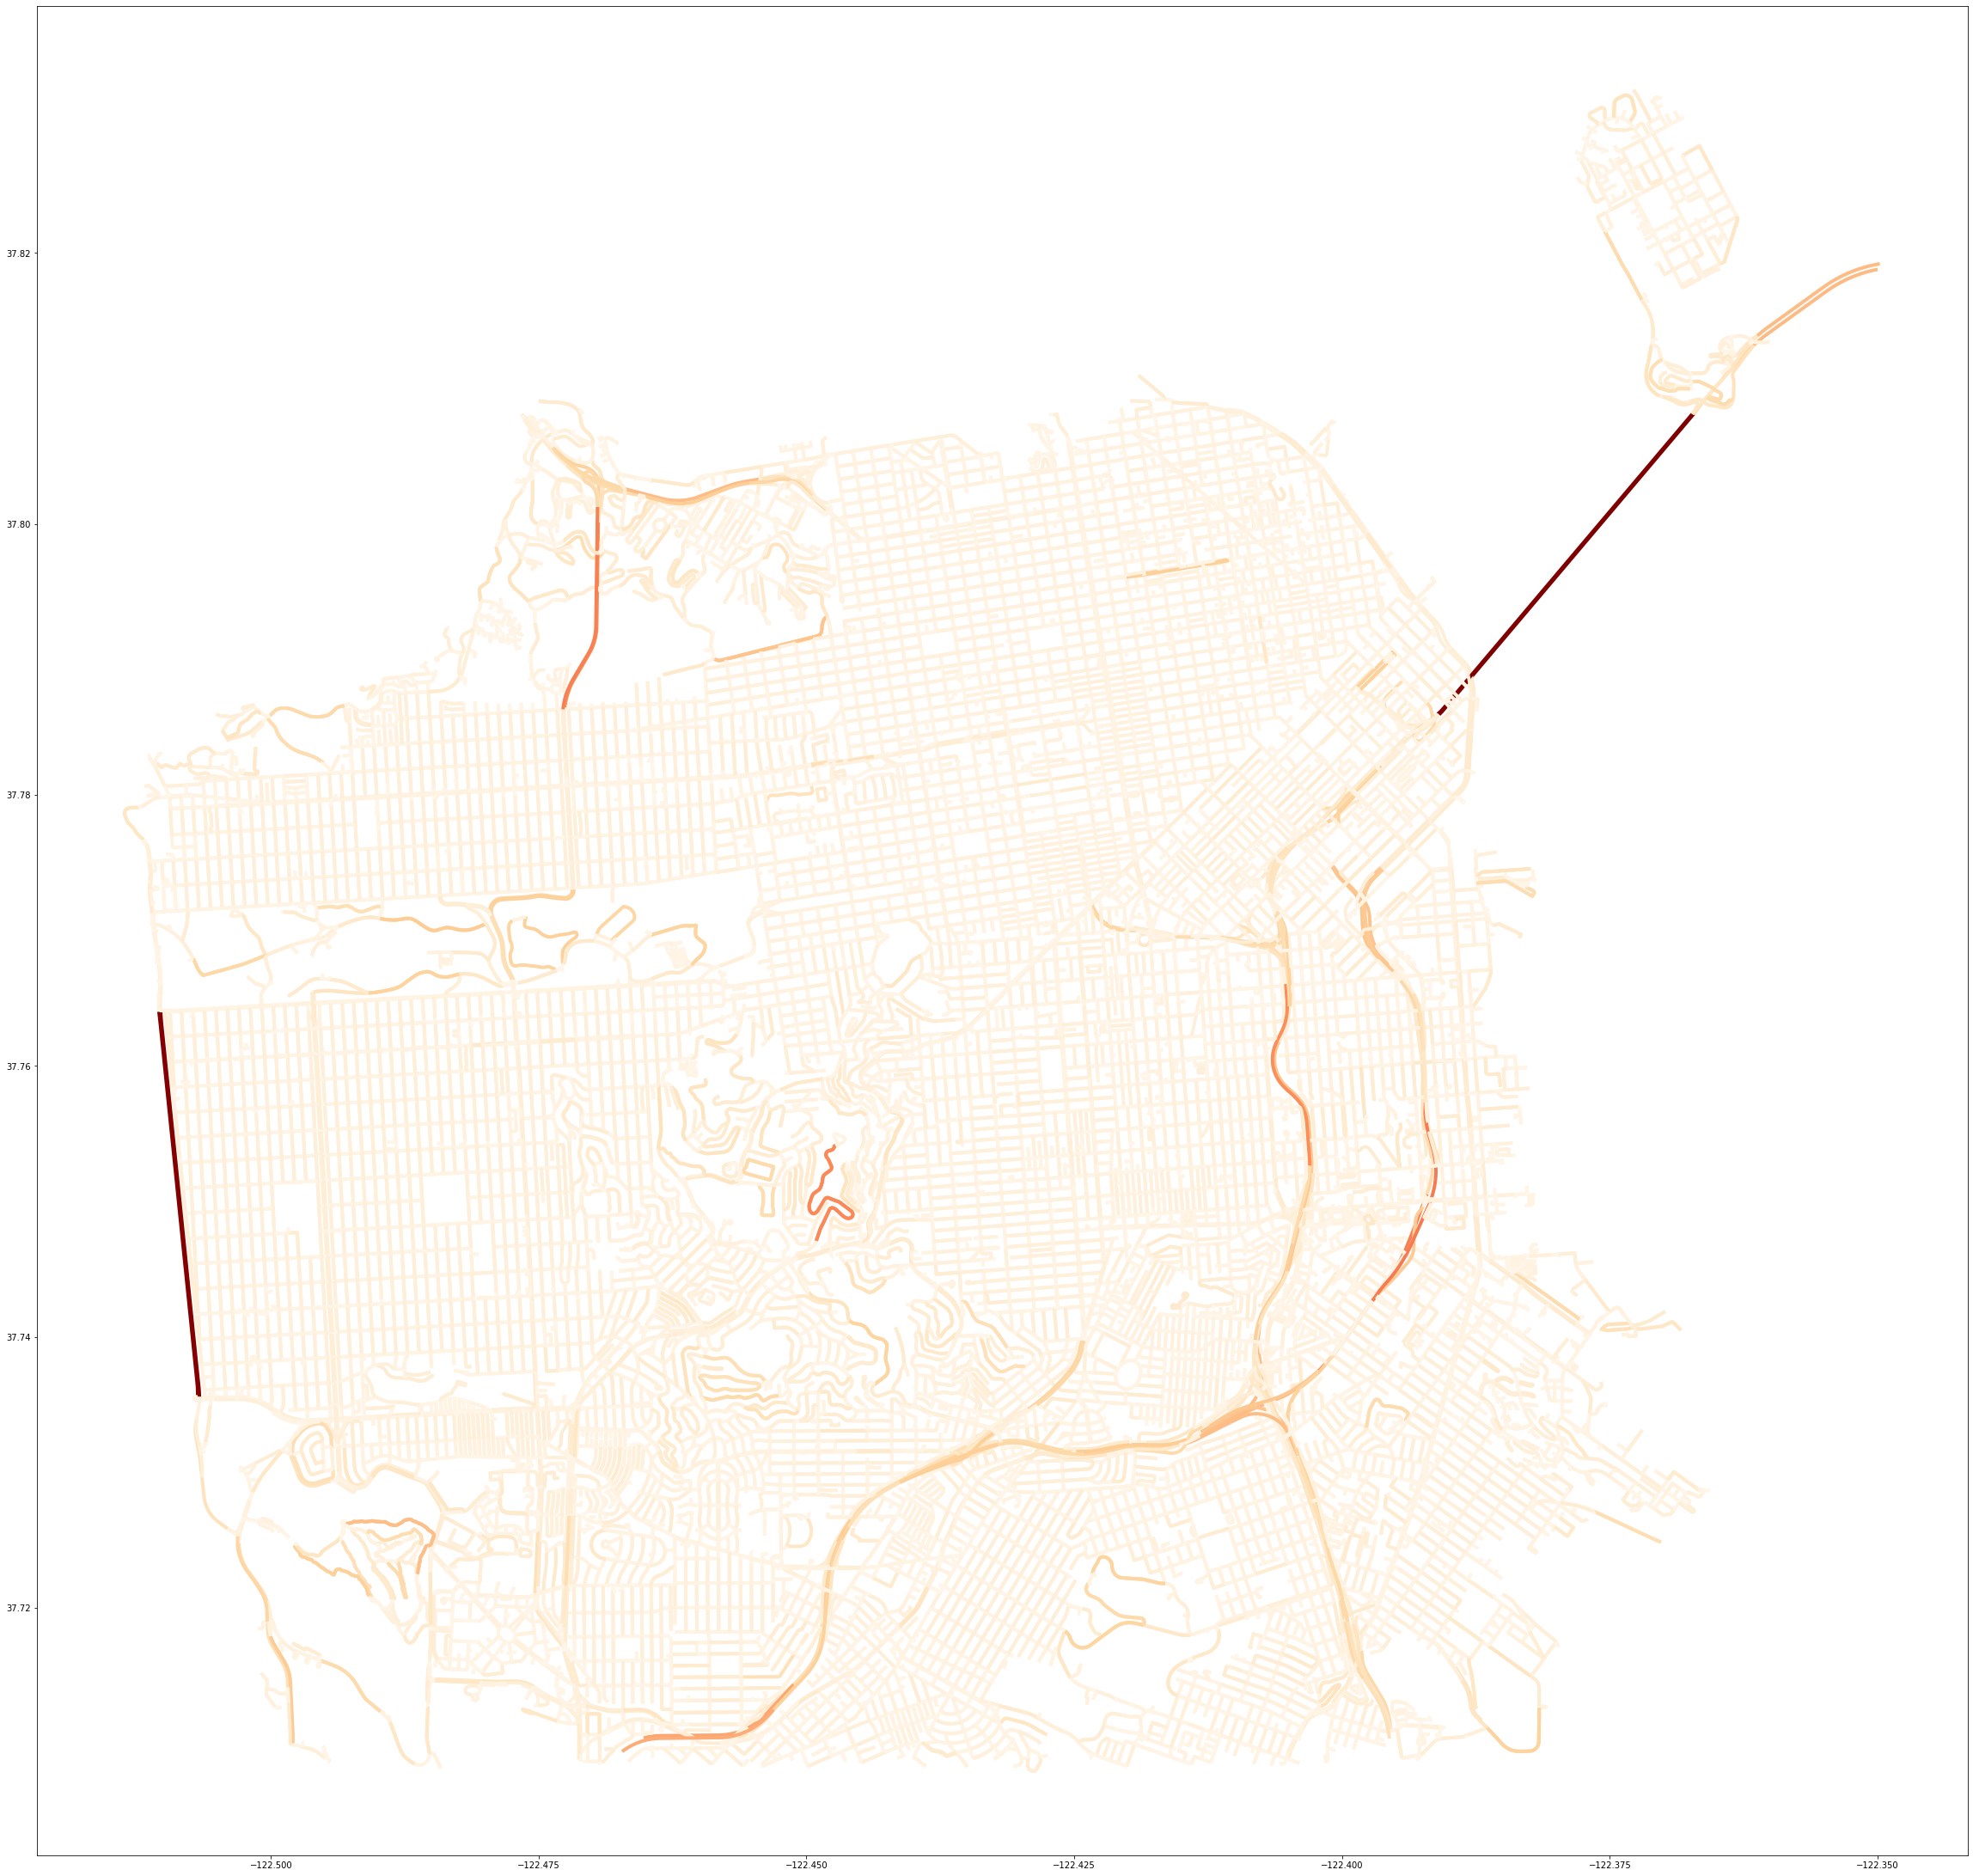

In [34]:
import matplotlib.pyplot as plt
import geopandas
fig, ax = plt.subplots(figsize=(32,40))
osmnx.plot(ax=ax, linewidth=4, column='predicted', cmap='OrRd')
plt.tight_layout()

In [35]:
min(osmnx['predicted'])

48.58541488647461

In [36]:
max(osmnx['predicted'])

161.2298583984375